---

PLANS

---
* Need to redue the dataset generation, because ran it as post instead of pre...
* Plot of all mice using pre-turn visual stim & actual turn dir. Overlay mice acc?
* Train each mouse using its first and last session. Test/eval on each session.
* Show days difference on the x-axis [i.e. abs(trained_sess - eval_sess)], and eval acc on the y-axis. Will have multiple lines, but should show a general trend of longer gaps cause worse performance. This will not account for uneven gaps between training days (ie rest lengths). Might not matter.
* ^ Put image transformation in dataset \_\_init__. Make general.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import math
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

base_dir = '/content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets'

# save_dir = '/content/drive/MyDrive/ali_post_turn/m9r'
# max_f = 400 # used for ali_pre_turn
# max_f = 1000 # used for ali_post_turn
# max_f = 3800 # used for ali/
# mice_ids = ['m9r'] # mainly for debugging


save_dir = '/content/drive/MyDrive/preturn_turn_final'
max_f = 1200 # used for final_ali_preturn
# mice_ids = ['m9r','m11n','m12lr']
mice_ids = ['m13l','m14r','m15n']
'''
mice_ids = ['m9r','m11n','m12lr','m13l','m14r','m15n','m16l',
            'm19n','m21r','m22l','m23r','m25lr','m26r','m30lr',
            'm31r','m32l','m33r']
'''

"\nmice_ids = ['m9r','m11n','m12lr','m13l','m14r','m15n','m16l',\n            'm19n','m21r','m22l','m23r','m25lr','m26r','m30lr',\n            'm31r','m32l','m33r']\n"

### Find max fluorescence.
##### Only needs to run once per dataset.

In [ ]:
# slowly find max fluorescence in whole dataset
max_f = -1
for m_id in mice_ids:
  # parent dir with potentially multiple days of recordings
  s2_dir = os.path.join(base_dir, m_id, 's2')
  s2_days_unfiltered = os.listdir(s2_dir)
  s2_days = [] # for filtered version
  # keep just dirs; remove files
  for fn in s2_days_unfiltered:
    s2_day = os.path.join(base_dir, m_id, 's2', fn)
    if os.path.isdir(s2_day):
      s2_days.append(s2_day)
  assert len(s2_days) > 0, f'mouse {m_id} is missing s2 day dir'

  # single day's s2 recording directory
  for s2_day in s2_days:
    # time is everything before final "/"
    t = s2_day.split("/")[-1]
    flourescence_csv = os.path.join(s2_day, f'calcium_raw_{t}.csv')
    if os.path.isfile(flourescence_csv):
      flourescence = pd.read_csv(flourescence_csv)
      for i in range(len(flourescence.columns)-1):
        if flourescence[str(i)].max() > max_f:
          max_f = flourescence[str(i)].max()
          print(f'[1] new max flourescence found: {max_f}')
          avg_f = flourescence[str(i)].mean()
          print(f'[2] mean flourescence found: {avg_f}')


[1] new max flourescence found: 358.77552263091616
[2] mean flourescence found: 26.53345355726876
[1] new max flourescence found: 680.2280938640173
[2] mean flourescence found: 109.05588838409847
[1] new max flourescence found: 710.3196690525145
[2] mean flourescence found: 131.33432348747604
[1] new max flourescence found: 1002.1352831996528
[2] mean flourescence found: 192.6756207986993
[1] new max flourescence found: 1148.3191881707453
[2] mean flourescence found: 123.7024351488722
[1] new max flourescence found: 1545.907997189842
[2] mean flourescence found: 204.29782205912338
[1] new max flourescence found: 1956.4443406016217
[2] mean flourescence found: 371.8412226478263
[1] new max flourescence found: 2178.0087118098127
[2] mean flourescence found: 332.05778318482186


KeyboardInterrupt: ignored

### create and save dataset.csv and acc.csv to gdrive:
Uses clean INIT and clean FTP (follow the pattern) trials when calculating the accuracies for each mouses' training days.

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m9r/s2/05_19_2022___14_54_17
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m9r/s2/05_20_2022___15_58_30
100 images created so far!


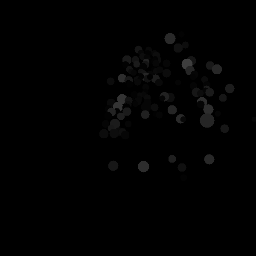

200 images created so far!


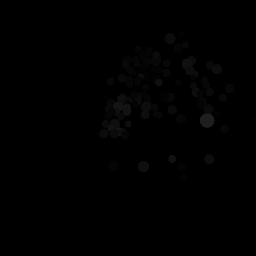

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m9r/s2/05_23_2022___13_10_04
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m9r/s2/05_24_2022___11_33_56
300 images created so far!


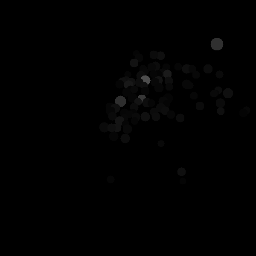

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m9r/s2/05_25_2022___11_46_10
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m9r/s2/05_26_2022___13_46_39
400 images created so far!


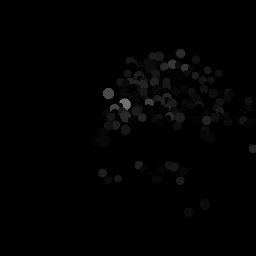

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/05_23_2022___14_43_33
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/05_25_2022___13_30_35
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/05_26_2022___10_43_19
500 images created so far!


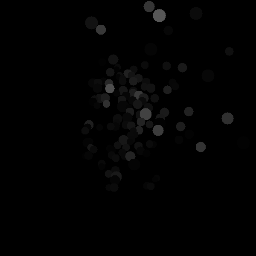

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/05_30_2022___13_43_49
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/05_31_2022___13_45_39
600 images created so far!


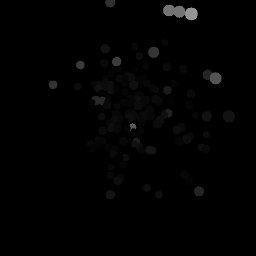

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/06_03_2022___13_15_37
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/06_06_2022___16_03_04
700 images created so far!


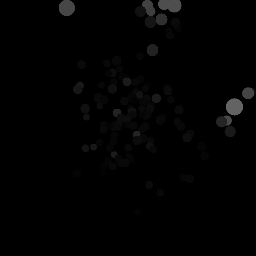

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/06_07_2022___11_33_41
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/06_09_2022___13_07_54
800 images created so far!


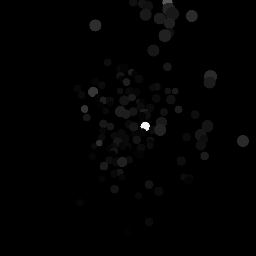

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/06_13_2022___12_19_44
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/06_14_2022___12_16_23
900 images created so far!


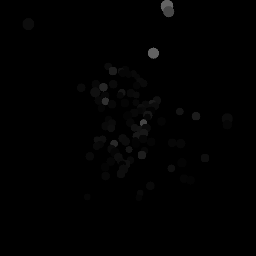

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/06_16_2022___13_21_13
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/06_17_2022___12_56_13
1000 images created so far!


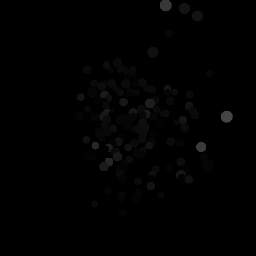

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/09_27_2022___12_35_02
1100 images created so far!


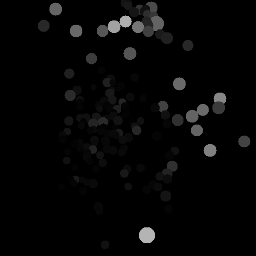

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/09_28_2022___13_42_54
1200 images created so far!


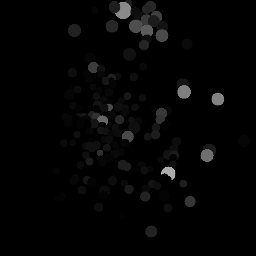

1300 images created so far!


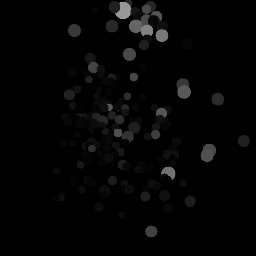

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m11n/s2/09_29_2022___12_06_15
1400 images created so far!


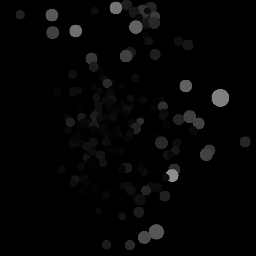

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/05_17_2022___16_15_20
1500 images created so far!


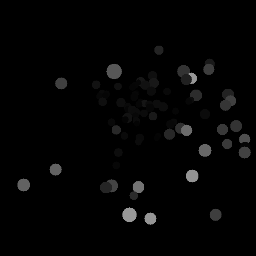

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/05_18_2022___13_28_32
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/05_20_2022___15_00_32
1600 images created so far!


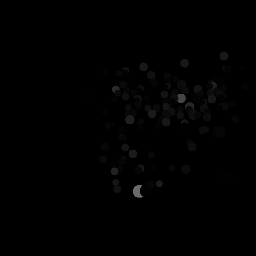

1700 images created so far!


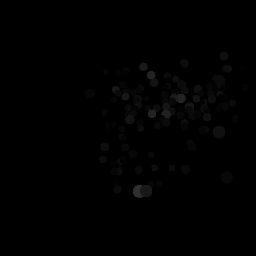

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/05_23_2022___13_56_29
1800 images created so far!


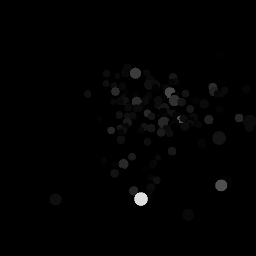

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/06_03_2022___14_00_39
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/06_06_2022___15_21_48
1900 images created so far!


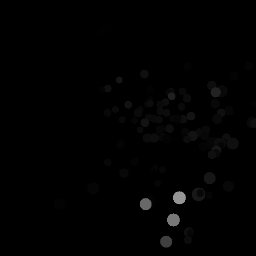

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/06_07_2022___10_46_59
2000 images created so far!


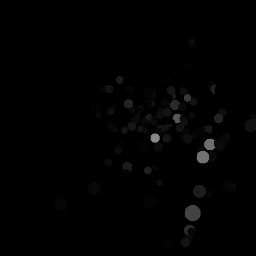

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/06_08_2022___12_56_54
skipping 06_08_2022___12_56_54 for m12lr. No clean trials.
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/06_09_2022___12_16_17
2100 images created so far!


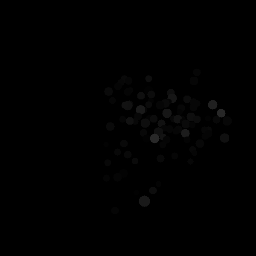

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/06_10_2022___11_04_20
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/06_13_2022___11_28_34
2200 images created so far!


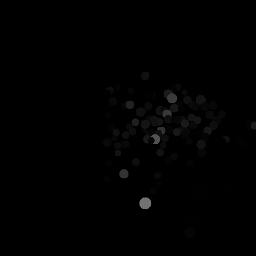

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/06_16_2022___12_01_38
2300 images created so far!


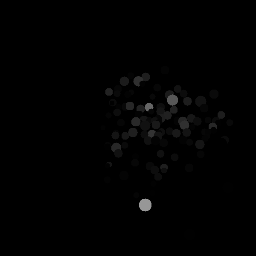

2400 images created so far!


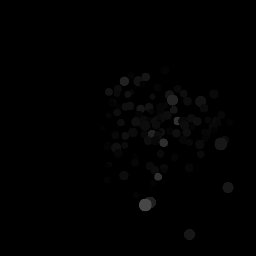

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/06_27_2022___11_07_42
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/06_30_2022___13_23_19
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/07_01_2022___12_06_26
2500 images created so far!


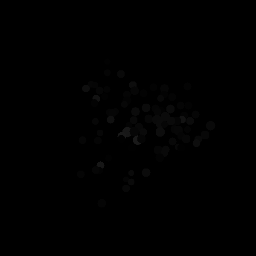

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m12lr/s2/07_05_2022___13_16_41
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/05_18_2022___11_00_50
2600 images created so far!


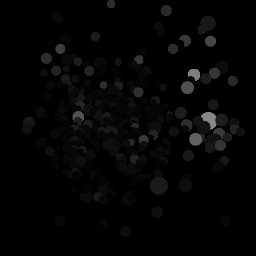

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/05_19_2022___10_52_09
2700 images created so far!


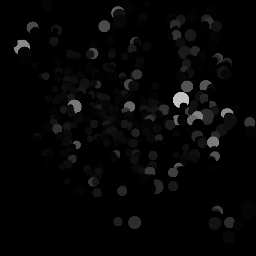

2800 images created so far!


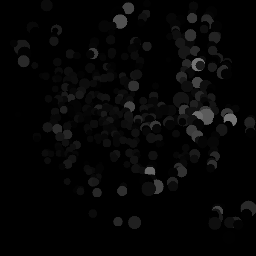

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/05_20_2022___13_29_47
2900 images created so far!


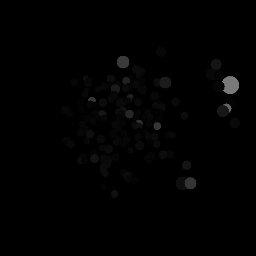

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/05_23_2022___12_16_16
3000 images created so far!


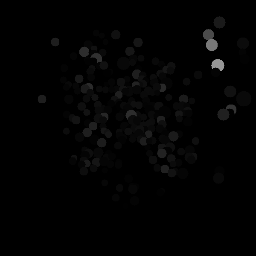

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/05_24_2022___10_47_34
3100 images created so far!


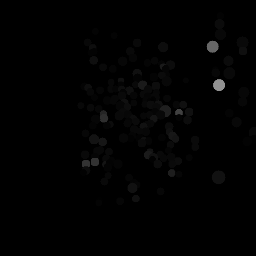

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/05_25_2022___10_57_17
3200 images created so far!


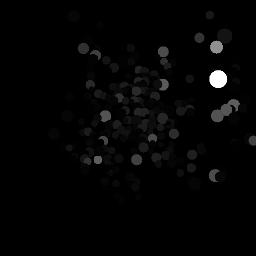

3300 images created so far!


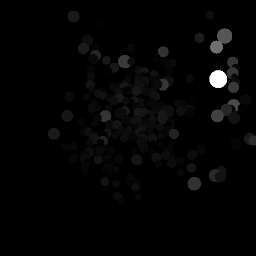

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/05_30_2022___11_21_25
3400 images created so far!


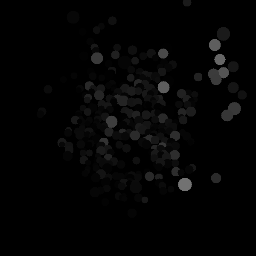

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/05_31_2022___10_44_15
3500 images created so far!


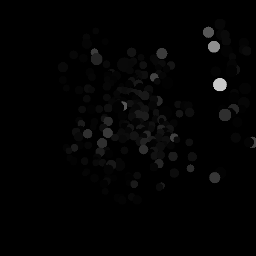

3600 images created so far!


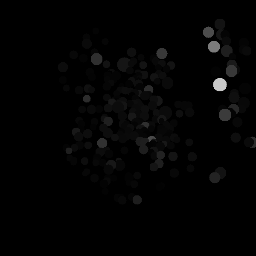

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/06_01_2022___11_52_48
3700 images created so far!


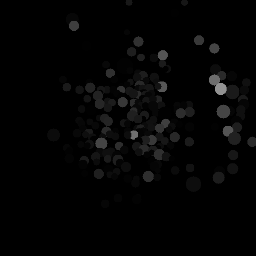

3800 images created so far!


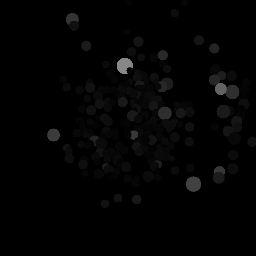

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/06_02_2022___09_27_13
3900 images created so far!


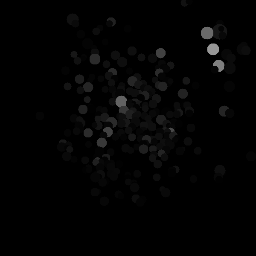

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/06_03_2022___11_43_02
4000 images created so far!


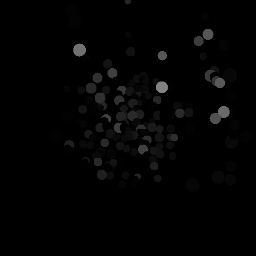

4100 images created so far!


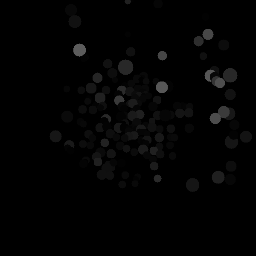

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/06_06_2022___11_15_10
4200 images created so far!


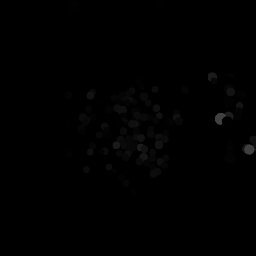

4300 images created so far!


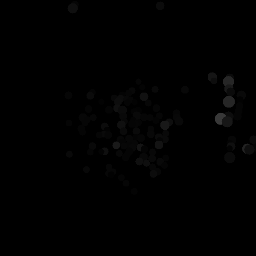

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/06_07_2022___08_29_11
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/06_08_2022___10_31_18
4400 images created so far!


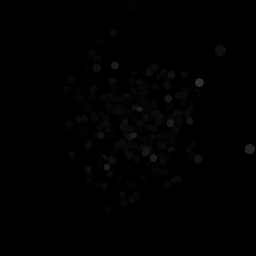

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m13l/s2/06_09_2022___10_42_36
4500 images created so far!


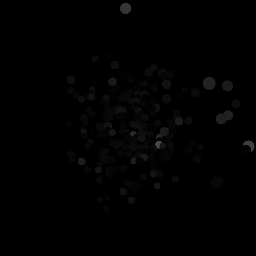

4600 images created so far!


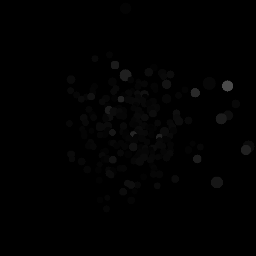

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/06_16_2022___13_23_42
4700 images created so far!


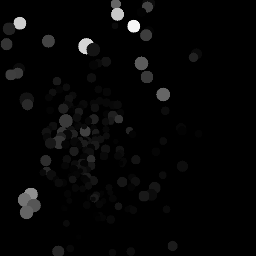

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/06_21_2022___11_39_13
4800 images created so far!


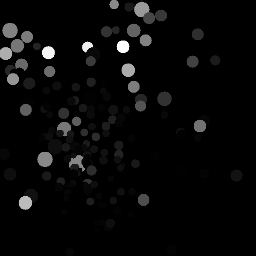

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/06_22_2022___11_10_06
4900 images created so far!


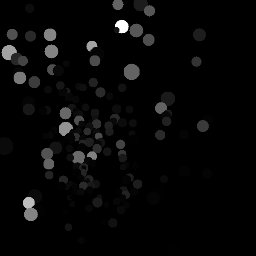

5000 images created so far!


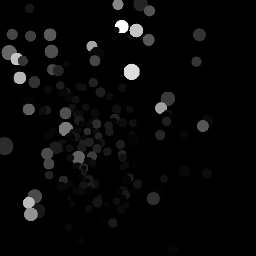

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/06_23_2022___12_45_42
5100 images created so far!


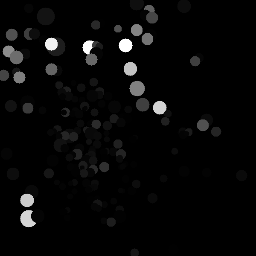

5200 images created so far!


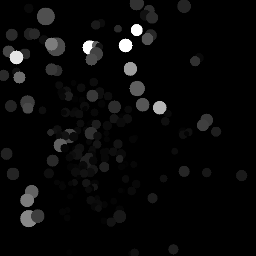

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/06_24_2022___12_19_23
5300 images created so far!


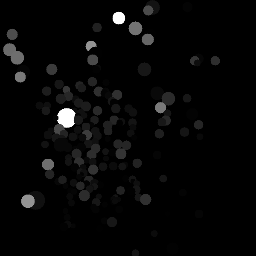

5400 images created so far!


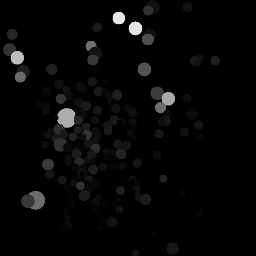

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/06_27_2022___12_24_48
5500 images created so far!


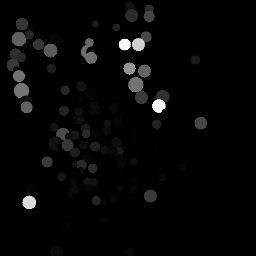

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/06_28_2022___10_19_39
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/06_29_2022___12_36_18
5600 images created so far!


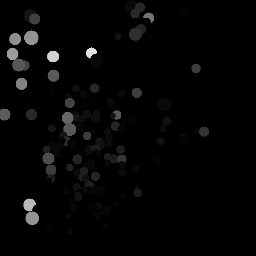

5700 images created so far!


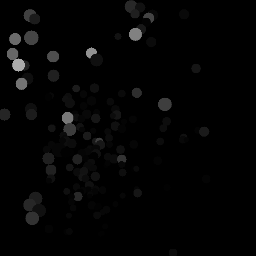

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/06_30_2022___10_45_09
5800 images created so far!


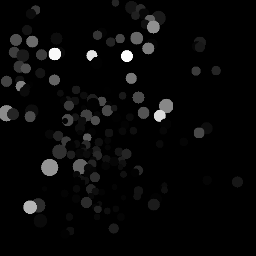

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/07_01_2022___12_01_01
5900 images created so far!


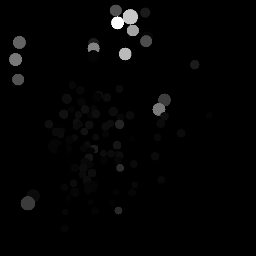

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/07_05_2022___10_54_12
6000 images created so far!


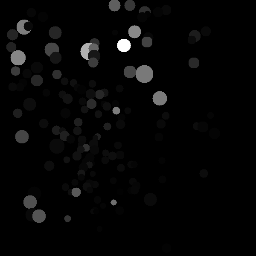

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/09_16_2022___13_07_05
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/09_19_2022___12_55_10
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/09_20_2022___13_47_57
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/09_21_2022___13_18_34
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/09_23_2022___13_02_27
6100 images created so far!


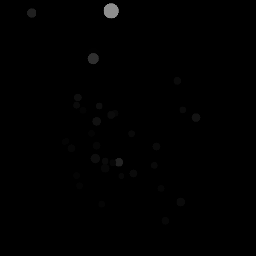

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/09_26_2022___13_01_45
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/09_28_2022___13_49_03
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/09_29_2022___12_57_25
skipping 09_29_2022___12_57_25 for m14r. No clean trials.
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/09_30_2022___12_10_20
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/10_03_2022___13_32_34
6200 images created so far!


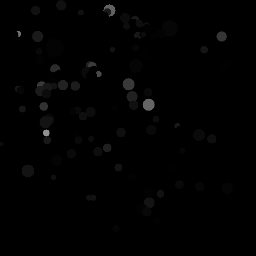

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m14r/s2/10_04_2022___13_45_45
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/06_15_2022___12_52_13
6300 images created so far!


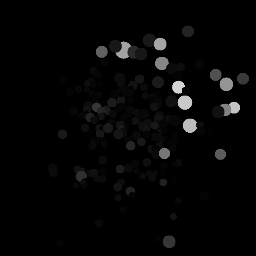

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/06_17_2022___12_11_05
6400 images created so far!


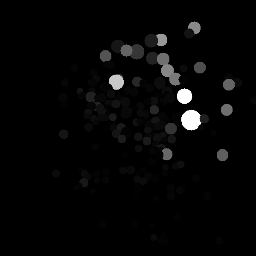

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/06_22_2022___11_58_29
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/09_16_2022___13_58_41
6500 images created so far!


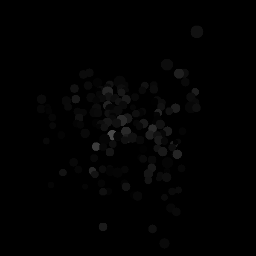

6600 images created so far!


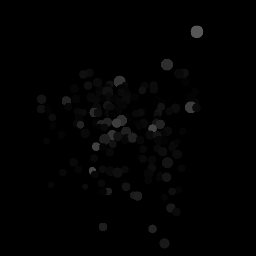

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/09_19_2022___11_33_25
6700 images created so far!


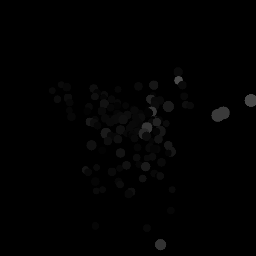

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/09_20_2022___15_19_26
6800 images created so far!


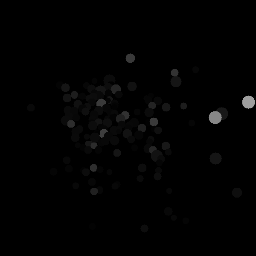

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/09_21_2022___14_06_10
6900 images created so far!


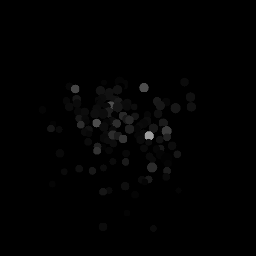

7000 images created so far!


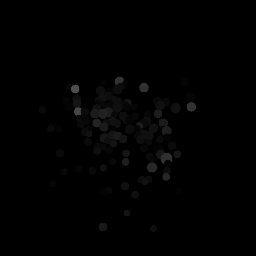

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/09_22_2022___12_40_42
7100 images created so far!


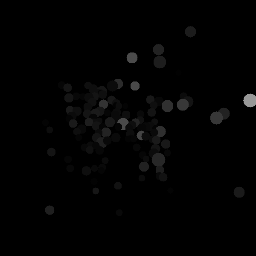

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/09_23_2022___13_48_29
7200 images created so far!


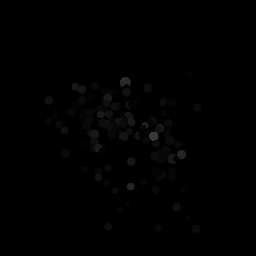

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/09_26_2022___12_16_29
7300 images created so far!


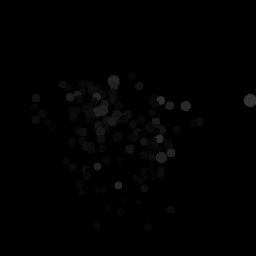

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/09_27_2022___14_25_37
7400 images created so far!


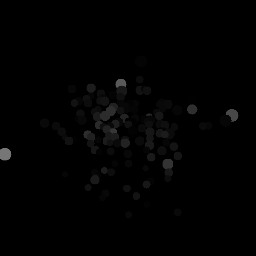

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/09_28_2022___12_59_15
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/09_29_2022___13_45_20
started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/09_30_2022___11_26_00
7500 images created so far!


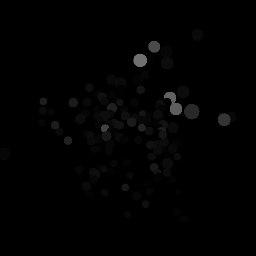

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/10_03_2022___14_34_49
7600 images created so far!


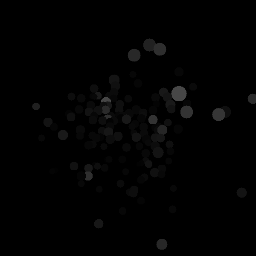

started processing: /content/drive/MyDrive/Calcium_imaging_yarm_LurLab/mice_datasets/m15n/s2/10_04_2022___12_50_54
7700 images created so far!


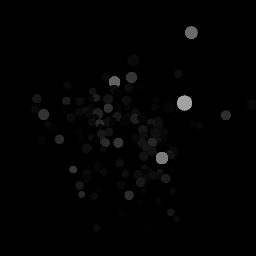

In [ ]:
import datetime

# quick check that every mouse has the s2 data folder
for m_id in mice_ids:
  s2_dir = os.path.join(base_dir, m_id, 's2')
  mouse_has_s2 = os.path.isdir(s2_dir)
  assert mouse_has_s2, f'mouse {m_id} is missing s2 parent dir'

train_img_i = 0
# for seeing how learning occurred over training days
acc_csv = os.path.join(save_dir, f'acc.csv')
dnn_csv = os.path.join(save_dir, f'dataset.csv')
os.makedirs(save_dir, exist_ok=True)
with open(acc_csv, 'w') as acc_data:
  acc_data.write("mouse id,session time,accuracy\n")
  with open(dnn_csv, 'w') as dnn_data:
    dnn_data.write("filename,mouse id,session time,turn direction,correctness\n")
    for m_id in mice_ids:
      # parent dir with potentially multiple days of recordings
      s2_dir = os.path.join(base_dir, m_id, 's2')
      s2_days_unfiltered = os.listdir(s2_dir)
      s2_days = [] # for filtered version
      # keep just dirs; remove files
      for fn in s2_days_unfiltered:
        s2_day = os.path.join(base_dir, m_id, 's2', fn)
        if os.path.isdir(s2_day):
          s2_days.append(s2_day)
      assert len(s2_days) > 0, f'mouse {m_id} is missing s2 day dir'
      # sort days in chronological order
      s2_days_unordered = s2_days
      as_datetimes = []
      for day in s2_days_unordered:
        t = day.split("/")[-1]
        t = t.split("___")[0]
        MM = t.split("_")[0]
        DD = t.split("_")[1]
        YY = t.split("_")[2]
        dt = datetime.date(int(YY), int(MM), int(DD))
        as_datetimes.append(dt)

      # combine the parallel lists
      zipped_pairs = zip(as_datetimes, s2_days)
      # days sorted in chronological order now
      s2_days = [x for _, x in sorted(zipped_pairs)]

      # single day's s2 recording directory
      for s2_day in s2_days:
        num_correct = 0
        num_trials_this_day = 0
        print(f'started processing: {s2_day}')
        # time is everything before final "/"
        t = s2_day.split("/")[-1]
        # load all the CSVs
        trial_pms_csv = os.path.join(s2_day, f'trial_parameters_{t}.csv')
        flourescence_csv = os.path.join(s2_day, f'calcium_raw_{t}.csv')
        cell_loc_csv = os.path.join(s2_day, 'cell_loc.csv')
        all_CSVs_exist = os.path.isfile(trial_pms_csv)
        all_CSVs_exist = all_CSVs_exist and os.path.isfile(flourescence_csv)
        all_CSVs_exist = all_CSVs_exist and os.path.isfile(cell_loc_csv)
        if not all_CSVs_exist:
          continue
        trial_pms = pd.read_csv(trial_pms_csv)
        flourescence = pd.read_csv(flourescence_csv)
        loc_and_size = pd.read_csv(cell_loc_csv)

        # find first clean turn_frame value (ie not NaN)
        i = -1 # allows us to increment at top of while loop
        while i < len(trial_pms.index) - 1:
          i += 1
          turn_frame = trial_pms.iloc[i]['turn_frame']
          if not np.isnan(turn_frame):
            # which way the animal chose to turn
            turn_dir = trial_pms.iloc[i]['direction']
            turn_frame = int(turn_frame)
            num_trials_this_day += 1
            correct = trial_pms.iloc[i]['correctness']
            if correct == "correct":
              correct = 1
              num_correct += 1
            else:
              correct = 0
            # print(f'turn_frame: {turn_frame}')
            # print(f'turn_dir: {turn_dir}')

            train_img_i += 1
            # create black image
            img = np.zeros((600, 600, 3), dtype=np.uint8)
            num_cells = len(loc_and_size.index)
            for j in range(num_cells):
              x = loc_and_size.iloc[j]['center_x']
              y = loc_and_size.iloc[j]['center_y']
              center_pt = (int(x), int(y))
              size = loc_and_size.iloc[j]['size']
              # find radius of the perfect circle with the same size
              radius = math.sqrt(size / math.pi)
              # print("@TODO remove cell size modifier!")
              radius *= 1.5
              radius = int(radius)
              num_pre_turn_frames = 20
              # calculate the color based on avg intensity 20 frames before turn
              start_i = turn_frame - num_pre_turn_frames
              pre_turn_frames = flourescence.iloc[start_i:turn_frame][str(j)]
              avg_f = pre_turn_frames.sum() / num_pre_turn_frames / max_f * 255
              '''
              num_post_turn_frames = 20
              # calculate the color based on avg intensity 20 frames after turn
              end_i = turn_frame + num_post_turn_frames
              post_turn_frames = flourescence.iloc[turn_frame:end_i][str(j)]
              avg_f = post_turn_frames.sum() / num_post_turn_frames / max_f * 255
              '''
              # clip in case there's a slightly larger max_f
              # since I did not check the whole dataset
              avg_f = min(avg_f, 255)
              c = [avg_f, avg_f, avg_f]
              # thickness of -1 fills the whole circle instead of outlining
              cv2.circle(img, center_pt, radius, c, -1)

            small_img = cv2.resize(img, (256, 256))
            # 'L' will be class 0, 'R' will be class 1
            img_file = os.path.join(save_dir, f'{train_img_i}.jpg')
            cv2.imwrite(img_file, small_img)
            dnn_data.write(f'{train_img_i},{m_id},{t},{turn_dir},{correct}\n')

            # print every 100th image
            if train_img_i % 100 == 0:
              print(f'{train_img_i} images created so far!')
              cv2_imshow(small_img)

        if num_trials_this_day == 0:
          print(f'skipping {t} for {m_id}. No clean trials.')
          continue


### Convert 1P dataset to dogs & cats for testing binary classifier
Normally, you should not need to run this.

In [ ]:
from PIL import Image

csv_f = os.path.join(save_dir, "dataset.csv")
trials = pd.read_csv(csv_f)
filenames = trials['filename']
labels = trials['turn direction']

num_cats = 0
num_dogs = 0
# convert each datapoint's image to either a dog or cat
for row_i in range(len(filenames)):
  filename = filenames[row_i]
  turn_dir = labels[row_i]
  # 'L' will be class 0, 'R' will be class 1
  if turn_dir == 'L': # dog
    path = os.path.join(save_dir, 'dog.' + str(num_dogs) + '.jpg')
    num_dogs += 1
  else: # cat
    path = os.path.join(save_dir, 'cat.' + str(num_dogs) + '.jpg')
    num_cats += 1
  img = cv2.imread(path)
  small_img = cv2.resize(img, (256, 256))
  img_file = os.path.join(save_dir, f'{filename}.jpg')
  cv2.imwrite(img_file, small_img)

### PyTorch DataLoader loads our dataset.csv file

In [ ]:
import os
import torch
import random
import numpy as np
import pandas as pd
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset

class LocalizeDataset(Dataset):
    def __init__(self, src_dir, train=True, transform=None, shuffle=False,
                 split=0.85, _m_ids=False, dates=[False], **kwargs):
        # m_ids and dates are parallel lists w/ ints and list of strings, respectively
        super().__init__(**kwargs)
        self.img_paths = []
        self.labels = []
        self.split = split
        self.transform = transform

        csv_f = os.path.join(src_dir, "dataset.csv")
        trials = pd.read_csv(csv_f, index_col=0)
        labels = trials[['turn direction']]
        correct = trials[['correctness']]
        files = os.listdir(src_dir)
        img_files = [f for f in files if '.jpg' in f]
        if _m_ids:
            img_files = []
            # filter out any mice not listed
            for list_i, m_id in enumerate(_m_ids):
                for idx in range(len(trials)):
                    if m_id == trials['mouse id'].iloc[idx]:
                        if dates[list_i]:
                            this_m_dates = dates[list_i]
                            trial_date = trials['session time'].iloc[idx]
                            if trial_date in this_m_dates:
                                fn_base = str(idx + 1) + '.jpg'
                                file_name = os.path.join(src_dir, fn_base)
                                img_files.append(file_name)
                        else:
                            fn_base = str(idx + 1) + '.jpg'
                            file_name = os.path.join(src_dir, fn_base)
                            img_files.append(file_name)

        # remove duplicates
        img_files = list(set(img_files))
        assert len(img_files) > 0, "no images found :("

        idxs = []
        for img_f in img_files:
            idx = img_f.replace('.jpg', '').split('/')[-1]
            idxs.append(int(idx))
        idxs = sorted(idxs)
        if shuffle:
            random.Random(42).shuffle(idxs)

        for idx in idxs:
            img = os.path.join(src_dir, f'{idx}.jpg')
            self.img_paths.append(img)
            l = labels.loc[idx].to_numpy()
            c = correct.loc[idx].to_numpy()
            # swap turn direction if the mouse's choice was wrong
            if int(c) == 0:
                if l == 'L':
                    l = 'R'
                elif l == 'R':
                    l = 'L'
                else:
                    assert False, f'Improper turn direction: {l}'
            if l == 'L':
                l = [0,1]
            elif l == 'R':
                l = [1,0]
            else:
                assert False, f'Improper turn direction: {l}'
            self.labels.append(l)

        self.img_paths = np.array(self.img_paths)
        self.labels = torch.FloatTensor(np.array(self.labels))

        train_idx = int(len(self.img_paths) * self.split)

        if train:
            self.img_paths = self.img_paths[:train_idx]
            self.labels = self.labels[:train_idx]
            print(f'number of train images: {len(self.img_paths)}')
        else:
            self.img_paths = self.img_paths[train_idx:]
            self.labels = self.labels[train_idx:]
            print(f'number of val images: {len(self.img_paths)}')

    def _pil_loader(self, path):
        with open(path, "rb") as f:
            img = Image.open(f)
            img = img.convert("RGB")
            img = transforms.functional.pil_to_tensor(img)
            img = img.type(torch.float32) / 255
            return img

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        img = self._pil_loader(self.img_paths[idx])
        l = self.labels[idx]
        if self.transform is not None:
            img = self.transform(img)
        return img, l

### Calculate the normalization parameters for the images:
only have to change if you make changes to the dataset

In [ ]:
import torch
from torchvision import datasets

def get_norm_pms(m_ids, dates):
    all_data = LocalizeDataset(save_dir, transform=None, split=1.0,
                              _m_ids=m_ids, dates=dates)
    dataloader = torch.utils.data.DataLoader(all_data, batch_size=10)

    ch_means = np.array([0,0,0])
    ch_stds = np.array([0,0,0])
    i = 0
    for imgs, _l in dataloader:
        i += 1
        ch_mean = imgs.reshape(3,-1).mean(axis=1).numpy()
        ch_means = np.sum([ch_means, ch_mean], axis=0)
        ch_std = imgs.reshape(3,-1).std(axis=1).numpy()
        ch_stds = np.sum([ch_stds, ch_std], axis=0)

    # normalize i.e. find the avg
    ch_means = ch_means / i
    ch_stds = ch_stds / i
    print(f'channel means: {ch_means}')
    print(f'channel stdevs: {ch_stds}')

    return ch_means, ch_stds

### Checking that classes (i.e. left vs right turns) are roughly balanced

In [ ]:
csv_f = os.path.join(save_dir, "dataset.csv")
trials = pd.read_csv(csv_f, index_col=0)
labels = trials['turn direction']
sum = 0
for turn_dir in labels:
  if turn_dir == 'R':
    sum += 1
print(sum / len(labels))

0.49079595540575577


### Training and testing transfer learning on a resnet18 modified for binary classification

In [ ]:
import os
import time
import torch
import torchvision
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
from torchvision import transforms as T
from torchvision import datasets, models
from matplotlib.gridspec import GridSpec

# If colab: Runtime > Change runtime type > T4 GPU
assert torch.cuda.is_available(), "GPU not found!"
device = torch.device("cuda:0")

def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array(ch_means)
    std = np.array(ch_stds)
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def train_model(model, train_dl, test_dl, criterion, optimizer, scheduler, num_epochs=1):
    start_time = time.time()
    best_train_loss = 1e8
    best_val_loss = 1e8
    best_model_train_params_path = os.path.join(save_dir, "best_train_params.pt")
    best_model_val_params_path = os.path.join(save_dir, "best_val_params.pt")

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        model.eval() # to work with logic right below
        # Each epoch has a training and validation phase
        for _p in ['train', 'val']:
            # switch between train & eval on successive runs
            if model.training:
                phase = "val"
                model.eval()
                dataloader = test_dl
            else:
                phase = 'train'
                model.train()
                dataloader = train_dl

            running_loss = 0.0
            # Iterate over data.
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad() # reset gradients

                # forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    # backward
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
            if phase == 'train' and scheduler != None:
                scheduler.step()

            epoch_loss = running_loss / len(dataloader)
            print(f'{phase} Loss: {epoch_loss:.4f}')

            # deep copy the model
            if phase == 'train' and epoch_loss < best_train_loss:
                best_train_loss = epoch_loss
                torch.save(model.state_dict(), best_model_train_params_path)
                print("new best train!")
            if phase == 'val' and epoch_loss < best_val_loss:
                best_val_loss = epoch_loss
                torch.save(model.state_dict(), best_model_val_params_path)
                print("new best val!")

        print("")

    time_elapsed = time.time() - start_time
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')

    # load best train_model weights
    best_train_model = torchvision.models.resnet18(weights=None)
    num_ftrs = best_train_model.fc.in_features
    best_train_model.fc = nn.Sequential(
        nn.Linear(num_ftrs, 2),
        nn.Softmax(),
    )
    best_train_model = best_train_model.to(device)
    best_train_model.load_state_dict(torch.load(best_model_train_params_path))
    # load best val_model weights
    best_val_model = torchvision.models.resnet18(weights=None)
    best_val_model.fc = nn.Sequential(
        nn.Linear(num_ftrs, 2),
        nn.Softmax(),
    )
    best_val_model = best_val_model.to(device)
    best_val_model.load_state_dict(torch.load(best_model_val_params_path))

    return best_train_model, best_val_model

def visualize_model(model, dataloader, num_images=16, split='val'):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//4, 4, images_so_far)
                ax.axis('off')
                guess = outputs[j].cpu().tolist()
                label = labels[j].cpu().tolist()
                if guess[0] > 0.5:
                  guess = 'R'
                else:
                  guess = 'L'
                if label[0] == 0:
                  label = 'L'
                else:
                  label = 'R'
                title = f'Predicted: {guess} \nGT: {label}'
                ax.set_title(title, fontsize=8)
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return

        model.train(mode=was_training)

def get_acc(model, dataloader, split):
    was_training = model.training
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            for j in range(inputs.size()[0]):
                guess = outputs[j].cpu().tolist()
                label = labels[j].cpu().tolist()
                if guess[0] > 0.5:
                  guess = 'R'
                else:
                  guess = 'L'
                if label[0] == 0:
                  label = 'L'
                else:
                  label = 'R'
                total += 1
                if guess == label:
                  correct += 1

        model.train(mode=was_training)
        print(f'number correct: {correct}')
        print(f'total number: {total}')
        test_acc = correct / total * 100
        print(f'{split} accuracy: {test_acc:.1f}')
        return test_acc


number of train images: 41
channel means: [0.02584425 0.02522552 0.02465578]
channel stdevs: [0.09753465 0.09522923 0.09372608]
number of train images: 36
number of val images: 5
skipping m13l on ['06_07_2022___08_29_11']

number of train images: 148
channel means: [0.01019514 0.01026799 0.01022751]
channel stdevs: [0.03842759 0.03814394 0.03785181]
number of train images: 133
number of val images: 15


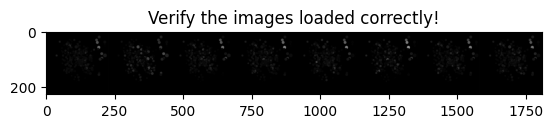

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 132MB/s]


Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 30.2560
new best train!
val Loss: 10.4157
new best val!

Epoch 1/34
----------
train Loss: 22.8447
new best train!
val Loss: 10.2789
new best val!

Epoch 2/34
----------
train Loss: 19.0161
new best train!
val Loss: 10.3677

Epoch 3/34
----------
train Loss: 17.2065
new best train!
val Loss: 10.4751

Epoch 4/34
----------
train Loss: 16.2016
new best train!
val Loss: 10.4761

Epoch 5/34
----------
train Loss: 15.3633
new best train!
val Loss: 10.5492

Epoch 6/34
----------
train Loss: 15.1749
new best train!
val Loss: 10.5647

Epoch 7/34
----------
train Loss: 14.7605
new best train!
val Loss: 10.4510

Epoch 8/34
----------
train Loss: 14.7474
new best train!
val Loss: 10.8587

Epoch 9/34
----------
train Loss: 15.1445
val Loss: 11.4976

Epoch 10/34
----------
train Loss: 14.8062
val Loss: 10.5468

Epoch 11/34
----------
train Loss: 14.4188
new best train!
val Loss: 10.0681
new best val!

Epoch 12/34
----------
train Loss: 14.7030
val Loss: 9.6151
new best val!

Epoch 13/34

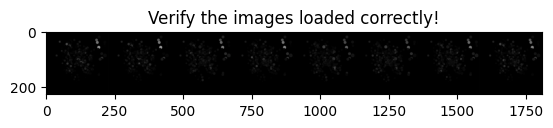

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 30.8522
new best train!
val Loss: 10.6289
new best val!

Epoch 1/34
----------
train Loss: 22.6136
new best train!
val Loss: 10.3579
new best val!

Epoch 2/34
----------
train Loss: 20.6016
new best train!
val Loss: 10.5208

Epoch 3/34
----------
train Loss: 17.8799
new best train!
val Loss: 10.7886

Epoch 4/34
----------
train Loss: 16.6757
new best train!
val Loss: 10.7618

Epoch 5/34
----------
train Loss: 15.5144
new best train!
val Loss: 10.6316

Epoch 6/34
----------
train Loss: 14.8602
new best train!
val Loss: 10.5150

Epoch 7/34
----------
train Loss: 14.8953
val Loss: 10.5277

Epoch 8/34
----------
train Loss: 14.8917
val Loss: 10.6783

Epoch 9/34
----------
train Loss: 15.7365
val Loss: 13.2088

Epoch 10/34
----------
train Loss: 17.7031
val Loss: 12.2632

Epoch 11/34
----------
train Loss: 15.1183
val Loss: 11.0103

Epoch 12/34
----------
train Loss: 15.1382
val Loss: 10.4355

Epoch 13/34
----------
train Loss: 15.0887
val Loss: 10.2977
new best val!

Epoch 14/3

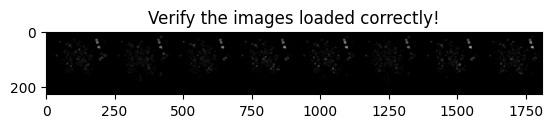

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.5210
new best train!
val Loss: 10.9193
new best val!

Epoch 1/34
----------
train Loss: 24.1154
new best train!
val Loss: 10.5657
new best val!

Epoch 2/34
----------
train Loss: 20.7313
new best train!
val Loss: 10.4925
new best val!

Epoch 3/34
----------
train Loss: 18.6761
new best train!
val Loss: 10.7271

Epoch 4/34
----------
train Loss: 17.4710
new best train!
val Loss: 10.7368

Epoch 5/34
----------
train Loss: 16.2317
new best train!
val Loss: 10.4131
new best val!

Epoch 6/34
----------
train Loss: 15.7291
new best train!
val Loss: 10.6246

Epoch 7/34
----------
train Loss: 15.1004
new best train!
val Loss: 10.8177

Epoch 8/34
----------
train Loss: 14.8580
new best train!
val Loss: 10.7197

Epoch 9/34
----------
train Loss: 14.6370
new best train!
val Loss: 10.9695

Epoch 10/34
----------
train Loss: 14.5156
new best train!
val Loss: 11.3339

Epoch 11/34
----------
train Loss: 14.3771
new best train!
val Loss: 11.8161

Epoch 12/34
----------
train Loss: 14.27

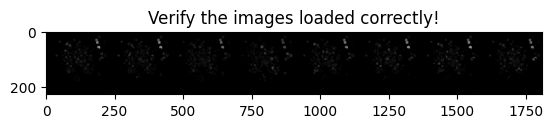

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.2101
new best train!
val Loss: 9.8654
new best val!

Epoch 1/34
----------
train Loss: 23.8536
new best train!
val Loss: 9.8732

Epoch 2/34
----------
train Loss: 20.2483
new best train!
val Loss: 9.9565

Epoch 3/34
----------
train Loss: 17.9091
new best train!
val Loss: 10.2700

Epoch 4/34
----------
train Loss: 16.3668
new best train!
val Loss: 10.4595

Epoch 5/34
----------
train Loss: 15.2603
new best train!
val Loss: 10.4997

Epoch 6/34
----------
train Loss: 15.0180
new best train!
val Loss: 10.4841

Epoch 7/34
----------
train Loss: 15.2255
val Loss: 10.5317

Epoch 8/34
----------
train Loss: 14.9877
new best train!
val Loss: 10.5774

Epoch 9/34
----------
train Loss: 15.7015
val Loss: 10.4334

Epoch 10/34
----------
train Loss: 14.8437
new best train!
val Loss: 10.5252

Epoch 11/34
----------
train Loss: 15.2879
val Loss: 10.3797

Epoch 12/34
----------
train Loss: 14.6597
new best train!
val Loss: 10.2318

Epoch 13/34
----------
train Loss: 15.5602
val Loss: 10

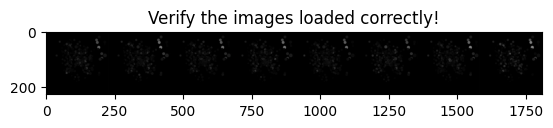

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 30.8445
new best train!
val Loss: 10.0525
new best val!

Epoch 1/34
----------
train Loss: 24.0888
new best train!
val Loss: 10.1293

Epoch 2/34
----------
train Loss: 20.2199
new best train!
val Loss: 10.2199

Epoch 3/34
----------
train Loss: 18.4232
new best train!
val Loss: 10.2737

Epoch 4/34
----------
train Loss: 16.7715
new best train!
val Loss: 10.2470

Epoch 5/34
----------
train Loss: 15.6553
new best train!
val Loss: 10.3271

Epoch 6/34
----------
train Loss: 15.3583
new best train!
val Loss: 10.2573

Epoch 7/34
----------
train Loss: 15.6846
val Loss: 10.1624

Epoch 8/34
----------
train Loss: 15.4157
val Loss: 9.8829
new best val!

Epoch 9/34
----------
train Loss: 15.2763
new best train!
val Loss: 11.0060

Epoch 10/34
----------
train Loss: 15.7192
val Loss: 11.1712

Epoch 11/34
----------
train Loss: 15.2442
new best train!
val Loss: 11.0717

Epoch 12/34
----------
train Loss: 15.8279
val Loss: 11.4964

Epoch 13/34
----------
train Loss: 15.2948
val Loss: 12

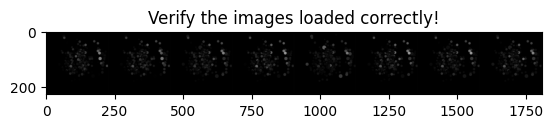

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 35.1641
new best train!
val Loss: 12.2922
new best val!

Epoch 1/34
----------
train Loss: 27.6435
new best train!
val Loss: 12.4179

Epoch 2/34
----------
train Loss: 23.2829
new best train!
val Loss: 12.9566

Epoch 3/34
----------
train Loss: 20.0756
new best train!
val Loss: 13.9628

Epoch 4/34
----------
train Loss: 18.2114
new best train!
val Loss: 14.9546

Epoch 5/34
----------
train Loss: 17.1549
new best train!
val Loss: 16.0687

Epoch 6/34
----------
train Loss: 16.4632
new best train!
val Loss: 16.3036

Epoch 7/34
----------
train Loss: 16.1744
new best train!
val Loss: 16.1075

Epoch 8/34
----------
train Loss: 16.1147
new best train!
val Loss: 15.9892

Epoch 9/34
----------
train Loss: 16.1224
val Loss: 16.7091

Epoch 10/34
----------
train Loss: 16.0417
new best train!
val Loss: 17.5035

Epoch 11/34
----------
train Loss: 16.2443
val Loss: 16.6569

Epoch 12/34
----------
train Loss: 16.0106
new best train!
val Loss: 14.2661

Epoch 13/34
----------
train Loss: 1

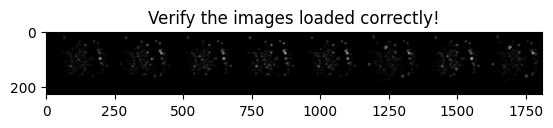

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.8448
new best train!
val Loss: 11.4955
new best val!

Epoch 1/34
----------
train Loss: 29.6402
new best train!
val Loss: 12.7048

Epoch 2/34
----------
train Loss: 25.2826
new best train!
val Loss: 13.1760

Epoch 3/34
----------
train Loss: 21.6853
new best train!
val Loss: 14.5841

Epoch 4/34
----------
train Loss: 19.7936
new best train!
val Loss: 14.9369

Epoch 5/34
----------
train Loss: 17.4753
new best train!
val Loss: 15.3072

Epoch 6/34
----------
train Loss: 17.0777
new best train!
val Loss: 16.4819

Epoch 7/34
----------
train Loss: 16.4657
new best train!
val Loss: 16.7033

Epoch 8/34
----------
train Loss: 16.1939
new best train!
val Loss: 16.3680

Epoch 9/34
----------
train Loss: 16.1048
new best train!
val Loss: 16.2478

Epoch 10/34
----------
train Loss: 16.1081
val Loss: 16.3462

Epoch 11/34
----------
train Loss: 16.0504
new best train!
val Loss: 16.6243

Epoch 12/34
----------
train Loss: 16.0260
new best train!
val Loss: 16.8332

Epoch 13/34
--------

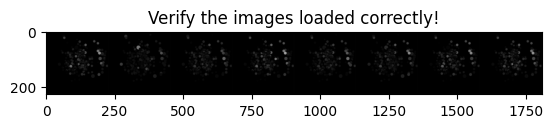

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 38.0338
new best train!
val Loss: 15.3613
new best val!

Epoch 1/34
----------
train Loss: 31.0759
new best train!
val Loss: 15.5050

Epoch 2/34
----------
train Loss: 27.9505
new best train!
val Loss: 16.1816

Epoch 3/34
----------
train Loss: 24.2846
new best train!
val Loss: 16.6705

Epoch 4/34
----------
train Loss: 21.4135
new best train!
val Loss: 17.3438

Epoch 5/34
----------
train Loss: 19.8793
new best train!
val Loss: 17.6802

Epoch 6/34
----------
train Loss: 18.4273
new best train!
val Loss: 18.1628

Epoch 7/34
----------
train Loss: 17.1450
new best train!
val Loss: 18.5059

Epoch 8/34
----------
train Loss: 17.2064
val Loss: 18.3910

Epoch 9/34
----------
train Loss: 16.4692
new best train!
val Loss: 18.4961

Epoch 10/34
----------
train Loss: 16.2033
new best train!
val Loss: 18.6877

Epoch 11/34
----------
train Loss: 16.1946
new best train!
val Loss: 18.5463

Epoch 12/34
----------
train Loss: 16.1931
new best train!
val Loss: 18.3817

Epoch 13/34
--------

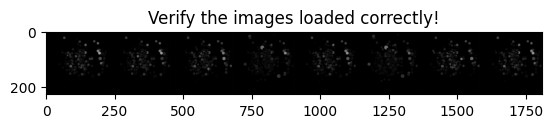

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 35.5977
new best train!
val Loss: 14.9859
new best val!

Epoch 1/34
----------
train Loss: 29.6665
new best train!
val Loss: 15.1971

Epoch 2/34
----------
train Loss: 24.7409
new best train!
val Loss: 14.9383
new best val!

Epoch 3/34
----------
train Loss: 20.7774
new best train!
val Loss: 14.4233
new best val!

Epoch 4/34
----------
train Loss: 18.3608
new best train!
val Loss: 14.7452

Epoch 5/34
----------
train Loss: 16.9527
new best train!
val Loss: 15.0608

Epoch 6/34
----------
train Loss: 16.5596
new best train!
val Loss: 15.1439

Epoch 7/34
----------
train Loss: 16.2392
new best train!
val Loss: 15.6147

Epoch 8/34
----------
train Loss: 16.1639
new best train!
val Loss: 15.3814

Epoch 9/34
----------
train Loss: 16.0723
new best train!
val Loss: 15.4373

Epoch 10/34
----------
train Loss: 16.0436
new best train!
val Loss: 15.1580

Epoch 11/34
----------
train Loss: 16.0215
new best train!
val Loss: 14.9776

Epoch 12/34
----------
train Loss: 16.0305
val Loss: 1

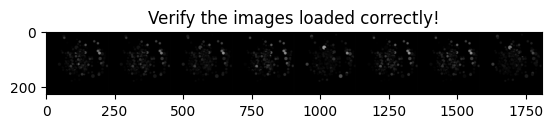

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 38.2716
new best train!
val Loss: 16.0634
new best val!

Epoch 1/34
----------
train Loss: 29.9047
new best train!
val Loss: 16.3846

Epoch 2/34
----------
train Loss: 25.9401
new best train!
val Loss: 16.9476

Epoch 3/34
----------
train Loss: 23.1527
new best train!
val Loss: 17.4116

Epoch 4/34
----------
train Loss: 21.7731
new best train!
val Loss: 17.5221

Epoch 5/34
----------
train Loss: 20.3262
new best train!
val Loss: 17.4750

Epoch 6/34
----------
train Loss: 19.2410
new best train!
val Loss: 17.5955

Epoch 7/34
----------
train Loss: 18.5717
new best train!
val Loss: 17.1860

Epoch 8/34
----------
train Loss: 17.1524
new best train!
val Loss: 16.1631

Epoch 9/34
----------
train Loss: 16.3854
new best train!
val Loss: 16.1099

Epoch 10/34
----------
train Loss: 16.1762
new best train!
val Loss: 16.1112

Epoch 11/34
----------
train Loss: 16.1216
new best train!
val Loss: 16.1492

Epoch 12/34
----------
train Loss: 16.0720
new best train!
val Loss: 15.9356
new b

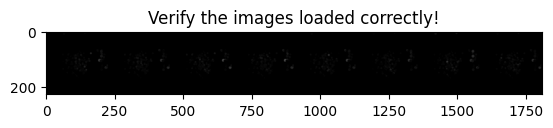

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 29.8691
new best train!
val Loss: 10.7769
new best val!

Epoch 1/34
----------
train Loss: 21.2749
new best train!
val Loss: 10.7042
new best val!

Epoch 2/34
----------
train Loss: 18.2677
new best train!
val Loss: 10.8797

Epoch 3/34
----------
train Loss: 16.7548
new best train!
val Loss: 10.9217

Epoch 4/34
----------
train Loss: 15.6499
new best train!
val Loss: 10.3850
new best val!

Epoch 5/34
----------
train Loss: 15.1654
new best train!
val Loss: 10.0182
new best val!

Epoch 6/34
----------
train Loss: 14.6196
new best train!
val Loss: 9.7315
new best val!

Epoch 7/34
----------
train Loss: 14.4046
new best train!
val Loss: 10.1032

Epoch 8/34
----------
train Loss: 14.6611
val Loss: 10.0565

Epoch 9/34
----------
train Loss: 14.3141
new best train!
val Loss: 10.5733

Epoch 10/34
----------
train Loss: 14.5856
val Loss: 10.8257

Epoch 11/34
----------
train Loss: 14.6252
val Loss: 10.6843

Epoch 12/34
----------
train Loss: 14.9881
val Loss: 8.6320
new best val!



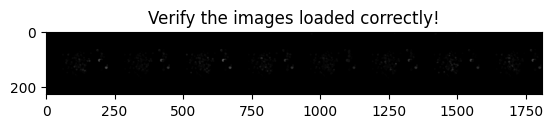

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 27.3714
new best train!
val Loss: 11.7947
new best val!

Epoch 1/34
----------
train Loss: 20.5283
new best train!
val Loss: 11.0991
new best val!

Epoch 2/34
----------
train Loss: 17.8556
new best train!
val Loss: 10.9692
new best val!

Epoch 3/34
----------
train Loss: 16.4326
new best train!
val Loss: 10.8873
new best val!

Epoch 4/34
----------
train Loss: 15.1558
new best train!
val Loss: 10.6700
new best val!

Epoch 5/34
----------
train Loss: 14.7950
new best train!
val Loss: 9.9376
new best val!

Epoch 6/34
----------
train Loss: 14.4977
new best train!
val Loss: 9.4142
new best val!

Epoch 7/34
----------
train Loss: 14.2387
new best train!
val Loss: 10.0023

Epoch 8/34
----------
train Loss: 14.2489
val Loss: 10.6729

Epoch 9/34
----------
train Loss: 14.1615
new best train!
val Loss: 11.2332

Epoch 10/34
----------
train Loss: 14.2969
val Loss: 11.0519

Epoch 11/34
----------
train Loss: 14.6953
val Loss: 10.7724

Epoch 12/34
----------
train Loss: 14.3585
val L

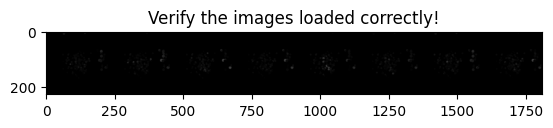

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 28.5790
new best train!
val Loss: 11.5447
new best val!

Epoch 1/34
----------
train Loss: 20.5424
new best train!
val Loss: 11.9726

Epoch 2/34
----------
train Loss: 18.3771
new best train!
val Loss: 12.1712

Epoch 3/34
----------
train Loss: 16.8951
new best train!
val Loss: 11.9027

Epoch 4/34
----------
train Loss: 15.6831
new best train!
val Loss: 11.2802
new best val!

Epoch 5/34
----------
train Loss: 15.3263
new best train!
val Loss: 10.4469
new best val!

Epoch 6/34
----------
train Loss: 14.9960
new best train!
val Loss: 10.1504
new best val!

Epoch 7/34
----------
train Loss: 15.0427
val Loss: 9.8237
new best val!

Epoch 8/34
----------
train Loss: 14.6246
new best train!
val Loss: 10.1731

Epoch 9/34
----------
train Loss: 15.1095
val Loss: 10.0983

Epoch 10/34
----------
train Loss: 14.6301
val Loss: 9.8471

Epoch 11/34
----------
train Loss: 14.8965
val Loss: 10.0454

Epoch 12/34
----------
train Loss: 14.8411
val Loss: 9.8438

Epoch 13/34
----------
train Lo

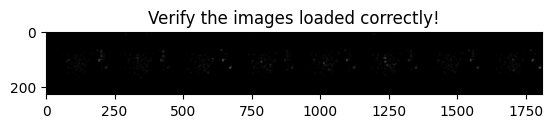

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.7906
new best train!
val Loss: 10.1266
new best val!

Epoch 1/34
----------
train Loss: 22.6215
new best train!
val Loss: 9.8402
new best val!

Epoch 2/34
----------
train Loss: 19.0066
new best train!
val Loss: 10.1385

Epoch 3/34
----------
train Loss: 17.0475
new best train!
val Loss: 10.5904

Epoch 4/34
----------
train Loss: 15.7620
new best train!
val Loss: 10.4690

Epoch 5/34
----------
train Loss: 15.3728
new best train!
val Loss: 9.8062
new best val!

Epoch 6/34
----------
train Loss: 15.4264
val Loss: 9.5651
new best val!

Epoch 7/34
----------
train Loss: 14.7401
new best train!
val Loss: 10.4638

Epoch 8/34
----------
train Loss: 14.6729
new best train!
val Loss: 11.2112

Epoch 9/34
----------
train Loss: 14.4375
new best train!
val Loss: 11.5387

Epoch 10/34
----------
train Loss: 14.5828
val Loss: 12.0110

Epoch 11/34
----------
train Loss: 14.5593
val Loss: 12.4267

Epoch 12/34
----------
train Loss: 15.0189
val Loss: 9.9849

Epoch 13/34
----------
train L

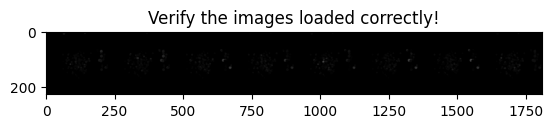

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 28.9210
new best train!
val Loss: 10.1854
new best val!

Epoch 1/34
----------
train Loss: 19.9136
new best train!
val Loss: 10.1777
new best val!

Epoch 2/34
----------
train Loss: 17.7316
new best train!
val Loss: 10.1987

Epoch 3/34
----------
train Loss: 16.1488
new best train!
val Loss: 9.8852
new best val!

Epoch 4/34
----------
train Loss: 15.0656
new best train!
val Loss: 9.4616
new best val!

Epoch 5/34
----------
train Loss: 14.7704
new best train!
val Loss: 9.0590
new best val!

Epoch 6/34
----------
train Loss: 14.6724
new best train!
val Loss: 9.0595

Epoch 7/34
----------
train Loss: 15.4381
val Loss: 9.2809

Epoch 8/34
----------
train Loss: 14.5903
new best train!
val Loss: 9.1456

Epoch 9/34
----------
train Loss: 14.6118
val Loss: 9.3136

Epoch 10/34
----------
train Loss: 15.9293
val Loss: 9.0947

Epoch 11/34
----------
train Loss: 14.9890
val Loss: 8.2447
new best val!

Epoch 12/34
----------
train Loss: 14.6788
val Loss: 7.8029
new best val!

Epoch 13/3

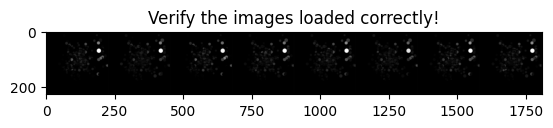

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.5251
new best train!
val Loss: 10.2784
new best val!

Epoch 1/34
----------
train Loss: 24.4057
new best train!
val Loss: 10.8128

Epoch 2/34
----------
train Loss: 22.3965
new best train!
val Loss: 11.4656

Epoch 3/34
----------
train Loss: 20.1407
new best train!
val Loss: 11.7132

Epoch 4/34
----------
train Loss: 19.0712
new best train!
val Loss: 11.4775

Epoch 5/34
----------
train Loss: 17.6305
new best train!
val Loss: 11.6474

Epoch 6/34
----------
train Loss: 17.5568
new best train!
val Loss: 11.5728

Epoch 7/34
----------
train Loss: 16.1291
new best train!
val Loss: 11.3925

Epoch 8/34
----------
train Loss: 15.8877
new best train!
val Loss: 12.3992

Epoch 9/34
----------
train Loss: 15.6970
new best train!
val Loss: 12.7086

Epoch 10/34
----------
train Loss: 15.3511
new best train!
val Loss: 13.4553

Epoch 11/34
----------
train Loss: 16.6614
val Loss: 14.0409

Epoch 12/34
----------
train Loss: 15.7360
val Loss: 14.5102

Epoch 13/34
----------
train Loss: 1

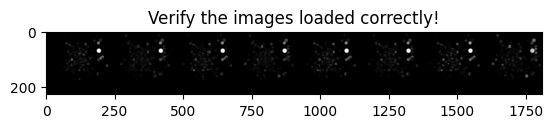

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 32.1049
new best train!
val Loss: 10.5083
new best val!

Epoch 1/34
----------
train Loss: 23.4156
new best train!
val Loss: 11.0637

Epoch 2/34
----------
train Loss: 21.2032
new best train!
val Loss: 11.5481

Epoch 3/34
----------
train Loss: 19.7366
new best train!
val Loss: 11.5079

Epoch 4/34
----------
train Loss: 18.1504
new best train!
val Loss: 11.6972

Epoch 5/34
----------
train Loss: 17.2439
new best train!
val Loss: 11.5167

Epoch 6/34
----------
train Loss: 15.8263
new best train!
val Loss: 11.7324

Epoch 7/34
----------
train Loss: 15.2972
new best train!
val Loss: 12.3377

Epoch 8/34
----------
train Loss: 14.9246
new best train!
val Loss: 13.1089

Epoch 9/34
----------
train Loss: 15.3705
val Loss: 12.7551

Epoch 10/34
----------
train Loss: 15.7839
val Loss: 12.5249

Epoch 11/34
----------
train Loss: 16.3603
val Loss: 13.5802

Epoch 12/34
----------
train Loss: 16.0395
val Loss: 13.6911

Epoch 13/34
----------
train Loss: 17.4874
val Loss: 13.3748

Epoch 

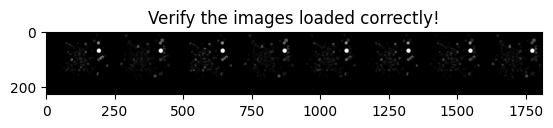

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 30.0095
new best train!
val Loss: 10.1933
new best val!

Epoch 1/34
----------
train Loss: 24.3020
new best train!
val Loss: 10.4901

Epoch 2/34
----------
train Loss: 22.0728
new best train!
val Loss: 11.0635

Epoch 3/34
----------
train Loss: 19.6845
new best train!
val Loss: 11.4486

Epoch 4/34
----------
train Loss: 17.5886
new best train!
val Loss: 11.8486

Epoch 5/34
----------
train Loss: 16.4412
new best train!
val Loss: 12.0852

Epoch 6/34
----------
train Loss: 16.1393
new best train!
val Loss: 11.5343

Epoch 7/34
----------
train Loss: 15.0788
new best train!
val Loss: 11.1503

Epoch 8/34
----------
train Loss: 15.2771
val Loss: 11.5103

Epoch 9/34
----------
train Loss: 14.8719
new best train!
val Loss: 11.5824

Epoch 10/34
----------
train Loss: 14.7596
new best train!
val Loss: 11.3753

Epoch 11/34
----------
train Loss: 14.6815
new best train!
val Loss: 11.1878

Epoch 12/34
----------
train Loss: 14.6364
new best train!
val Loss: 11.1002

Epoch 13/34
--------

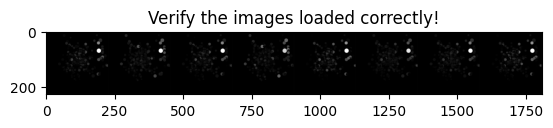

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 32.2156
new best train!
val Loss: 10.2738
new best val!

Epoch 1/34
----------
train Loss: 23.7506
new best train!
val Loss: 10.5322

Epoch 2/34
----------
train Loss: 21.1021
new best train!
val Loss: 10.6264

Epoch 3/34
----------
train Loss: 19.0898
new best train!
val Loss: 10.3842

Epoch 4/34
----------
train Loss: 20.0867
val Loss: 10.5709

Epoch 5/34
----------
train Loss: 17.9101
new best train!
val Loss: 10.6525

Epoch 6/34
----------
train Loss: 19.4701
val Loss: 10.6700

Epoch 7/34
----------
train Loss: 17.0099
new best train!
val Loss: 10.7527

Epoch 8/34
----------
train Loss: 17.6854
val Loss: 10.7781

Epoch 9/34
----------
train Loss: 16.7408
new best train!
val Loss: 10.7188

Epoch 10/34
----------
train Loss: 16.3749
new best train!
val Loss: 10.7179

Epoch 11/34
----------
train Loss: 15.8125
new best train!
val Loss: 10.7788

Epoch 12/34
----------
train Loss: 15.6132
new best train!
val Loss: 12.1044

Epoch 13/34
----------
train Loss: 16.5190
val Loss:

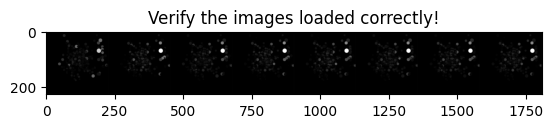

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 29.8424
new best train!
val Loss: 12.5675
new best val!

Epoch 1/34
----------
train Loss: 24.4559
new best train!
val Loss: 12.6001

Epoch 2/34
----------
train Loss: 22.3915
new best train!
val Loss: 12.4875
new best val!

Epoch 3/34
----------
train Loss: 21.0694
new best train!
val Loss: 12.6925

Epoch 4/34
----------
train Loss: 18.4917
new best train!
val Loss: 12.4910

Epoch 5/34
----------
train Loss: 17.2503
new best train!
val Loss: 11.6713
new best val!

Epoch 6/34
----------
train Loss: 16.3440
new best train!
val Loss: 10.9109
new best val!

Epoch 7/34
----------
train Loss: 15.6980
new best train!
val Loss: 10.7577
new best val!

Epoch 8/34
----------
train Loss: 15.3586
new best train!
val Loss: 10.9000

Epoch 9/34
----------
train Loss: 15.5417
val Loss: 12.1586

Epoch 10/34
----------
train Loss: 17.8067
val Loss: 10.7440
new best val!

Epoch 11/34
----------
train Loss: 16.0931
val Loss: 10.4227
new best val!

Epoch 12/34
----------
train Loss: 17.5402
val

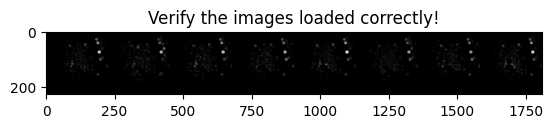

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.5513
new best train!
val Loss: 11.9199
new best val!

Epoch 1/34
----------
train Loss: 23.4400
new best train!
val Loss: 10.8527
new best val!

Epoch 2/34
----------
train Loss: 19.9788
new best train!
val Loss: 10.8251
new best val!

Epoch 3/34
----------
train Loss: 17.1659
new best train!
val Loss: 11.3226

Epoch 4/34
----------
train Loss: 15.3953
new best train!
val Loss: 11.8667

Epoch 5/34
----------
train Loss: 15.3565
new best train!
val Loss: 12.4980

Epoch 6/34
----------
train Loss: 14.5681
new best train!
val Loss: 12.7555

Epoch 7/34
----------
train Loss: 14.4746
new best train!
val Loss: 12.7785

Epoch 8/34
----------
train Loss: 14.6106
val Loss: 12.9835

Epoch 9/34
----------
train Loss: 14.3028
new best train!
val Loss: 12.9963

Epoch 10/34
----------
train Loss: 14.7557
val Loss: 12.4921

Epoch 11/34
----------
train Loss: 14.6213
val Loss: 13.6683

Epoch 12/34
----------
train Loss: 14.5430
val Loss: 13.7981

Epoch 13/34
----------
train Loss: 14.63

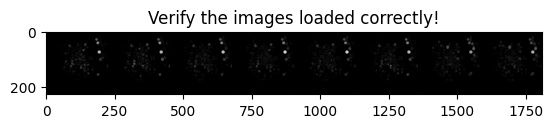

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.2099
new best train!
val Loss: 10.4163
new best val!

Epoch 1/34
----------
train Loss: 22.6991
new best train!
val Loss: 10.5868

Epoch 2/34
----------
train Loss: 20.4756
new best train!
val Loss: 10.7854

Epoch 3/34
----------
train Loss: 18.4063
new best train!
val Loss: 11.1227

Epoch 4/34
----------
train Loss: 16.6778
new best train!
val Loss: 11.5315

Epoch 5/34
----------
train Loss: 15.8447
new best train!
val Loss: 12.2459

Epoch 6/34
----------
train Loss: 15.6862
new best train!
val Loss: 13.0547

Epoch 7/34
----------
train Loss: 14.7332
new best train!
val Loss: 13.1468

Epoch 8/34
----------
train Loss: 14.5991
new best train!
val Loss: 12.0637

Epoch 9/34
----------
train Loss: 14.6546
val Loss: 11.7183

Epoch 10/34
----------
train Loss: 14.6853
val Loss: 11.4877

Epoch 11/34
----------
train Loss: 14.2696
new best train!
val Loss: 12.0319

Epoch 12/34
----------
train Loss: 14.2712
val Loss: 12.4053

Epoch 13/34
----------
train Loss: 14.3303
val Loss:

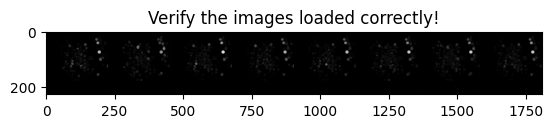

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.0418
new best train!
val Loss: 10.7894
new best val!

Epoch 1/34
----------
train Loss: 22.8823
new best train!
val Loss: 11.1830

Epoch 2/34
----------
train Loss: 19.4815
new best train!
val Loss: 12.2445

Epoch 3/34
----------
train Loss: 17.0317
new best train!
val Loss: 13.0000

Epoch 4/34
----------
train Loss: 15.6941
new best train!
val Loss: 13.1642

Epoch 5/34
----------
train Loss: 14.8625
new best train!
val Loss: 13.0458

Epoch 6/34
----------
train Loss: 14.5629
new best train!
val Loss: 13.2030

Epoch 7/34
----------
train Loss: 14.8233
val Loss: 13.5024

Epoch 8/34
----------
train Loss: 14.4927
new best train!
val Loss: 13.0102

Epoch 9/34
----------
train Loss: 15.5706
val Loss: 13.0958

Epoch 10/34
----------
train Loss: 15.1776
val Loss: 13.4324

Epoch 11/34
----------
train Loss: 15.2281
val Loss: 13.7671

Epoch 12/34
----------
train Loss: 14.8685
val Loss: 13.5437

Epoch 13/34
----------
train Loss: 15.1517
val Loss: 13.3910

Epoch 14/34
----------

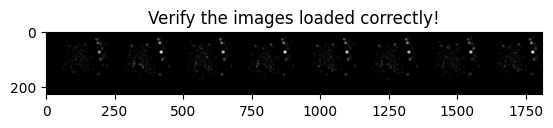

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 30.8944
new best train!
val Loss: 11.5445
new best val!

Epoch 1/34
----------
train Loss: 23.7690
new best train!
val Loss: 11.3461
new best val!

Epoch 2/34
----------
train Loss: 20.4309
new best train!
val Loss: 11.4339

Epoch 3/34
----------
train Loss: 17.5861
new best train!
val Loss: 11.6854

Epoch 4/34
----------
train Loss: 16.7134
new best train!
val Loss: 12.1233

Epoch 5/34
----------
train Loss: 15.6346
new best train!
val Loss: 12.5195

Epoch 6/34
----------
train Loss: 14.7734
new best train!
val Loss: 12.5455

Epoch 7/34
----------
train Loss: 14.6204
new best train!
val Loss: 13.2281

Epoch 8/34
----------
train Loss: 14.9023
val Loss: 13.2145

Epoch 9/34
----------
train Loss: 14.4812
new best train!
val Loss: 13.5070

Epoch 10/34
----------
train Loss: 14.7209
val Loss: 13.7982

Epoch 11/34
----------
train Loss: 15.9033
val Loss: 12.9744

Epoch 12/34
----------
train Loss: 15.3161
val Loss: 12.8994

Epoch 13/34
----------
train Loss: 14.5844
val Loss: 1

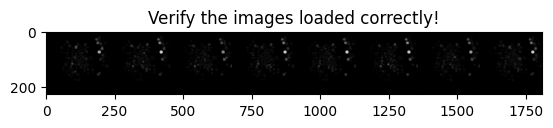

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.8214
new best train!
val Loss: 11.3263
new best val!

Epoch 1/34
----------
train Loss: 23.9924
new best train!
val Loss: 11.6470

Epoch 2/34
----------
train Loss: 19.7889
new best train!
val Loss: 12.2555

Epoch 3/34
----------
train Loss: 17.4814
new best train!
val Loss: 12.9946

Epoch 4/34
----------
train Loss: 16.5596
new best train!
val Loss: 12.9039

Epoch 5/34
----------
train Loss: 15.2691
new best train!
val Loss: 12.0995

Epoch 6/34
----------
train Loss: 14.8917
new best train!
val Loss: 12.5921

Epoch 7/34
----------
train Loss: 14.7165
new best train!
val Loss: 13.5535

Epoch 8/34
----------
train Loss: 14.5477
new best train!
val Loss: 14.1885

Epoch 9/34
----------
train Loss: 14.3777
new best train!
val Loss: 14.1346

Epoch 10/34
----------
train Loss: 14.3452
new best train!
val Loss: 13.4602

Epoch 11/34
----------
train Loss: 14.3549
val Loss: 12.3755

Epoch 12/34
----------
train Loss: 14.1997
new best train!
val Loss: 12.0668

Epoch 13/34
--------

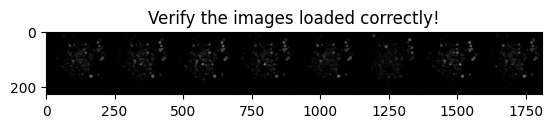

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 32.5480
new best train!
val Loss: 11.4756
new best val!

Epoch 1/34
----------
train Loss: 23.5385
new best train!
val Loss: 10.8122
new best val!

Epoch 2/34
----------
train Loss: 19.5298
new best train!
val Loss: 10.5621
new best val!

Epoch 3/34
----------
train Loss: 17.9236
new best train!
val Loss: 10.6680

Epoch 4/34
----------
train Loss: 16.0041
new best train!
val Loss: 10.5896

Epoch 5/34
----------
train Loss: 15.3453
new best train!
val Loss: 10.3680
new best val!

Epoch 6/34
----------
train Loss: 14.9978
new best train!
val Loss: 9.7814
new best val!

Epoch 7/34
----------
train Loss: 14.8300
new best train!
val Loss: 9.3693
new best val!

Epoch 8/34
----------
train Loss: 14.8790
val Loss: 8.9074
new best val!

Epoch 9/34
----------
train Loss: 14.8570
val Loss: 9.1181

Epoch 10/34
----------
train Loss: 15.0690
val Loss: 11.0767

Epoch 11/34
----------
train Loss: 15.3707
val Loss: 9.9427

Epoch 12/34
----------
train Loss: 15.1977
val Loss: 10.0589

Epoch

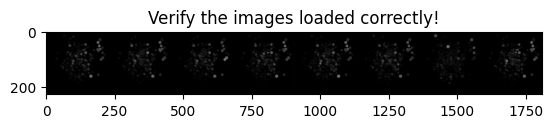

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 33.5383
new best train!
val Loss: 11.4200
new best val!

Epoch 1/34
----------
train Loss: 24.5423
new best train!
val Loss: 11.3648
new best val!

Epoch 2/34
----------
train Loss: 20.7608
new best train!
val Loss: 11.6516

Epoch 3/34
----------
train Loss: 18.5873
new best train!
val Loss: 11.9804

Epoch 4/34
----------
train Loss: 17.8468
new best train!
val Loss: 12.3767

Epoch 5/34
----------
train Loss: 16.8090
new best train!
val Loss: 13.2981

Epoch 6/34
----------
train Loss: 16.9442
val Loss: 13.2086

Epoch 7/34
----------
train Loss: 16.0967
new best train!
val Loss: 12.7662

Epoch 8/34
----------
train Loss: 15.6390
new best train!
val Loss: 13.2496

Epoch 9/34
----------
train Loss: 15.5278
new best train!
val Loss: 13.7177

Epoch 10/34
----------
train Loss: 15.2699
new best train!
val Loss: 12.5581

Epoch 11/34
----------
train Loss: 14.6951
new best train!
val Loss: 10.7726
new best val!

Epoch 12/34
----------
train Loss: 14.6948
new best train!
val Loss: 1

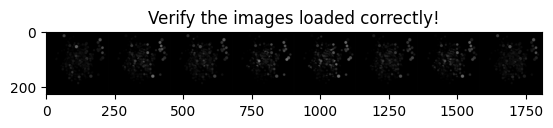

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 34.2480
new best train!
val Loss: 10.7230
new best val!

Epoch 1/34
----------
train Loss: 26.1227
new best train!
val Loss: 10.7912

Epoch 2/34
----------
train Loss: 21.9104
new best train!
val Loss: 10.9462

Epoch 3/34
----------
train Loss: 18.2294
new best train!
val Loss: 11.0139

Epoch 4/34
----------
train Loss: 16.8637
new best train!
val Loss: 10.4740
new best val!

Epoch 5/34
----------
train Loss: 15.4112
new best train!
val Loss: 10.0462
new best val!

Epoch 6/34
----------
train Loss: 15.2180
new best train!
val Loss: 9.7909
new best val!

Epoch 7/34
----------
train Loss: 15.3619
val Loss: 9.5748
new best val!

Epoch 8/34
----------
train Loss: 14.7211
new best train!
val Loss: 11.7983

Epoch 9/34
----------
train Loss: 15.2357
val Loss: 9.4507
new best val!

Epoch 10/34
----------
train Loss: 15.1657
val Loss: 8.8248
new best val!

Epoch 11/34
----------
train Loss: 14.9787
val Loss: 8.5382
new best val!

Epoch 12/34
----------
train Loss: 14.7323
val Loss: 

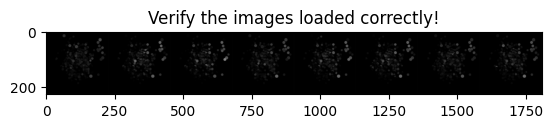

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 33.5896
new best train!
val Loss: 10.8853
new best val!

Epoch 1/34
----------
train Loss: 23.4939
new best train!
val Loss: 10.8811
new best val!

Epoch 2/34
----------
train Loss: 18.3782
new best train!
val Loss: 11.1058

Epoch 3/34
----------
train Loss: 16.7839
new best train!
val Loss: 11.0663

Epoch 4/34
----------
train Loss: 16.3136
new best train!
val Loss: 11.3449

Epoch 5/34
----------
train Loss: 15.3507
new best train!
val Loss: 12.2942

Epoch 6/34
----------
train Loss: 15.5744
val Loss: 12.6041

Epoch 7/34
----------
train Loss: 15.3025
new best train!
val Loss: 12.5189

Epoch 8/34
----------
train Loss: 15.0218
new best train!
val Loss: 12.6248

Epoch 9/34
----------
train Loss: 15.9747
val Loss: 12.5596

Epoch 10/34
----------
train Loss: 15.3056
val Loss: 12.0835

Epoch 11/34
----------
train Loss: 15.4329
val Loss: 12.6477

Epoch 12/34
----------
train Loss: 15.2841
val Loss: 11.8505

Epoch 13/34
----------
train Loss: 15.3027
val Loss: 12.0393

Epoch 14

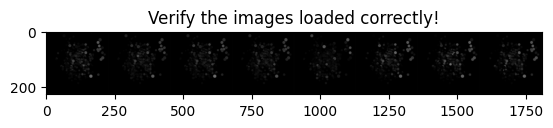

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.8267
new best train!
val Loss: 10.5826
new best val!

Epoch 1/34
----------
train Loss: 22.3735
new best train!
val Loss: 10.3474
new best val!

Epoch 2/34
----------
train Loss: 18.1639
new best train!
val Loss: 10.4512

Epoch 3/34
----------
train Loss: 16.2693
new best train!
val Loss: 10.5338

Epoch 4/34
----------
train Loss: 15.4217
new best train!
val Loss: 10.5192

Epoch 5/34
----------
train Loss: 14.9515
new best train!
val Loss: 10.6909

Epoch 6/34
----------
train Loss: 14.8549
new best train!
val Loss: 10.8357

Epoch 7/34
----------
train Loss: 14.6175
new best train!
val Loss: 11.7854

Epoch 8/34
----------
train Loss: 14.8411
val Loss: 11.0467

Epoch 9/34
----------
train Loss: 14.5542
new best train!
val Loss: 10.2579
new best val!

Epoch 10/34
----------
train Loss: 14.5145
new best train!
val Loss: 10.1938
new best val!

Epoch 11/34
----------
train Loss: 14.4943
new best train!
val Loss: 10.7189

Epoch 12/34
----------
train Loss: 14.4577
new best trai

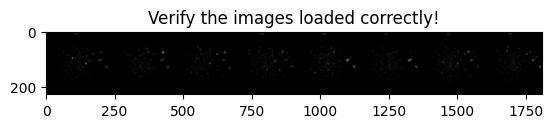

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 38.1326
new best train!
val Loss: 10.4298
new best val!

Epoch 1/34
----------
train Loss: 25.7773
new best train!
val Loss: 10.9663

Epoch 2/34
----------
train Loss: 21.2800
new best train!
val Loss: 10.9754

Epoch 3/34
----------
train Loss: 19.3356
new best train!
val Loss: 10.5100

Epoch 4/34
----------
train Loss: 18.7634
new best train!
val Loss: 9.7931
new best val!

Epoch 5/34
----------
train Loss: 18.4901
new best train!
val Loss: 8.8578
new best val!

Epoch 6/34
----------
train Loss: 18.4056
new best train!
val Loss: 8.0171
new best val!

Epoch 7/34
----------
train Loss: 18.2732
new best train!
val Loss: 7.3116
new best val!

Epoch 8/34
----------
train Loss: 18.2598
new best train!
val Loss: 6.7598
new best val!

Epoch 9/34
----------
train Loss: 18.2269
new best train!
val Loss: 6.4839
new best val!

Epoch 10/34
----------
train Loss: 18.2052
new best train!
val Loss: 6.3669
new best val!

Epoch 11/34
----------
train Loss: 18.2027
new best train!
val Loss: 

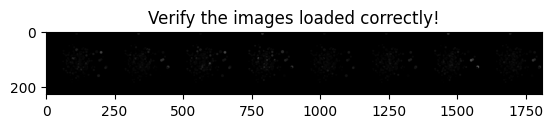

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 35.7323
new best train!
val Loss: 6.6709
new best val!

Epoch 1/34
----------
train Loss: 25.8605
new best train!
val Loss: 7.0905

Epoch 2/34
----------
train Loss: 20.9360
new best train!
val Loss: 7.3687

Epoch 3/34
----------
train Loss: 19.2502
new best train!
val Loss: 7.5374

Epoch 4/34
----------
train Loss: 18.7188
new best train!
val Loss: 7.5617

Epoch 5/34
----------
train Loss: 18.5176
new best train!
val Loss: 7.2206

Epoch 6/34
----------
train Loss: 18.4265
new best train!
val Loss: 6.8083

Epoch 7/34
----------
train Loss: 18.2809
new best train!
val Loss: 6.4384
new best val!

Epoch 8/34
----------
train Loss: 18.2342
new best train!
val Loss: 6.0984
new best val!

Epoch 9/34
----------
train Loss: 18.2281
new best train!
val Loss: 5.8363
new best val!

Epoch 10/34
----------
train Loss: 18.2185
new best train!
val Loss: 5.6812
new best val!

Epoch 11/34
----------
train Loss: 18.1989
new best train!
val Loss: 5.5727
new best val!

Epoch 12/34
----------
t

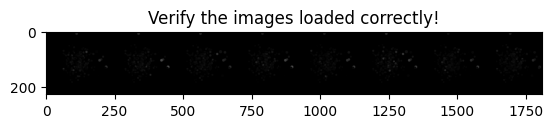

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 37.0288
new best train!
val Loss: 6.3573
new best val!

Epoch 1/34
----------
train Loss: 26.3657
new best train!
val Loss: 6.6024

Epoch 2/34
----------
train Loss: 21.6244
new best train!
val Loss: 6.5597

Epoch 3/34
----------
train Loss: 19.4436
new best train!
val Loss: 6.4216

Epoch 4/34
----------
train Loss: 18.7018
new best train!
val Loss: 6.3937

Epoch 5/34
----------
train Loss: 18.4596
new best train!
val Loss: 6.4327

Epoch 6/34
----------
train Loss: 18.4247
new best train!
val Loss: 6.4577

Epoch 7/34
----------
train Loss: 18.2793
new best train!
val Loss: 6.4298

Epoch 8/34
----------
train Loss: 18.2538
new best train!
val Loss: 6.2389
new best val!

Epoch 9/34
----------
train Loss: 18.2273
new best train!
val Loss: 6.0039
new best val!

Epoch 10/34
----------
train Loss: 18.2075
new best train!
val Loss: 5.7386
new best val!

Epoch 11/34
----------
train Loss: 18.2114
val Loss: 5.4393
new best val!

Epoch 12/34
----------
train Loss: 18.2028
new best tr

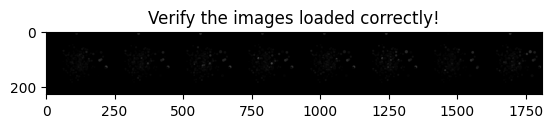

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 37.7411
new best train!
val Loss: 10.4556
new best val!

Epoch 1/34
----------
train Loss: 26.5221
new best train!
val Loss: 11.8121

Epoch 2/34
----------
train Loss: 21.4642
new best train!
val Loss: 12.6599

Epoch 3/34
----------
train Loss: 19.6484
new best train!
val Loss: 13.1346

Epoch 4/34
----------
train Loss: 18.7725
new best train!
val Loss: 13.4329

Epoch 5/34
----------
train Loss: 18.4917
new best train!
val Loss: 13.4389

Epoch 6/34
----------
train Loss: 18.3858
new best train!
val Loss: 13.1916

Epoch 7/34
----------
train Loss: 18.2896
new best train!
val Loss: 12.7111

Epoch 8/34
----------
train Loss: 18.2510
new best train!
val Loss: 12.0485

Epoch 9/34
----------
train Loss: 18.2360
new best train!
val Loss: 11.1106

Epoch 10/34
----------
train Loss: 18.2170
new best train!
val Loss: 10.2429
new best val!

Epoch 11/34
----------
train Loss: 18.2028
new best train!
val Loss: 9.4008
new best val!

Epoch 12/34
----------
train Loss: 18.1970
new best tra

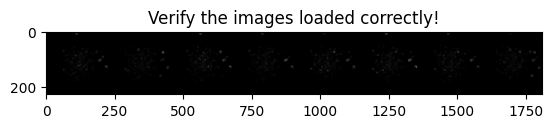

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 41.3835
new best train!
val Loss: 12.4338
new best val!

Epoch 1/34
----------
train Loss: 27.4432
new best train!
val Loss: 13.1374

Epoch 2/34
----------
train Loss: 22.2059
new best train!
val Loss: 13.6268

Epoch 3/34
----------
train Loss: 20.0554
new best train!
val Loss: 13.7174

Epoch 4/34
----------
train Loss: 18.8212
new best train!
val Loss: 13.4664

Epoch 5/34
----------
train Loss: 18.5472
new best train!
val Loss: 13.2200

Epoch 6/34
----------
train Loss: 18.3805
new best train!
val Loss: 12.8142

Epoch 7/34
----------
train Loss: 18.3014
new best train!
val Loss: 12.1371
new best val!

Epoch 8/34
----------
train Loss: 18.2605
new best train!
val Loss: 11.2909
new best val!

Epoch 9/34
----------
train Loss: 18.2401
new best train!
val Loss: 10.3419
new best val!

Epoch 10/34
----------
train Loss: 18.2115
new best train!
val Loss: 9.2220
new best val!

Epoch 11/34
----------
train Loss: 18.2150
val Loss: 8.2506
new best val!

Epoch 12/34
----------
train L

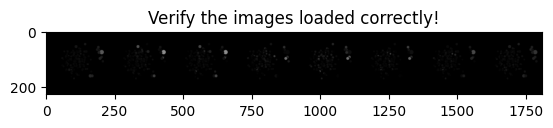

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 34.2715
new best train!
val Loss: 7.6513
new best val!

Epoch 1/34
----------
train Loss: 23.4392
new best train!
val Loss: 7.5760
new best val!

Epoch 2/34
----------
train Loss: 19.4433
new best train!
val Loss: 7.6795

Epoch 3/34
----------
train Loss: 17.6066
new best train!
val Loss: 7.7194

Epoch 4/34
----------
train Loss: 16.5882
new best train!
val Loss: 7.5010
new best val!

Epoch 5/34
----------
train Loss: 16.0403
new best train!
val Loss: 7.2076
new best val!

Epoch 6/34
----------
train Loss: 15.7707
new best train!
val Loss: 6.9335
new best val!

Epoch 7/34
----------
train Loss: 15.6693
new best train!
val Loss: 6.5448
new best val!

Epoch 8/34
----------
train Loss: 15.6130
new best train!
val Loss: 6.0567
new best val!

Epoch 9/34
----------
train Loss: 15.5850
new best train!
val Loss: 5.5307
new best val!

Epoch 10/34
----------
train Loss: 15.5557
new best train!
val Loss: 5.2377
new best val!

Epoch 11/34
----------
train Loss: 15.4177
new best train!


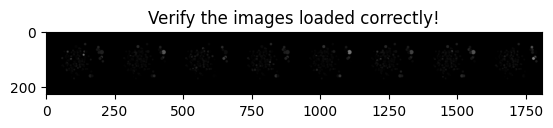

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 32.6350
new best train!
val Loss: 7.9997
new best val!

Epoch 1/34
----------
train Loss: 23.5559
new best train!
val Loss: 7.8444
new best val!

Epoch 2/34
----------
train Loss: 20.3003
new best train!
val Loss: 7.8896

Epoch 3/34
----------
train Loss: 18.1299
new best train!
val Loss: 8.0304

Epoch 4/34
----------
train Loss: 16.6999
new best train!
val Loss: 8.0745

Epoch 5/34
----------
train Loss: 16.2152
new best train!
val Loss: 8.1400

Epoch 6/34
----------
train Loss: 15.3878
new best train!
val Loss: 8.0823

Epoch 7/34
----------
train Loss: 15.2693
new best train!
val Loss: 7.9529

Epoch 8/34
----------
train Loss: 15.1677
new best train!
val Loss: 7.7018
new best val!

Epoch 9/34
----------
train Loss: 15.1063
new best train!
val Loss: 7.2086
new best val!

Epoch 10/34
----------
train Loss: 15.1703
val Loss: 6.5285
new best val!

Epoch 11/34
----------
train Loss: 15.0873
new best train!
val Loss: 6.0471
new best val!

Epoch 12/34
----------
train Loss: 15.10

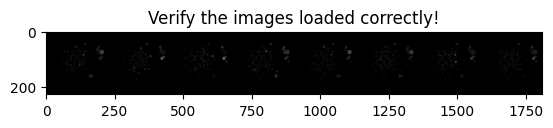

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.4349
new best train!
val Loss: 7.7404
new best val!

Epoch 1/34
----------
train Loss: 22.0167
new best train!
val Loss: 7.4545
new best val!

Epoch 2/34
----------
train Loss: 18.6643
new best train!
val Loss: 7.1564
new best val!

Epoch 3/34
----------
train Loss: 17.1827
new best train!
val Loss: 6.9415
new best val!

Epoch 4/34
----------
train Loss: 15.8979
new best train!
val Loss: 6.7187
new best val!

Epoch 5/34
----------
train Loss: 15.4992
new best train!
val Loss: 6.4700
new best val!

Epoch 6/34
----------
train Loss: 15.2793
new best train!
val Loss: 6.1935
new best val!

Epoch 7/34
----------
train Loss: 15.1721
new best train!
val Loss: 6.0529
new best val!

Epoch 8/34
----------
train Loss: 15.1651
new best train!
val Loss: 5.8937
new best val!

Epoch 9/34
----------
train Loss: 15.0940
new best train!
val Loss: 5.7782
new best val!

Epoch 10/34
----------
train Loss: 15.1143
val Loss: 5.6663
new best val!

Epoch 11/34
----------
train Loss: 15.0984
val 

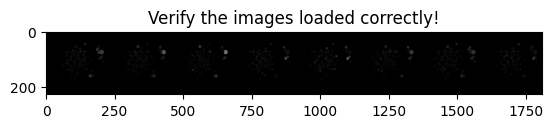

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.9497
new best train!
val Loss: 7.6644
new best val!

Epoch 1/34
----------
train Loss: 22.6230
new best train!
val Loss: 7.7153

Epoch 2/34
----------
train Loss: 19.0261
new best train!
val Loss: 7.7792

Epoch 3/34
----------
train Loss: 17.0715
new best train!
val Loss: 7.7894

Epoch 4/34
----------
train Loss: 15.9501
new best train!
val Loss: 7.6876

Epoch 5/34
----------
train Loss: 15.5075
new best train!
val Loss: 7.4971
new best val!

Epoch 6/34
----------
train Loss: 15.3989
new best train!
val Loss: 7.1640
new best val!

Epoch 7/34
----------
train Loss: 15.1798
new best train!
val Loss: 6.5230
new best val!

Epoch 8/34
----------
train Loss: 15.1554
new best train!
val Loss: 5.8860
new best val!

Epoch 9/34
----------
train Loss: 15.1153
new best train!
val Loss: 5.5947
new best val!

Epoch 10/34
----------
train Loss: 15.0947
new best train!
val Loss: 5.5426
new best val!

Epoch 11/34
----------
train Loss: 15.0726
new best train!
val Loss: 5.5796

Epoch 12/3

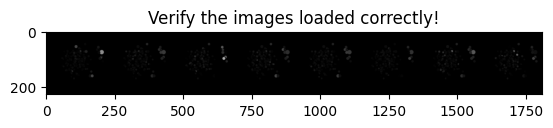

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 33.2826
new best train!
val Loss: 7.8753
new best val!

Epoch 1/34
----------
train Loss: 23.6010
new best train!
val Loss: 7.9276

Epoch 2/34
----------
train Loss: 19.9743
new best train!
val Loss: 8.0599

Epoch 3/34
----------
train Loss: 18.2279
new best train!
val Loss: 8.2323

Epoch 4/34
----------
train Loss: 16.7175
new best train!
val Loss: 8.3071

Epoch 5/34
----------
train Loss: 16.4580
new best train!
val Loss: 8.2527

Epoch 6/34
----------
train Loss: 15.5480
new best train!
val Loss: 8.0470

Epoch 7/34
----------
train Loss: 15.6112
val Loss: 7.6678
new best val!

Epoch 8/34
----------
train Loss: 15.2434
new best train!
val Loss: 7.0873
new best val!

Epoch 9/34
----------
train Loss: 15.1581
new best train!
val Loss: 6.3813
new best val!

Epoch 10/34
----------
train Loss: 15.1524
new best train!
val Loss: 6.1508
new best val!

Epoch 11/34
----------
train Loss: 15.1750
val Loss: 6.2395

Epoch 12/34
----------
train Loss: 15.0940
new best train!
val Loss: 6

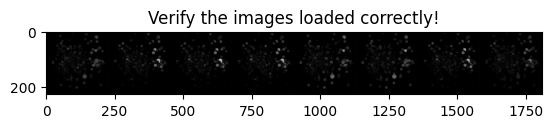

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 45.6089
new best train!
val Loss: 9.1256
new best val!

Epoch 1/34
----------
train Loss: 36.2892
new best train!
val Loss: 9.0096
new best val!

Epoch 2/34
----------
train Loss: 30.1097
new best train!
val Loss: 8.9286
new best val!

Epoch 3/34
----------
train Loss: 24.6118
new best train!
val Loss: 8.9175
new best val!

Epoch 4/34
----------
train Loss: 21.9206
new best train!
val Loss: 8.7290
new best val!

Epoch 5/34
----------
train Loss: 20.9078
new best train!
val Loss: 8.4947
new best val!

Epoch 6/34
----------
train Loss: 20.4506
new best train!
val Loss: 8.5334

Epoch 7/34
----------
train Loss: 19.8839
new best train!
val Loss: 8.7304

Epoch 8/34
----------
train Loss: 20.0763
val Loss: 9.0397

Epoch 9/34
----------
train Loss: 19.6737
new best train!
val Loss: 9.5971

Epoch 10/34
----------
train Loss: 19.5537
new best train!
val Loss: 10.3098

Epoch 11/34
----------
train Loss: 19.5157
new best train!
val Loss: 10.9631

Epoch 12/34
----------
train Loss: 19.

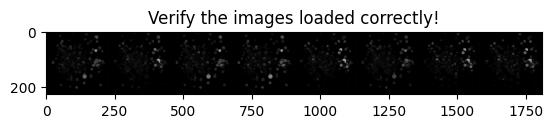

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 43.7938
new best train!
val Loss: 9.3979
new best val!

Epoch 1/34
----------
train Loss: 35.6800
new best train!
val Loss: 9.3308
new best val!

Epoch 2/34
----------
train Loss: 30.7502
new best train!
val Loss: 9.1707
new best val!

Epoch 3/34
----------
train Loss: 25.0091
new best train!
val Loss: 9.1202
new best val!

Epoch 4/34
----------
train Loss: 21.8367
new best train!
val Loss: 9.0012
new best val!

Epoch 5/34
----------
train Loss: 20.6387
new best train!
val Loss: 8.9926
new best val!

Epoch 6/34
----------
train Loss: 19.9991
new best train!
val Loss: 9.1062

Epoch 7/34
----------
train Loss: 19.6908
new best train!
val Loss: 9.1710

Epoch 8/34
----------
train Loss: 19.8104
val Loss: 9.1740

Epoch 9/34
----------
train Loss: 19.5883
new best train!
val Loss: 9.2828

Epoch 10/34
----------
train Loss: 19.5055
new best train!
val Loss: 9.4209

Epoch 11/34
----------
train Loss: 19.5074
val Loss: 9.6160

Epoch 12/34
----------
train Loss: 19.4721
new best trai

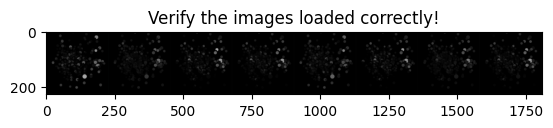

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 43.5833
new best train!
val Loss: 9.2828
new best val!

Epoch 1/34
----------
train Loss: 34.3925
new best train!
val Loss: 9.3200

Epoch 2/34
----------
train Loss: 27.9252
new best train!
val Loss: 9.3346

Epoch 3/34
----------
train Loss: 24.1260
new best train!
val Loss: 9.2003
new best val!

Epoch 4/34
----------
train Loss: 21.7831
new best train!
val Loss: 9.0313
new best val!

Epoch 5/34
----------
train Loss: 20.7420
new best train!
val Loss: 8.8407
new best val!

Epoch 6/34
----------
train Loss: 20.0118
new best train!
val Loss: 8.8437

Epoch 7/34
----------
train Loss: 19.7793
new best train!
val Loss: 8.7769
new best val!

Epoch 8/34
----------
train Loss: 19.6147
new best train!
val Loss: 8.6856
new best val!

Epoch 9/34
----------
train Loss: 19.5415
new best train!
val Loss: 8.5946
new best val!

Epoch 10/34
----------
train Loss: 19.5836
val Loss: 8.5610
new best val!

Epoch 11/34
----------
train Loss: 19.5017
new best train!
val Loss: 8.6238

Epoch 12/34


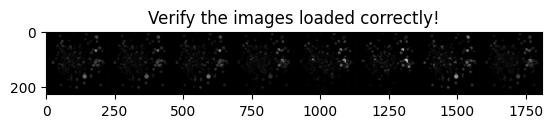

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 44.4691
new best train!
val Loss: 10.9799
new best val!

Epoch 1/34
----------
train Loss: 33.0716
new best train!
val Loss: 10.9386
new best val!

Epoch 2/34
----------
train Loss: 29.4576
new best train!
val Loss: 11.1367

Epoch 3/34
----------
train Loss: 26.0920
new best train!
val Loss: 11.2191

Epoch 4/34
----------
train Loss: 21.9810
new best train!
val Loss: 11.4113

Epoch 5/34
----------
train Loss: 21.4824
new best train!
val Loss: 11.4342

Epoch 6/34
----------
train Loss: 20.3867
new best train!
val Loss: 11.2233

Epoch 7/34
----------
train Loss: 19.8253
new best train!
val Loss: 10.8432
new best val!

Epoch 8/34
----------
train Loss: 19.7794
new best train!
val Loss: 10.3781
new best val!

Epoch 9/34
----------
train Loss: 19.6997
new best train!
val Loss: 10.0218
new best val!

Epoch 10/34
----------
train Loss: 19.5421
new best train!
val Loss: 9.8375
new best val!

Epoch 11/34
----------
train Loss: 19.4962
new best train!
val Loss: 9.6741
new best val!



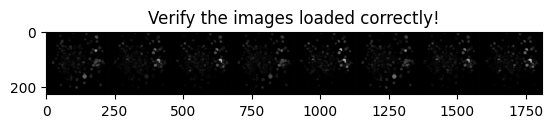

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 44.1233
new best train!
val Loss: 10.0416
new best val!

Epoch 1/34
----------
train Loss: 34.7210
new best train!
val Loss: 10.1598

Epoch 2/34
----------
train Loss: 30.3723
new best train!
val Loss: 10.2337

Epoch 3/34
----------
train Loss: 26.6903
new best train!
val Loss: 10.5498

Epoch 4/34
----------
train Loss: 23.2054
new best train!
val Loss: 10.9644

Epoch 5/34
----------
train Loss: 22.2758
new best train!
val Loss: 10.8131

Epoch 6/34
----------
train Loss: 20.5944
new best train!
val Loss: 10.3033

Epoch 7/34
----------
train Loss: 20.0081
new best train!
val Loss: 9.7765
new best val!

Epoch 8/34
----------
train Loss: 19.8490
new best train!
val Loss: 9.6924
new best val!

Epoch 9/34
----------
train Loss: 19.6958
new best train!
val Loss: 9.7574

Epoch 10/34
----------
train Loss: 19.5564
new best train!
val Loss: 9.9084

Epoch 11/34
----------
train Loss: 19.5196
new best train!
val Loss: 10.0930

Epoch 12/34
----------
train Loss: 19.4939
new best train!

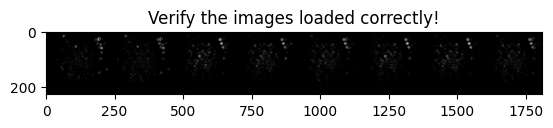

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 35.9087
new best train!
val Loss: 13.1225
new best val!

Epoch 1/34
----------
train Loss: 27.8611
new best train!
val Loss: 13.9031

Epoch 2/34
----------
train Loss: 22.6939
new best train!
val Loss: 14.5683

Epoch 3/34
----------
train Loss: 19.4280
new best train!
val Loss: 14.6368

Epoch 4/34
----------
train Loss: 17.3227
new best train!
val Loss: 14.6306

Epoch 5/34
----------
train Loss: 16.9324
new best train!
val Loss: 14.6267

Epoch 6/34
----------
train Loss: 16.4025
new best train!
val Loss: 13.7320

Epoch 7/34
----------
train Loss: 16.2684
new best train!
val Loss: 12.6338
new best val!

Epoch 8/34
----------
train Loss: 16.1852
new best train!
val Loss: 11.7132
new best val!

Epoch 9/34
----------
train Loss: 16.1373
new best train!
val Loss: 11.4896
new best val!

Epoch 10/34
----------
train Loss: 16.1325
new best train!
val Loss: 11.8037

Epoch 11/34
----------
train Loss: 16.1233
new best train!
val Loss: 12.0927

Epoch 12/34
----------
train Loss: 16.10

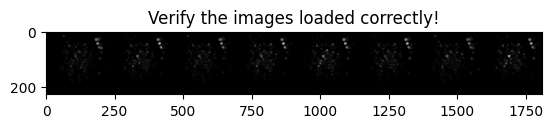

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 35.9033
new best train!
val Loss: 12.1410
new best val!

Epoch 1/34
----------
train Loss: 27.4007
new best train!
val Loss: 12.8462

Epoch 2/34
----------
train Loss: 21.9548
new best train!
val Loss: 13.8612

Epoch 3/34
----------
train Loss: 18.8675
new best train!
val Loss: 14.3801

Epoch 4/34
----------
train Loss: 17.5131
new best train!
val Loss: 14.7067

Epoch 5/34
----------
train Loss: 16.8619
new best train!
val Loss: 14.8210

Epoch 6/34
----------
train Loss: 16.4241
new best train!
val Loss: 15.1460

Epoch 7/34
----------
train Loss: 16.2280
new best train!
val Loss: 15.1723

Epoch 8/34
----------
train Loss: 16.3011
val Loss: 14.5818

Epoch 9/34
----------
train Loss: 16.1335
new best train!
val Loss: 13.7476

Epoch 10/34
----------
train Loss: 16.1186
new best train!
val Loss: 13.2052

Epoch 11/34
----------
train Loss: 16.1077
new best train!
val Loss: 13.0699

Epoch 12/34
----------
train Loss: 16.1080
val Loss: 13.0403

Epoch 13/34
----------
train Loss: 1

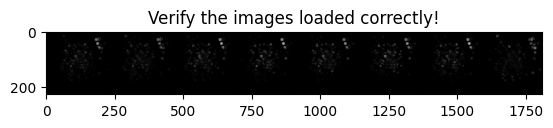

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.0118
new best train!
val Loss: 13.8474
new best val!

Epoch 1/34
----------
train Loss: 27.5290
new best train!
val Loss: 14.2806

Epoch 2/34
----------
train Loss: 22.3453
new best train!
val Loss: 14.2448

Epoch 3/34
----------
train Loss: 19.3099
new best train!
val Loss: 13.7716
new best val!

Epoch 4/34
----------
train Loss: 17.7450
new best train!
val Loss: 13.7633
new best val!

Epoch 5/34
----------
train Loss: 17.1221
new best train!
val Loss: 14.0465

Epoch 6/34
----------
train Loss: 16.8350
new best train!
val Loss: 13.7844

Epoch 7/34
----------
train Loss: 16.5909
new best train!
val Loss: 13.3996
new best val!

Epoch 8/34
----------
train Loss: 16.4608
new best train!
val Loss: 13.1906
new best val!

Epoch 9/34
----------
train Loss: 16.2006
new best train!
val Loss: 13.1042
new best val!

Epoch 10/34
----------
train Loss: 16.1706
new best train!
val Loss: 12.9938
new best val!

Epoch 11/34
----------
train Loss: 16.1935
val Loss: 12.7678
new best val!



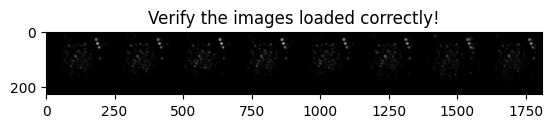

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 37.0780
new best train!
val Loss: 13.5436
new best val!

Epoch 1/34
----------
train Loss: 28.1395
new best train!
val Loss: 13.8758

Epoch 2/34
----------
train Loss: 23.0619
new best train!
val Loss: 13.5919

Epoch 3/34
----------
train Loss: 20.5103
new best train!
val Loss: 13.7363

Epoch 4/34
----------
train Loss: 17.9781
new best train!
val Loss: 13.5616

Epoch 5/34
----------
train Loss: 17.3769
new best train!
val Loss: 12.5430
new best val!

Epoch 6/34
----------
train Loss: 16.5389
new best train!
val Loss: 12.0882
new best val!

Epoch 7/34
----------
train Loss: 16.4326
new best train!
val Loss: 12.0062
new best val!

Epoch 8/34
----------
train Loss: 16.2309
new best train!
val Loss: 11.8235
new best val!

Epoch 9/34
----------
train Loss: 16.1741
new best train!
val Loss: 11.7510
new best val!

Epoch 10/34
----------
train Loss: 16.1565
new best train!
val Loss: 11.7436
new best val!

Epoch 11/34
----------
train Loss: 16.1430
new best train!
val Loss: 11.7203

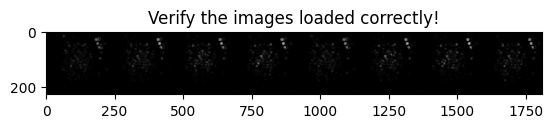

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 35.8122
new best train!
val Loss: 12.1072
new best val!

Epoch 1/34
----------
train Loss: 26.4644
new best train!
val Loss: 12.2867

Epoch 2/34
----------
train Loss: 21.5321
new best train!
val Loss: 12.3173

Epoch 3/34
----------
train Loss: 18.4519
new best train!
val Loss: 12.3160

Epoch 4/34
----------
train Loss: 17.2238
new best train!
val Loss: 12.4519

Epoch 5/34
----------
train Loss: 16.5505
new best train!
val Loss: 12.7159

Epoch 6/34
----------
train Loss: 16.4218
new best train!
val Loss: 12.5317

Epoch 7/34
----------
train Loss: 16.1928
new best train!
val Loss: 12.1576

Epoch 8/34
----------
train Loss: 16.1592
new best train!
val Loss: 11.6862
new best val!

Epoch 9/34
----------
train Loss: 16.2181
val Loss: 11.6388
new best val!

Epoch 10/34
----------
train Loss: 16.1254
new best train!
val Loss: 11.6895

Epoch 11/34
----------
train Loss: 16.1091
new best train!
val Loss: 11.8461

Epoch 12/34
----------
train Loss: 16.1140
val Loss: 12.0372

Epoch 13

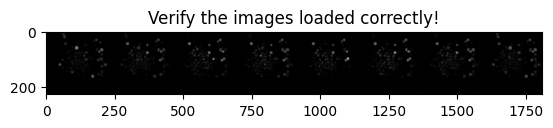

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 37.7872
new best train!
val Loss: 12.9393
new best val!

Epoch 1/34
----------
train Loss: 28.9852
new best train!
val Loss: 12.7243
new best val!

Epoch 2/34
----------
train Loss: 24.4286
new best train!
val Loss: 12.8266

Epoch 3/34
----------
train Loss: 21.1647
new best train!
val Loss: 12.4715
new best val!

Epoch 4/34
----------
train Loss: 18.3120
new best train!
val Loss: 12.7508

Epoch 5/34
----------
train Loss: 17.5071
new best train!
val Loss: 13.0873

Epoch 6/34
----------
train Loss: 17.1764
new best train!
val Loss: 13.2053

Epoch 7/34
----------
train Loss: 17.0860
new best train!
val Loss: 13.4910

Epoch 8/34
----------
train Loss: 17.1010
val Loss: 13.7489

Epoch 9/34
----------
train Loss: 17.0170
new best train!
val Loss: 13.9677

Epoch 10/34
----------
train Loss: 17.0102
new best train!
val Loss: 13.7371

Epoch 11/34
----------
train Loss: 16.9449
new best train!
val Loss: 13.5237

Epoch 12/34
----------
train Loss: 16.9831
val Loss: 13.4867

Epoch 13

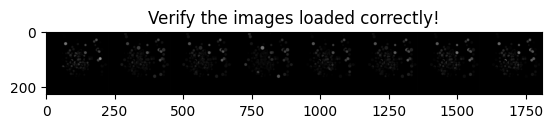

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 37.6686
new best train!
val Loss: 12.7490
new best val!

Epoch 1/34
----------
train Loss: 28.3227
new best train!
val Loss: 13.0304

Epoch 2/34
----------
train Loss: 23.7025
new best train!
val Loss: 13.1493

Epoch 3/34
----------
train Loss: 19.8907
new best train!
val Loss: 13.0614

Epoch 4/34
----------
train Loss: 19.4663
new best train!
val Loss: 12.9953

Epoch 5/34
----------
train Loss: 17.9885
new best train!
val Loss: 13.1253

Epoch 6/34
----------
train Loss: 18.1407
val Loss: 13.1754

Epoch 7/34
----------
train Loss: 17.5389
new best train!
val Loss: 12.8561

Epoch 8/34
----------
train Loss: 17.7343
val Loss: 12.8247

Epoch 9/34
----------
train Loss: 17.3025
new best train!
val Loss: 13.2021

Epoch 10/34
----------
train Loss: 17.4881
val Loss: 13.2840

Epoch 11/34
----------
train Loss: 17.3461
val Loss: 13.1120

Epoch 12/34
----------
train Loss: 17.4085
val Loss: 12.7864

Epoch 13/34
----------
train Loss: 17.3013
new best train!
val Loss: 13.0647

Epoch 

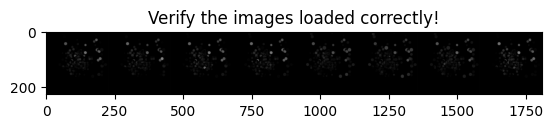

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 37.9186
new best train!
val Loss: 12.3833
new best val!

Epoch 1/34
----------
train Loss: 28.5449
new best train!
val Loss: 12.5615

Epoch 2/34
----------
train Loss: 22.7310
new best train!
val Loss: 12.8830

Epoch 3/34
----------
train Loss: 19.6660
new best train!
val Loss: 13.2186

Epoch 4/34
----------
train Loss: 18.5008
new best train!
val Loss: 13.4110

Epoch 5/34
----------
train Loss: 17.6537
new best train!
val Loss: 13.6339

Epoch 6/34
----------
train Loss: 17.2684
new best train!
val Loss: 14.0584

Epoch 7/34
----------
train Loss: 17.0545
new best train!
val Loss: 13.8943

Epoch 8/34
----------
train Loss: 17.0301
new best train!
val Loss: 13.8373

Epoch 9/34
----------
train Loss: 16.9738
new best train!
val Loss: 13.9722

Epoch 10/34
----------
train Loss: 17.0573
val Loss: 13.8784

Epoch 11/34
----------
train Loss: 16.9468
new best train!
val Loss: 13.7163

Epoch 12/34
----------
train Loss: 17.0171
val Loss: 13.6763

Epoch 13/34
----------
train Loss: 1

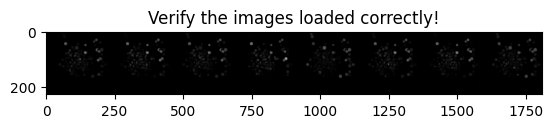

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 38.4798
new best train!
val Loss: 12.8989
new best val!

Epoch 1/34
----------
train Loss: 28.8541
new best train!
val Loss: 13.0915

Epoch 2/34
----------
train Loss: 23.5649
new best train!
val Loss: 13.2030

Epoch 3/34
----------
train Loss: 19.4976
new best train!
val Loss: 13.1266

Epoch 4/34
----------
train Loss: 17.8128
new best train!
val Loss: 12.9381

Epoch 5/34
----------
train Loss: 17.5069
new best train!
val Loss: 12.9498

Epoch 6/34
----------
train Loss: 17.3849
new best train!
val Loss: 12.9787

Epoch 7/34
----------
train Loss: 17.1200
new best train!
val Loss: 12.7372
new best val!

Epoch 8/34
----------
train Loss: 17.2069
val Loss: 12.7542

Epoch 9/34
----------
train Loss: 17.1041
new best train!
val Loss: 12.5948
new best val!

Epoch 10/34
----------
train Loss: 17.0200
new best train!
val Loss: 12.8819

Epoch 11/34
----------
train Loss: 17.1316
val Loss: 12.3789
new best val!

Epoch 12/34
----------
train Loss: 16.9618
new best train!
val Loss: 11.

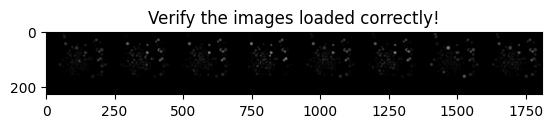

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.8121
new best train!
val Loss: 12.5422
new best val!

Epoch 1/34
----------
train Loss: 27.3598
new best train!
val Loss: 12.5675

Epoch 2/34
----------
train Loss: 22.9518
new best train!
val Loss: 12.5739

Epoch 3/34
----------
train Loss: 19.2216
new best train!
val Loss: 12.9114

Epoch 4/34
----------
train Loss: 18.1198
new best train!
val Loss: 12.7246

Epoch 5/34
----------
train Loss: 17.5838
new best train!
val Loss: 12.6200

Epoch 6/34
----------
train Loss: 17.1199
new best train!
val Loss: 12.6566

Epoch 7/34
----------
train Loss: 17.0230
new best train!
val Loss: 13.0475

Epoch 8/34
----------
train Loss: 16.9714
new best train!
val Loss: 13.2724

Epoch 9/34
----------
train Loss: 16.9607
new best train!
val Loss: 13.3683

Epoch 10/34
----------
train Loss: 17.0287
val Loss: 13.1257

Epoch 11/34
----------
train Loss: 16.9427
new best train!
val Loss: 13.0680

Epoch 12/34
----------
train Loss: 16.9343
new best train!
val Loss: 13.0178

Epoch 13/34
--------

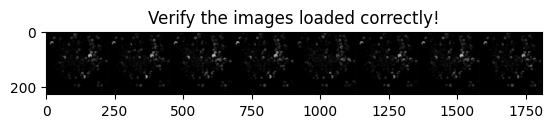

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 39.1703
new best train!
val Loss: 8.2520
new best val!

Epoch 1/34
----------
train Loss: 31.1515
new best train!
val Loss: 8.2649

Epoch 2/34
----------
train Loss: 26.9347
new best train!
val Loss: 8.1349
new best val!

Epoch 3/34
----------
train Loss: 24.4379
new best train!
val Loss: 7.8913
new best val!

Epoch 4/34
----------
train Loss: 21.8367
new best train!
val Loss: 7.7517
new best val!

Epoch 5/34
----------
train Loss: 21.2237
new best train!
val Loss: 7.6930
new best val!

Epoch 6/34
----------
train Loss: 20.3153
new best train!
val Loss: 7.6219
new best val!

Epoch 7/34
----------
train Loss: 20.1646
new best train!
val Loss: 7.5462
new best val!

Epoch 8/34
----------
train Loss: 20.0737
new best train!
val Loss: 7.5058
new best val!

Epoch 9/34
----------
train Loss: 19.8956
new best train!
val Loss: 7.5133

Epoch 10/34
----------
train Loss: 19.8476
new best train!
val Loss: 7.5828

Epoch 11/34
----------
train Loss: 19.8218
new best train!
val Loss: 7.61

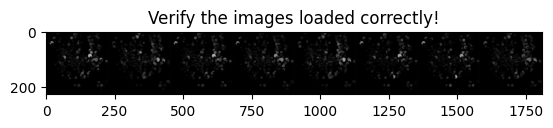

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 45.2140
new best train!
val Loss: 9.4342
new best val!

Epoch 1/34
----------
train Loss: 34.7641
new best train!
val Loss: 9.3377
new best val!

Epoch 2/34
----------
train Loss: 28.5828
new best train!
val Loss: 9.1535
new best val!

Epoch 3/34
----------
train Loss: 25.0086
new best train!
val Loss: 9.2311

Epoch 4/34
----------
train Loss: 22.7597
new best train!
val Loss: 9.0587
new best val!

Epoch 5/34
----------
train Loss: 21.2055
new best train!
val Loss: 8.9002
new best val!

Epoch 6/34
----------
train Loss: 20.5694
new best train!
val Loss: 8.8735
new best val!

Epoch 7/34
----------
train Loss: 20.1713
new best train!
val Loss: 8.9210

Epoch 8/34
----------
train Loss: 20.0229
new best train!
val Loss: 8.9479

Epoch 9/34
----------
train Loss: 19.9252
new best train!
val Loss: 8.8843

Epoch 10/34
----------
train Loss: 19.9535
val Loss: 8.6954
new best val!

Epoch 11/34
----------
train Loss: 19.8385
new best train!
val Loss: 8.5082
new best val!

Epoch 12/34


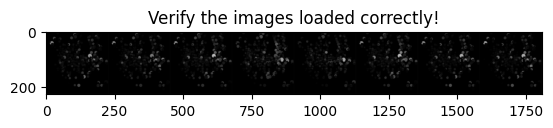

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 39.9634
new best train!
val Loss: 8.2618
new best val!

Epoch 1/34
----------
train Loss: 32.5634
new best train!
val Loss: 7.9998
new best val!

Epoch 2/34
----------
train Loss: 27.5728
new best train!
val Loss: 7.8298
new best val!

Epoch 3/34
----------
train Loss: 24.3975
new best train!
val Loss: 7.7484
new best val!

Epoch 4/34
----------
train Loss: 22.5783
new best train!
val Loss: 7.7074
new best val!

Epoch 5/34
----------
train Loss: 21.1935
new best train!
val Loss: 7.7017
new best val!

Epoch 6/34
----------
train Loss: 20.8325
new best train!
val Loss: 7.7274

Epoch 7/34
----------
train Loss: 20.1714
new best train!
val Loss: 7.7464

Epoch 8/34
----------
train Loss: 20.0033
new best train!
val Loss: 7.7352

Epoch 9/34
----------
train Loss: 19.9197
new best train!
val Loss: 7.6603
new best val!

Epoch 10/34
----------
train Loss: 19.9461
val Loss: 7.6382
new best val!

Epoch 11/34
----------
train Loss: 19.8307
new best train!
val Loss: 7.6487

Epoch 12/34


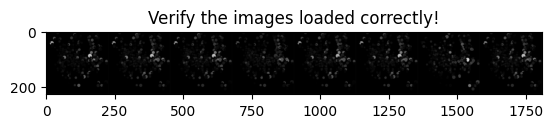

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 40.1942
new best train!
val Loss: 11.4228
new best val!

Epoch 1/34
----------
train Loss: 32.5699
new best train!
val Loss: 11.2536
new best val!

Epoch 2/34
----------
train Loss: 28.0284
new best train!
val Loss: 10.9211
new best val!

Epoch 3/34
----------
train Loss: 24.4076
new best train!
val Loss: 10.4139
new best val!

Epoch 4/34
----------
train Loss: 21.8927
new best train!
val Loss: 10.0814
new best val!

Epoch 5/34
----------
train Loss: 21.1114
new best train!
val Loss: 10.0192
new best val!

Epoch 6/34
----------
train Loss: 20.3598
new best train!
val Loss: 9.7583
new best val!

Epoch 7/34
----------
train Loss: 20.1917
new best train!
val Loss: 9.2967
new best val!

Epoch 8/34
----------
train Loss: 20.0088
new best train!
val Loss: 8.8007
new best val!

Epoch 9/34
----------
train Loss: 19.9077
new best train!
val Loss: 8.5199
new best val!

Epoch 10/34
----------
train Loss: 19.8551
new best train!
val Loss: 8.4337
new best val!

Epoch 11/34
----------
tr

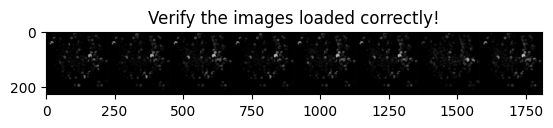

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 46.4133
new best train!
val Loss: 11.5831
new best val!

Epoch 1/34
----------
train Loss: 36.2401
new best train!
val Loss: 11.0381
new best val!

Epoch 2/34
----------
train Loss: 30.3272
new best train!
val Loss: 10.6215
new best val!

Epoch 3/34
----------
train Loss: 25.8021
new best train!
val Loss: 10.0743
new best val!

Epoch 4/34
----------
train Loss: 23.3767
new best train!
val Loss: 9.4828
new best val!

Epoch 5/34
----------
train Loss: 21.4657
new best train!
val Loss: 9.0581
new best val!

Epoch 6/34
----------
train Loss: 20.5217
new best train!
val Loss: 8.7732
new best val!

Epoch 7/34
----------
train Loss: 20.2199
new best train!
val Loss: 8.6003
new best val!

Epoch 8/34
----------
train Loss: 20.0198
new best train!
val Loss: 8.5688
new best val!

Epoch 9/34
----------
train Loss: 19.9134
new best train!
val Loss: 8.7304

Epoch 10/34
----------
train Loss: 19.8993
new best train!
val Loss: 9.0352

Epoch 11/34
----------
train Loss: 19.8141
new best tra

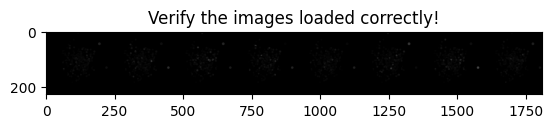

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 29.3877
new best train!
val Loss: 7.9365
new best val!

Epoch 1/34
----------
train Loss: 23.0475
new best train!
val Loss: 6.8068
new best val!

Epoch 2/34
----------
train Loss: 20.0236
new best train!
val Loss: 6.3326
new best val!

Epoch 3/34
----------
train Loss: 18.9552
new best train!
val Loss: 5.9959
new best val!

Epoch 4/34
----------
train Loss: 18.5623
new best train!
val Loss: 5.8040
new best val!

Epoch 5/34
----------
train Loss: 18.1138
new best train!
val Loss: 5.6326
new best val!

Epoch 6/34
----------
train Loss: 17.9091
new best train!
val Loss: 5.4955
new best val!

Epoch 7/34
----------
train Loss: 17.7848
new best train!
val Loss: 5.3913
new best val!

Epoch 8/34
----------
train Loss: 17.7585
new best train!
val Loss: 5.3176
new best val!

Epoch 9/34
----------
train Loss: 17.6738
new best train!
val Loss: 5.1741
new best val!

Epoch 10/34
----------
train Loss: 17.6460
new best train!
val Loss: 5.0840
new best val!

Epoch 11/34
----------
train Lo

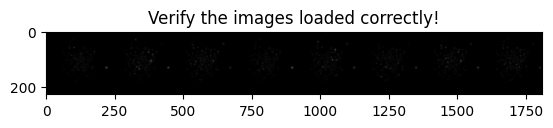

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 39.4985
new best train!
val Loss: 9.5173
new best val!

Epoch 1/34
----------
train Loss: 28.4992
new best train!
val Loss: 8.3682
new best val!

Epoch 2/34
----------
train Loss: 23.3255
new best train!
val Loss: 7.6473
new best val!

Epoch 3/34
----------
train Loss: 20.3445
new best train!
val Loss: 7.2130
new best val!

Epoch 4/34
----------
train Loss: 18.8599
new best train!
val Loss: 6.9423
new best val!

Epoch 5/34
----------
train Loss: 18.2473
new best train!
val Loss: 6.5975
new best val!

Epoch 6/34
----------
train Loss: 17.9484
new best train!
val Loss: 6.1402
new best val!

Epoch 7/34
----------
train Loss: 17.7955
new best train!
val Loss: 5.8476
new best val!

Epoch 8/34
----------
train Loss: 17.7148
new best train!
val Loss: 5.6437
new best val!

Epoch 9/34
----------
train Loss: 17.6949
new best train!
val Loss: 5.5551
new best val!

Epoch 10/34
----------
train Loss: 17.6937
new best train!
val Loss: 5.4940
new best val!

Epoch 11/34
----------
train Lo

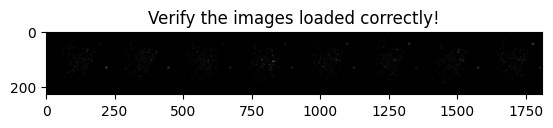

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.2497
new best train!
val Loss: 9.5865
new best val!

Epoch 1/34
----------
train Loss: 26.9354
new best train!
val Loss: 8.4742
new best val!

Epoch 2/34
----------
train Loss: 22.0618
new best train!
val Loss: 7.7244
new best val!

Epoch 3/34
----------
train Loss: 20.1156
new best train!
val Loss: 7.2086
new best val!

Epoch 4/34
----------
train Loss: 18.9554
new best train!
val Loss: 6.6171
new best val!

Epoch 5/34
----------
train Loss: 18.2822
new best train!
val Loss: 6.1011
new best val!

Epoch 6/34
----------
train Loss: 18.0539
new best train!
val Loss: 5.6066
new best val!

Epoch 7/34
----------
train Loss: 17.8171
new best train!
val Loss: 5.0347
new best val!

Epoch 8/34
----------
train Loss: 17.7857
new best train!
val Loss: 4.7277
new best val!

Epoch 9/34
----------
train Loss: 17.6814
new best train!
val Loss: 4.5384
new best val!

Epoch 10/34
----------
train Loss: 17.6842
val Loss: 4.4157
new best val!

Epoch 11/34
----------
train Loss: 17.7943
val 

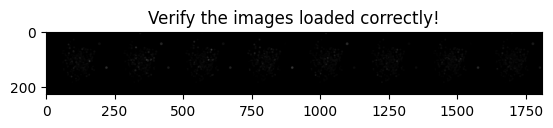

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 39.6933
new best train!
val Loss: 7.5389
new best val!

Epoch 1/34
----------
train Loss: 28.1255
new best train!
val Loss: 6.8350
new best val!

Epoch 2/34
----------
train Loss: 23.2581
new best train!
val Loss: 6.5681
new best val!

Epoch 3/34
----------
train Loss: 20.0978
new best train!
val Loss: 6.5858

Epoch 4/34
----------
train Loss: 18.9056
new best train!
val Loss: 6.5824

Epoch 5/34
----------
train Loss: 18.2549
new best train!
val Loss: 6.5157
new best val!

Epoch 6/34
----------
train Loss: 17.9618
new best train!
val Loss: 6.1210
new best val!

Epoch 7/34
----------
train Loss: 17.8237
new best train!
val Loss: 5.7978
new best val!

Epoch 8/34
----------
train Loss: 17.7676
new best train!
val Loss: 5.5775
new best val!

Epoch 9/34
----------
train Loss: 17.6949
new best train!
val Loss: 5.4893
new best val!

Epoch 10/34
----------
train Loss: 17.6653
new best train!
val Loss: 5.3705
new best val!

Epoch 11/34
----------
train Loss: 17.6530
new best train!


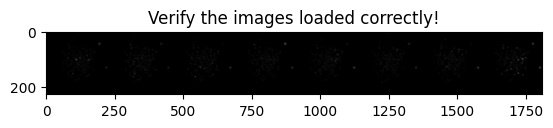

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 29.4021
new best train!
val Loss: 6.8360
new best val!

Epoch 1/34
----------
train Loss: 22.0863
new best train!
val Loss: 6.1177
new best val!

Epoch 2/34
----------
train Loss: 19.7774
new best train!
val Loss: 5.6129
new best val!

Epoch 3/34
----------
train Loss: 18.7730
new best train!
val Loss: 5.4402
new best val!

Epoch 4/34
----------
train Loss: 18.1820
new best train!
val Loss: 5.4091
new best val!

Epoch 5/34
----------
train Loss: 17.9136
new best train!
val Loss: 5.2587
new best val!

Epoch 6/34
----------
train Loss: 17.8183
new best train!
val Loss: 5.1056
new best val!

Epoch 7/34
----------
train Loss: 17.7022
new best train!
val Loss: 4.9343
new best val!

Epoch 8/34
----------
train Loss: 17.6683
new best train!
val Loss: 4.8059
new best val!

Epoch 9/34
----------
train Loss: 17.6784
val Loss: 4.7278
new best val!

Epoch 10/34
----------
train Loss: 17.6092
new best train!
val Loss: 4.7391

Epoch 11/34
----------
train Loss: 17.6016
new best train!
va

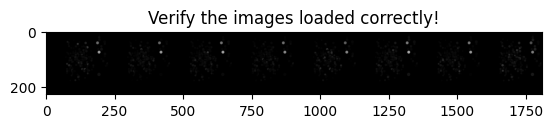

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 39.4218
new best train!
val Loss: 9.6520
new best val!

Epoch 1/34
----------
train Loss: 29.2999
new best train!
val Loss: 10.1259

Epoch 2/34
----------
train Loss: 23.2509
new best train!
val Loss: 10.4219

Epoch 3/34
----------
train Loss: 20.7125
new best train!
val Loss: 10.9321

Epoch 4/34
----------
train Loss: 19.3496
new best train!
val Loss: 11.3793

Epoch 5/34
----------
train Loss: 18.8151
new best train!
val Loss: 11.6339

Epoch 6/34
----------
train Loss: 18.5433
new best train!
val Loss: 11.8565

Epoch 7/34
----------
train Loss: 18.4766
new best train!
val Loss: 11.9580

Epoch 8/34
----------
train Loss: 18.4213
new best train!
val Loss: 11.9243

Epoch 9/34
----------
train Loss: 18.4116
new best train!
val Loss: 11.7538

Epoch 10/34
----------
train Loss: 18.3834
new best train!
val Loss: 11.4977

Epoch 11/34
----------
train Loss: 18.3672
new best train!
val Loss: 11.1280

Epoch 12/34
----------
train Loss: 18.3590
new best train!
val Loss: 10.8076

Epoch

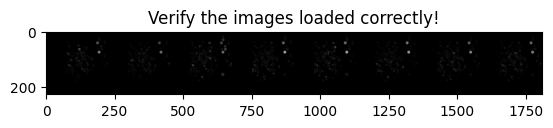

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 44.6667
new best train!
val Loss: 9.4729
new best val!

Epoch 1/34
----------
train Loss: 32.0073
new best train!
val Loss: 9.9812

Epoch 2/34
----------
train Loss: 23.9464
new best train!
val Loss: 10.4164

Epoch 3/34
----------
train Loss: 20.9165
new best train!
val Loss: 10.7374

Epoch 4/34
----------
train Loss: 19.2469
new best train!
val Loss: 10.9471

Epoch 5/34
----------
train Loss: 18.7561
new best train!
val Loss: 10.9179

Epoch 6/34
----------
train Loss: 18.5391
new best train!
val Loss: 10.7986

Epoch 7/34
----------
train Loss: 18.4739
new best train!
val Loss: 10.3975

Epoch 8/34
----------
train Loss: 18.4075
new best train!
val Loss: 9.7467

Epoch 9/34
----------
train Loss: 18.3859
new best train!
val Loss: 9.1224
new best val!

Epoch 10/34
----------
train Loss: 18.3689
new best train!
val Loss: 8.4265
new best val!

Epoch 11/34
----------
train Loss: 18.3571
new best train!
val Loss: 7.8505
new best val!

Epoch 12/34
----------
train Loss: 18.3511
new

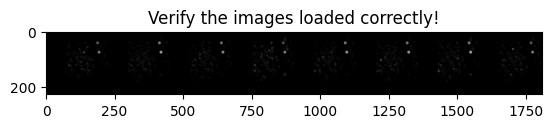

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 43.0707
new best train!
val Loss: 10.1461
new best val!

Epoch 1/34
----------
train Loss: 30.8576
new best train!
val Loss: 10.6219

Epoch 2/34
----------
train Loss: 23.3102
new best train!
val Loss: 11.1518

Epoch 3/34
----------
train Loss: 20.1318
new best train!
val Loss: 11.8508

Epoch 4/34
----------
train Loss: 18.9969
new best train!
val Loss: 12.1976

Epoch 5/34
----------
train Loss: 18.6385
new best train!
val Loss: 12.3463

Epoch 6/34
----------
train Loss: 18.6248
new best train!
val Loss: 12.3926

Epoch 7/34
----------
train Loss: 18.4364
new best train!
val Loss: 12.4450

Epoch 8/34
----------
train Loss: 18.4222
new best train!
val Loss: 12.3791

Epoch 9/34
----------
train Loss: 18.3862
new best train!
val Loss: 12.1999

Epoch 10/34
----------
train Loss: 18.3781
new best train!
val Loss: 12.0070

Epoch 11/34
----------
train Loss: 18.3930
val Loss: 11.6744

Epoch 12/34
----------
train Loss: 18.3450
new best train!
val Loss: 11.2991

Epoch 13/34
--------

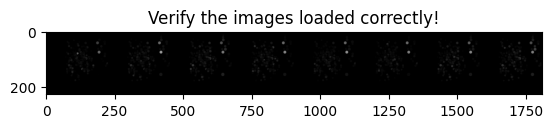

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 37.8687
new best train!
val Loss: 8.1731
new best val!

Epoch 1/34
----------
train Loss: 27.6393
new best train!
val Loss: 8.3221

Epoch 2/34
----------
train Loss: 22.2752
new best train!
val Loss: 8.9466

Epoch 3/34
----------
train Loss: 19.9994
new best train!
val Loss: 9.9488

Epoch 4/34
----------
train Loss: 19.0931
new best train!
val Loss: 10.5655

Epoch 5/34
----------
train Loss: 18.6801
new best train!
val Loss: 10.7017

Epoch 6/34
----------
train Loss: 18.5101
new best train!
val Loss: 10.6346

Epoch 7/34
----------
train Loss: 18.4304
new best train!
val Loss: 10.4743

Epoch 8/34
----------
train Loss: 18.3997
new best train!
val Loss: 10.1859

Epoch 9/34
----------
train Loss: 18.3822
new best train!
val Loss: 9.8245

Epoch 10/34
----------
train Loss: 18.3705
new best train!
val Loss: 9.5237

Epoch 11/34
----------
train Loss: 18.3754
val Loss: 9.2937

Epoch 12/34
----------
train Loss: 18.3773
val Loss: 9.0517

Epoch 13/34
----------
train Loss: 18.3484
n

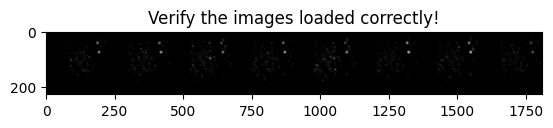

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 46.9581
new best train!
val Loss: 11.8330
new best val!

Epoch 1/34
----------
train Loss: 34.3924
new best train!
val Loss: 12.0534

Epoch 2/34
----------
train Loss: 26.5531
new best train!
val Loss: 12.1993

Epoch 3/34
----------
train Loss: 21.4566
new best train!
val Loss: 12.5004

Epoch 4/34
----------
train Loss: 19.4305
new best train!
val Loss: 12.6995

Epoch 5/34
----------
train Loss: 18.9022
new best train!
val Loss: 12.7565

Epoch 6/34
----------
train Loss: 18.6784
new best train!
val Loss: 12.7548

Epoch 7/34
----------
train Loss: 18.4639
new best train!
val Loss: 12.6305

Epoch 8/34
----------
train Loss: 18.4089
new best train!
val Loss: 12.4522

Epoch 9/34
----------
train Loss: 18.3860
new best train!
val Loss: 12.2232

Epoch 10/34
----------
train Loss: 18.3686
new best train!
val Loss: 11.7914
new best val!

Epoch 11/34
----------
train Loss: 18.3601
new best train!
val Loss: 11.0638
new best val!

Epoch 12/34
----------
train Loss: 18.3527
new best tr

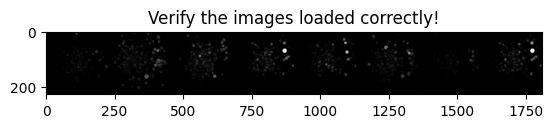

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 41.5051
new best train!
val Loss: 36.1714
new best val!

Epoch 1/34
----------
train Loss: 36.9941
new best train!
val Loss: 34.4984
new best val!

Epoch 2/34
----------
train Loss: 33.4449
new best train!
val Loss: 33.0746
new best val!

Epoch 3/34
----------
train Loss: 29.7573
new best train!
val Loss: 36.3374

Epoch 4/34
----------
train Loss: 27.1079
new best train!
val Loss: 33.9402

Epoch 5/34
----------
train Loss: 25.1104
new best train!
val Loss: 36.0992

Epoch 6/34
----------
train Loss: 24.1261
new best train!
val Loss: 35.9456

Epoch 7/34
----------
train Loss: 22.3098
new best train!
val Loss: 34.8068

Epoch 8/34
----------
train Loss: 21.0966
new best train!
val Loss: 35.0911

Epoch 9/34
----------
train Loss: 21.1836
val Loss: 35.0674

Epoch 10/34
----------
train Loss: 22.1575
val Loss: 35.6457

Epoch 11/34
----------
train Loss: 22.2268
val Loss: 32.8359
new best val!

Epoch 12/34
----------
train Loss: 21.7088
val Loss: 34.7424

Epoch 13/34
----------
tra

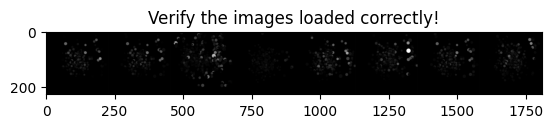

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 41.5041
new best train!
val Loss: 34.1334
new best val!

Epoch 1/34
----------
train Loss: 37.9298
new best train!
val Loss: 34.7431

Epoch 2/34
----------
train Loss: 34.6670
new best train!
val Loss: 37.9426

Epoch 3/34
----------
train Loss: 30.3610
new best train!
val Loss: 33.9428
new best val!

Epoch 4/34
----------
train Loss: 26.6100
new best train!
val Loss: 36.4290

Epoch 5/34
----------
train Loss: 24.0740
new best train!
val Loss: 36.4639

Epoch 6/34
----------
train Loss: 24.3203
val Loss: 36.4355

Epoch 7/34
----------
train Loss: 23.2522
new best train!
val Loss: 36.6571

Epoch 8/34
----------
train Loss: 23.1965
new best train!
val Loss: 35.7979

Epoch 9/34
----------
train Loss: 21.4793
new best train!
val Loss: 35.6295

Epoch 10/34
----------
train Loss: 21.7095
val Loss: 33.2055
new best val!

Epoch 11/34
----------
train Loss: 21.2034
new best train!
val Loss: 34.5737

Epoch 12/34
----------
train Loss: 21.1905
new best train!
val Loss: 34.0541

Epoch 13

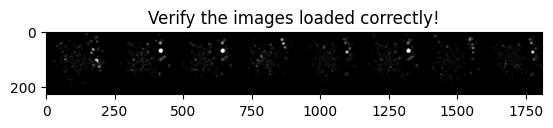

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 41.4242
new best train!
val Loss: 34.4544
new best val!

Epoch 1/34
----------
train Loss: 37.1574
new best train!
val Loss: 34.0589
new best val!

Epoch 2/34
----------
train Loss: 33.0362
new best train!
val Loss: 32.9242
new best val!

Epoch 3/34
----------
train Loss: 29.1473
new best train!
val Loss: 33.2909

Epoch 4/34
----------
train Loss: 26.1771
new best train!
val Loss: 35.6003

Epoch 5/34
----------
train Loss: 25.7932
new best train!
val Loss: 33.7472

Epoch 6/34
----------
train Loss: 23.4569
new best train!
val Loss: 33.6824

Epoch 7/34
----------
train Loss: 21.8852
new best train!
val Loss: 35.3157

Epoch 8/34
----------
train Loss: 21.8160
new best train!
val Loss: 34.8727

Epoch 9/34
----------
train Loss: 21.5625
new best train!
val Loss: 34.2018

Epoch 10/34
----------
train Loss: 21.3511
new best train!
val Loss: 33.8089

Epoch 11/34
----------
train Loss: 21.3683
val Loss: 35.2507

Epoch 12/34
----------
train Loss: 20.8295
new best train!
val Loss: 3

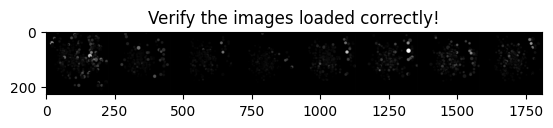

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 41.8011
new best train!
val Loss: 33.3950
new best val!

Epoch 1/34
----------
train Loss: 37.4811
new best train!
val Loss: 33.9357

Epoch 2/34
----------
train Loss: 33.4208
new best train!
val Loss: 35.5943

Epoch 3/34
----------
train Loss: 30.5787
new best train!
val Loss: 35.3250

Epoch 4/34
----------
train Loss: 27.0199
new best train!
val Loss: 36.9211

Epoch 5/34
----------
train Loss: 24.9223
new best train!
val Loss: 36.0350

Epoch 6/34
----------
train Loss: 24.6022
new best train!
val Loss: 36.3859

Epoch 7/34
----------
train Loss: 23.4410
new best train!
val Loss: 38.0515

Epoch 8/34
----------
train Loss: 22.5501
new best train!
val Loss: 36.7544

Epoch 9/34
----------
train Loss: 21.6254
new best train!
val Loss: 34.1668

Epoch 10/34
----------
train Loss: 21.3277
new best train!
val Loss: 36.5037

Epoch 11/34
----------
train Loss: 20.9282
new best train!
val Loss: 35.9453

Epoch 12/34
----------
train Loss: 20.8498
new best train!
val Loss: 35.0995

Epoc

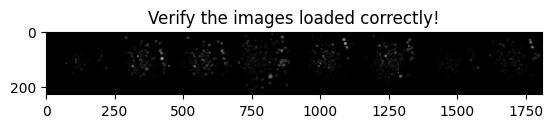

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 42.1101
new best train!
val Loss: 34.6956
new best val!

Epoch 1/34
----------
train Loss: 37.8927
new best train!
val Loss: 32.2022
new best val!

Epoch 2/34
----------
train Loss: 33.9660
new best train!
val Loss: 32.3102

Epoch 3/34
----------
train Loss: 30.4289
new best train!
val Loss: 33.3786

Epoch 4/34
----------
train Loss: 27.9979
new best train!
val Loss: 35.2750

Epoch 5/34
----------
train Loss: 25.3432
new best train!
val Loss: 34.6177

Epoch 6/34
----------
train Loss: 22.3747
new best train!
val Loss: 34.7001

Epoch 7/34
----------
train Loss: 21.5952
new best train!
val Loss: 34.1170

Epoch 8/34
----------
train Loss: 21.1106
new best train!
val Loss: 36.2266

Epoch 9/34
----------
train Loss: 20.7867
new best train!
val Loss: 34.0424

Epoch 10/34
----------
train Loss: 21.0323
val Loss: 35.9759

Epoch 11/34
----------
train Loss: 21.1379
val Loss: 35.3301

Epoch 12/34
----------
train Loss: 24.2792
val Loss: 38.0668

Epoch 13/34
----------
train Loss: 22.

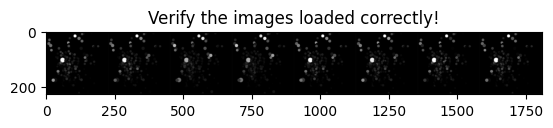

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 37.1883
new best train!
val Loss: 12.7268
new best val!

Epoch 1/34
----------
train Loss: 29.5083
new best train!
val Loss: 12.9060

Epoch 2/34
----------
train Loss: 24.0558
new best train!
val Loss: 12.7210
new best val!

Epoch 3/34
----------
train Loss: 21.7292
new best train!
val Loss: 12.9732

Epoch 4/34
----------
train Loss: 19.5142
new best train!
val Loss: 13.2933

Epoch 5/34
----------
train Loss: 17.9083
new best train!
val Loss: 12.9711

Epoch 6/34
----------
train Loss: 18.3954
val Loss: 14.1413

Epoch 7/34
----------
train Loss: 17.2830
new best train!
val Loss: 14.1657

Epoch 8/34
----------
train Loss: 17.1024
new best train!
val Loss: 12.3525
new best val!

Epoch 9/34
----------
train Loss: 17.0732
new best train!
val Loss: 11.8683
new best val!

Epoch 10/34
----------
train Loss: 16.8686
new best train!
val Loss: 13.7822

Epoch 11/34
----------
train Loss: 16.7817
new best train!
val Loss: 14.2992

Epoch 12/34
----------
train Loss: 16.6688
new best trai

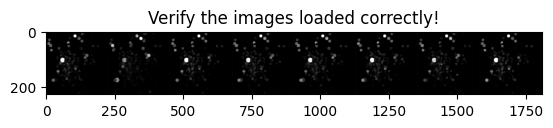

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 38.2069
new best train!
val Loss: 12.5227
new best val!

Epoch 1/34
----------
train Loss: 32.3811
new best train!
val Loss: 12.5620

Epoch 2/34
----------
train Loss: 25.9927
new best train!
val Loss: 12.5966

Epoch 3/34
----------
train Loss: 21.2832
new best train!
val Loss: 12.7423

Epoch 4/34
----------
train Loss: 18.4949
new best train!
val Loss: 12.9960

Epoch 5/34
----------
train Loss: 17.6600
new best train!
val Loss: 13.2644

Epoch 6/34
----------
train Loss: 17.1367
new best train!
val Loss: 13.3157

Epoch 7/34
----------
train Loss: 16.8122
new best train!
val Loss: 13.3649

Epoch 8/34
----------
train Loss: 16.6146
new best train!
val Loss: 13.1750

Epoch 9/34
----------
train Loss: 16.6303
val Loss: 13.0294

Epoch 10/34
----------
train Loss: 16.5457
new best train!
val Loss: 12.8975

Epoch 11/34
----------
train Loss: 16.6799
val Loss: 12.7076

Epoch 12/34
----------
train Loss: 16.6684
val Loss: 12.7434

Epoch 13/34
----------
train Loss: 16.6148
val Loss:

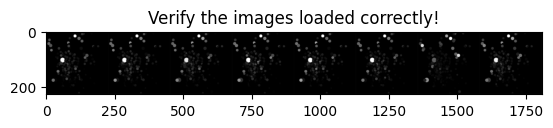

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 37.3767
new best train!
val Loss: 12.3640
new best val!

Epoch 1/34
----------
train Loss: 28.1144
new best train!
val Loss: 12.3157
new best val!

Epoch 2/34
----------
train Loss: 23.2189
new best train!
val Loss: 12.3766

Epoch 3/34
----------
train Loss: 22.2331
new best train!
val Loss: 12.2397
new best val!

Epoch 4/34
----------
train Loss: 20.5680
new best train!
val Loss: 12.7374

Epoch 5/34
----------
train Loss: 18.0084
new best train!
val Loss: 12.8356

Epoch 6/34
----------
train Loss: 17.1526
new best train!
val Loss: 12.4542

Epoch 7/34
----------
train Loss: 16.9914
new best train!
val Loss: 12.1720
new best val!

Epoch 8/34
----------
train Loss: 16.6967
new best train!
val Loss: 12.1444
new best val!

Epoch 9/34
----------
train Loss: 16.6462
new best train!
val Loss: 12.3314

Epoch 10/34
----------
train Loss: 16.7016
val Loss: 12.3353

Epoch 11/34
----------
train Loss: 16.6272
new best train!
val Loss: 12.2577

Epoch 12/34
----------
train Loss: 16.5474

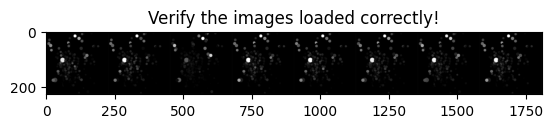

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.3056
new best train!
val Loss: 13.0166
new best val!

Epoch 1/34
----------
train Loss: 29.8654
new best train!
val Loss: 12.7688
new best val!

Epoch 2/34
----------
train Loss: 27.1921
new best train!
val Loss: 12.8649

Epoch 3/34
----------
train Loss: 23.0178
new best train!
val Loss: 12.7458
new best val!

Epoch 4/34
----------
train Loss: 20.0411
new best train!
val Loss: 12.7084
new best val!

Epoch 5/34
----------
train Loss: 17.9744
new best train!
val Loss: 12.8051

Epoch 6/34
----------
train Loss: 17.3402
new best train!
val Loss: 12.9350

Epoch 7/34
----------
train Loss: 16.8413
new best train!
val Loss: 12.9390

Epoch 8/34
----------
train Loss: 16.6828
new best train!
val Loss: 13.0271

Epoch 9/34
----------
train Loss: 16.6331
new best train!
val Loss: 12.9844

Epoch 10/34
----------
train Loss: 16.6670
val Loss: 12.9097

Epoch 11/34
----------
train Loss: 16.5589
new best train!
val Loss: 12.7040
new best val!

Epoch 12/34
----------
train Loss: 16.5597

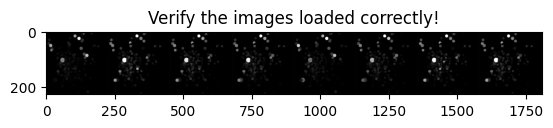

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 37.9044
new best train!
val Loss: 13.4151
new best val!

Epoch 1/34
----------
train Loss: 32.7160
new best train!
val Loss: 13.6456

Epoch 2/34
----------
train Loss: 26.4824
new best train!
val Loss: 13.1050
new best val!

Epoch 3/34
----------
train Loss: 22.3172
new best train!
val Loss: 12.8509
new best val!

Epoch 4/34
----------
train Loss: 20.5133
new best train!
val Loss: 13.0318

Epoch 5/34
----------
train Loss: 18.2376
new best train!
val Loss: 12.9303

Epoch 6/34
----------
train Loss: 17.6417
new best train!
val Loss: 12.5432
new best val!

Epoch 7/34
----------
train Loss: 16.8211
new best train!
val Loss: 12.3152
new best val!

Epoch 8/34
----------
train Loss: 16.9183
val Loss: 12.2525
new best val!

Epoch 9/34
----------
train Loss: 16.6804
new best train!
val Loss: 12.2156
new best val!

Epoch 10/34
----------
train Loss: 16.6371
new best train!
val Loss: 12.2640

Epoch 11/34
----------
train Loss: 16.5733
new best train!
val Loss: 12.4348

Epoch 12/34
--

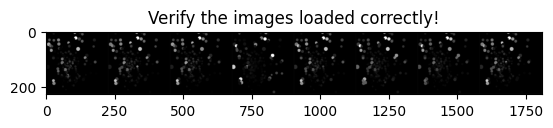

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 41.7479
new best train!
val Loss: 14.8664
new best val!

Epoch 1/34
----------
train Loss: 37.4133
new best train!
val Loss: 14.3067
new best val!

Epoch 2/34
----------
train Loss: 31.9761
new best train!
val Loss: 14.0447
new best val!

Epoch 3/34
----------
train Loss: 27.5987
new best train!
val Loss: 13.9281
new best val!

Epoch 4/34
----------
train Loss: 23.3602
new best train!
val Loss: 14.0785

Epoch 5/34
----------
train Loss: 20.9688
new best train!
val Loss: 14.6596

Epoch 6/34
----------
train Loss: 20.4612
new best train!
val Loss: 15.4114

Epoch 7/34
----------
train Loss: 20.5907
val Loss: 15.3562

Epoch 8/34
----------
train Loss: 20.2621
new best train!
val Loss: 16.2024

Epoch 9/34
----------
train Loss: 18.8833
new best train!
val Loss: 16.6570

Epoch 10/34
----------
train Loss: 19.4812
val Loss: 15.6824

Epoch 11/34
----------
train Loss: 18.7882
new best train!
val Loss: 15.7236

Epoch 12/34
----------
train Loss: 18.8591
val Loss: 15.5964

Epoch 13/3

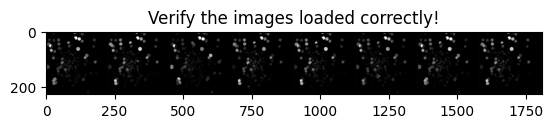

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 43.7038
new best train!
val Loss: 13.5425
new best val!

Epoch 1/34
----------
train Loss: 37.8253
new best train!
val Loss: 13.7964

Epoch 2/34
----------
train Loss: 32.3287
new best train!
val Loss: 13.8718

Epoch 3/34
----------
train Loss: 29.0388
new best train!
val Loss: 14.1906

Epoch 4/34
----------
train Loss: 25.3462
new best train!
val Loss: 14.4031

Epoch 5/34
----------
train Loss: 22.8637
new best train!
val Loss: 14.8359

Epoch 6/34
----------
train Loss: 21.3828
new best train!
val Loss: 15.8726

Epoch 7/34
----------
train Loss: 20.0072
new best train!
val Loss: 16.5672

Epoch 8/34
----------
train Loss: 19.3665
new best train!
val Loss: 17.3381

Epoch 9/34
----------
train Loss: 19.0893
new best train!
val Loss: 17.7691

Epoch 10/34
----------
train Loss: 18.9495
new best train!
val Loss: 17.8769

Epoch 11/34
----------
train Loss: 18.7392
new best train!
val Loss: 17.8898

Epoch 12/34
----------
train Loss: 18.6878
new best train!
val Loss: 17.8771

Epoc

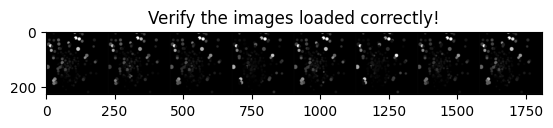

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 43.6208
new best train!
val Loss: 13.3264
new best val!

Epoch 1/34
----------
train Loss: 37.5665
new best train!
val Loss: 13.4526

Epoch 2/34
----------
train Loss: 33.4121
new best train!
val Loss: 13.5549

Epoch 3/34
----------
train Loss: 28.6723
new best train!
val Loss: 13.6756

Epoch 4/34
----------
train Loss: 24.8873
new best train!
val Loss: 13.8241

Epoch 5/34
----------
train Loss: 21.8410
new best train!
val Loss: 13.9903

Epoch 6/34
----------
train Loss: 20.8868
new best train!
val Loss: 14.4033

Epoch 7/34
----------
train Loss: 20.0430
new best train!
val Loss: 14.5684

Epoch 8/34
----------
train Loss: 19.9755
new best train!
val Loss: 15.1912

Epoch 9/34
----------
train Loss: 19.1674
new best train!
val Loss: 15.7580

Epoch 10/34
----------
train Loss: 18.8250
new best train!
val Loss: 15.4097

Epoch 11/34
----------
train Loss: 18.7908
new best train!
val Loss: 15.9414

Epoch 12/34
----------
train Loss: 18.6512
new best train!
val Loss: 16.9189

Epoc

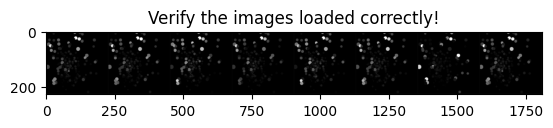

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 41.0279
new best train!
val Loss: 13.8710
new best val!

Epoch 1/34
----------
train Loss: 33.9966
new best train!
val Loss: 14.2540

Epoch 2/34
----------
train Loss: 28.5584
new best train!
val Loss: 14.3926

Epoch 3/34
----------
train Loss: 24.1599
new best train!
val Loss: 14.0915

Epoch 4/34
----------
train Loss: 21.7731
new best train!
val Loss: 14.8368

Epoch 5/34
----------
train Loss: 21.0407
new best train!
val Loss: 14.7190

Epoch 6/34
----------
train Loss: 19.4769
new best train!
val Loss: 15.4475

Epoch 7/34
----------
train Loss: 18.8411
new best train!
val Loss: 16.4243

Epoch 8/34
----------
train Loss: 18.7556
new best train!
val Loss: 16.7315

Epoch 9/34
----------
train Loss: 18.6378
new best train!
val Loss: 16.8005

Epoch 10/34
----------
train Loss: 18.5543
new best train!
val Loss: 16.8896

Epoch 11/34
----------
train Loss: 18.5510
new best train!
val Loss: 16.9884

Epoch 12/34
----------
train Loss: 18.5317
new best train!
val Loss: 17.0759

Epoc

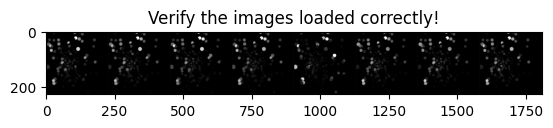

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 40.8780
new best train!
val Loss: 13.5066
new best val!

Epoch 1/34
----------
train Loss: 35.1575
new best train!
val Loss: 13.4286
new best val!

Epoch 2/34
----------
train Loss: 31.8375
new best train!
val Loss: 13.5169

Epoch 3/34
----------
train Loss: 27.4118
new best train!
val Loss: 13.6901

Epoch 4/34
----------
train Loss: 24.6365
new best train!
val Loss: 13.9306

Epoch 5/34
----------
train Loss: 21.9453
new best train!
val Loss: 13.8157

Epoch 6/34
----------
train Loss: 20.5966
new best train!
val Loss: 14.4198

Epoch 7/34
----------
train Loss: 20.3235
new best train!
val Loss: 13.7479

Epoch 8/34
----------
train Loss: 19.3477
new best train!
val Loss: 13.5921

Epoch 9/34
----------
train Loss: 19.3472
new best train!
val Loss: 13.9425

Epoch 10/34
----------
train Loss: 18.6770
new best train!
val Loss: 14.2055

Epoch 11/34
----------
train Loss: 18.5917
new best train!
val Loss: 14.4991

Epoch 12/34
----------
train Loss: 18.5862
new best train!
val Loss:

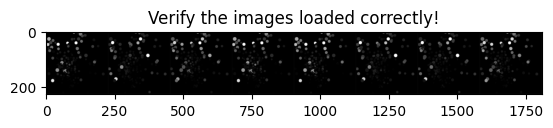

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 43.7493
new best train!
val Loss: 10.3146
new best val!

Epoch 1/34
----------
train Loss: 39.6285
new best train!
val Loss: 10.5092

Epoch 2/34
----------
train Loss: 37.0873
new best train!
val Loss: 10.8050

Epoch 3/34
----------
train Loss: 33.8298
new best train!
val Loss: 10.7856

Epoch 4/34
----------
train Loss: 30.0462
new best train!
val Loss: 10.7838

Epoch 5/34
----------
train Loss: 26.5665
new best train!
val Loss: 10.7984

Epoch 6/34
----------
train Loss: 23.8730
new best train!
val Loss: 10.9159

Epoch 7/34
----------
train Loss: 22.0703
new best train!
val Loss: 11.0873

Epoch 8/34
----------
train Loss: 21.2148
new best train!
val Loss: 11.3072

Epoch 9/34
----------
train Loss: 20.6551
new best train!
val Loss: 11.5398

Epoch 10/34
----------
train Loss: 20.4541
new best train!
val Loss: 11.6106

Epoch 11/34
----------
train Loss: 20.2353
new best train!
val Loss: 11.5995

Epoch 12/34
----------
train Loss: 20.2126
new best train!
val Loss: 11.6361

Epoc

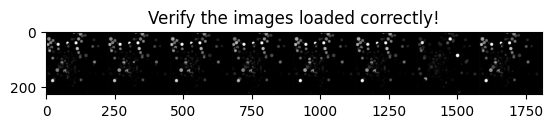

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 43.9498
new best train!
val Loss: 11.1087
new best val!

Epoch 1/34
----------
train Loss: 39.3824
new best train!
val Loss: 11.0175
new best val!

Epoch 2/34
----------
train Loss: 36.0675
new best train!
val Loss: 10.8925
new best val!

Epoch 3/34
----------
train Loss: 33.3756
new best train!
val Loss: 10.6658
new best val!

Epoch 4/34
----------
train Loss: 29.6107
new best train!
val Loss: 10.5512
new best val!

Epoch 5/34
----------
train Loss: 26.3554
new best train!
val Loss: 10.5811

Epoch 6/34
----------
train Loss: 24.0712
new best train!
val Loss: 10.6722

Epoch 7/34
----------
train Loss: 22.3776
new best train!
val Loss: 10.9063

Epoch 8/34
----------
train Loss: 21.5539
new best train!
val Loss: 11.0517

Epoch 9/34
----------
train Loss: 20.8456
new best train!
val Loss: 11.0909

Epoch 10/34
----------
train Loss: 20.6097
new best train!
val Loss: 11.1716

Epoch 11/34
----------
train Loss: 20.2895
new best train!
val Loss: 11.3390

Epoch 12/34
----------
tra

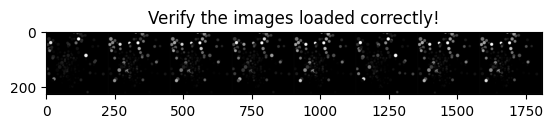

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 43.6130
new best train!
val Loss: 10.1417
new best val!

Epoch 1/34
----------
train Loss: 39.9982
new best train!
val Loss: 10.1545

Epoch 2/34
----------
train Loss: 36.5858
new best train!
val Loss: 10.1773

Epoch 3/34
----------
train Loss: 32.4916
new best train!
val Loss: 10.2073

Epoch 4/34
----------
train Loss: 28.8359
new best train!
val Loss: 10.2010

Epoch 5/34
----------
train Loss: 25.7098
new best train!
val Loss: 10.2181

Epoch 6/34
----------
train Loss: 24.2686
new best train!
val Loss: 10.3179

Epoch 7/34
----------
train Loss: 21.8659
new best train!
val Loss: 10.4110

Epoch 8/34
----------
train Loss: 21.1121
new best train!
val Loss: 10.4451

Epoch 9/34
----------
train Loss: 20.6926
new best train!
val Loss: 10.6753

Epoch 10/34
----------
train Loss: 20.5736
new best train!
val Loss: 10.6701

Epoch 11/34
----------
train Loss: 20.2240
new best train!
val Loss: 10.5169

Epoch 12/34
----------
train Loss: 20.2743
val Loss: 10.5747

Epoch 13/34
--------

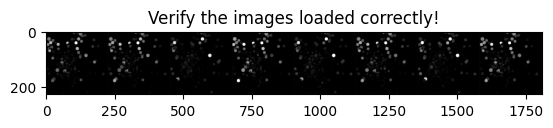

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 44.7087
new best train!
val Loss: 10.4340
new best val!

Epoch 1/34
----------
train Loss: 39.8366
new best train!
val Loss: 10.6276

Epoch 2/34
----------
train Loss: 37.0946
new best train!
val Loss: 10.8765

Epoch 3/34
----------
train Loss: 34.2289
new best train!
val Loss: 10.9801

Epoch 4/34
----------
train Loss: 30.0716
new best train!
val Loss: 11.0965

Epoch 5/34
----------
train Loss: 27.6615
new best train!
val Loss: 11.3549

Epoch 6/34
----------
train Loss: 24.2085
new best train!
val Loss: 11.4834

Epoch 7/34
----------
train Loss: 22.1541
new best train!
val Loss: 11.4948

Epoch 8/34
----------
train Loss: 22.0140
new best train!
val Loss: 11.3584

Epoch 9/34
----------
train Loss: 20.5894
new best train!
val Loss: 11.2893

Epoch 10/34
----------
train Loss: 20.4138
new best train!
val Loss: 11.2186

Epoch 11/34
----------
train Loss: 20.2889
new best train!
val Loss: 11.2426

Epoch 12/34
----------
train Loss: 20.1774
new best train!
val Loss: 11.4033

Epoc

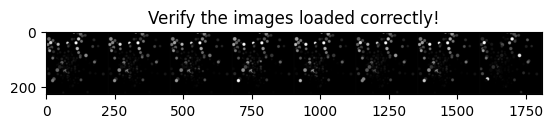

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 43.3231
new best train!
val Loss: 11.2667
new best val!

Epoch 1/34
----------
train Loss: 40.3515
new best train!
val Loss: 11.1789
new best val!

Epoch 2/34
----------
train Loss: 37.2182
new best train!
val Loss: 11.0789
new best val!

Epoch 3/34
----------
train Loss: 33.6422
new best train!
val Loss: 11.0370
new best val!

Epoch 4/34
----------
train Loss: 29.1067
new best train!
val Loss: 11.1906

Epoch 5/34
----------
train Loss: 25.3104
new best train!
val Loss: 11.2607

Epoch 6/34
----------
train Loss: 23.2233
new best train!
val Loss: 11.5163

Epoch 7/34
----------
train Loss: 21.4509
new best train!
val Loss: 11.6524

Epoch 8/34
----------
train Loss: 20.7859
new best train!
val Loss: 11.7356

Epoch 9/34
----------
train Loss: 20.3804
new best train!
val Loss: 11.9275

Epoch 10/34
----------
train Loss: 20.3707
new best train!
val Loss: 12.1997

Epoch 11/34
----------
train Loss: 20.2164
new best train!
val Loss: 12.4233

Epoch 12/34
----------
train Loss: 20.14

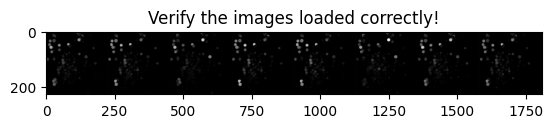

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 33.4209
new best train!
val Loss: 10.2299
new best val!

Epoch 1/34
----------
train Loss: 28.0307
new best train!
val Loss: 10.3419

Epoch 2/34
----------
train Loss: 25.8486
new best train!
val Loss: 10.3211

Epoch 3/34
----------
train Loss: 21.6106
new best train!
val Loss: 10.1843
new best val!

Epoch 4/34
----------
train Loss: 20.1852
new best train!
val Loss: 9.9633
new best val!

Epoch 5/34
----------
train Loss: 17.7350
new best train!
val Loss: 9.9134
new best val!

Epoch 6/34
----------
train Loss: 16.1627
new best train!
val Loss: 9.3867
new best val!

Epoch 7/34
----------
train Loss: 16.7001
val Loss: 9.5192

Epoch 8/34
----------
train Loss: 15.9636
new best train!
val Loss: 9.8228

Epoch 9/34
----------
train Loss: 15.3241
new best train!
val Loss: 9.9417

Epoch 10/34
----------
train Loss: 15.4429
val Loss: 9.7155

Epoch 11/34
----------
train Loss: 15.6223
val Loss: 10.0576

Epoch 12/34
----------
train Loss: 15.0205
new best train!
val Loss: 10.2907

Epo

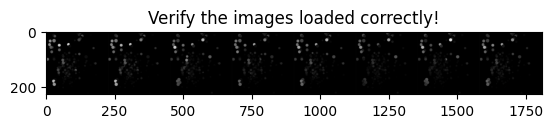

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 33.2936
new best train!
val Loss: 9.8336
new best val!

Epoch 1/34
----------
train Loss: 27.9162
new best train!
val Loss: 9.6941
new best val!

Epoch 2/34
----------
train Loss: 25.0773
new best train!
val Loss: 9.8272

Epoch 3/34
----------
train Loss: 20.6882
new best train!
val Loss: 10.0104

Epoch 4/34
----------
train Loss: 17.9171
new best train!
val Loss: 10.4935

Epoch 5/34
----------
train Loss: 16.6012
new best train!
val Loss: 10.6482

Epoch 6/34
----------
train Loss: 15.3935
new best train!
val Loss: 10.7693

Epoch 7/34
----------
train Loss: 15.0875
new best train!
val Loss: 11.2052

Epoch 8/34
----------
train Loss: 14.8449
new best train!
val Loss: 11.4355

Epoch 9/34
----------
train Loss: 14.7775
new best train!
val Loss: 11.3394

Epoch 10/34
----------
train Loss: 14.7594
new best train!
val Loss: 11.9827

Epoch 11/34
----------
train Loss: 14.7061
new best train!
val Loss: 13.0605

Epoch 12/34
----------
train Loss: 14.6821
new best train!
val Loss: 13

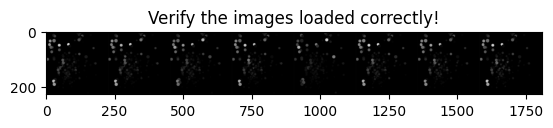

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 32.8904
new best train!
val Loss: 11.3476
new best val!

Epoch 1/34
----------
train Loss: 26.2890
new best train!
val Loss: 10.7389
new best val!

Epoch 2/34
----------
train Loss: 23.7888
new best train!
val Loss: 10.8722

Epoch 3/34
----------
train Loss: 20.2584
new best train!
val Loss: 11.1394

Epoch 4/34
----------
train Loss: 19.7166
new best train!
val Loss: 11.8490

Epoch 5/34
----------
train Loss: 18.2770
new best train!
val Loss: 11.5870

Epoch 6/34
----------
train Loss: 17.0079
new best train!
val Loss: 12.9410

Epoch 7/34
----------
train Loss: 15.9087
new best train!
val Loss: 14.3060

Epoch 8/34
----------
train Loss: 15.4794
new best train!
val Loss: 14.1100

Epoch 9/34
----------
train Loss: 16.2717
val Loss: 14.3424

Epoch 10/34
----------
train Loss: 15.0967
new best train!
val Loss: 14.2876

Epoch 11/34
----------
train Loss: 14.9512
new best train!
val Loss: 13.6276

Epoch 12/34
----------
train Loss: 15.2212
val Loss: 12.6894

Epoch 13/34
----------

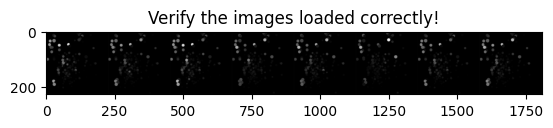

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 34.4246
new best train!
val Loss: 10.2132
new best val!

Epoch 1/34
----------
train Loss: 27.6298
new best train!
val Loss: 9.9802
new best val!

Epoch 2/34
----------
train Loss: 25.0780
new best train!
val Loss: 10.0337

Epoch 3/34
----------
train Loss: 22.5837
new best train!
val Loss: 9.9784
new best val!

Epoch 4/34
----------
train Loss: 19.7779
new best train!
val Loss: 9.8894
new best val!

Epoch 5/34
----------
train Loss: 19.0181
new best train!
val Loss: 9.9119

Epoch 6/34
----------
train Loss: 17.1578
new best train!
val Loss: 9.6199
new best val!

Epoch 7/34
----------
train Loss: 16.5264
new best train!
val Loss: 9.4292
new best val!

Epoch 8/34
----------
train Loss: 15.5261
new best train!
val Loss: 9.6687

Epoch 9/34
----------
train Loss: 15.1053
new best train!
val Loss: 9.7213

Epoch 10/34
----------
train Loss: 15.1410
val Loss: 9.5362

Epoch 11/34
----------
train Loss: 14.8551
new best train!
val Loss: 9.3681
new best val!

Epoch 12/34
----------
t

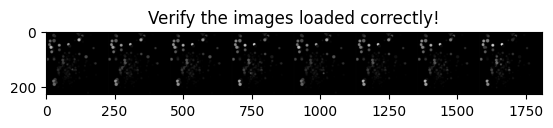

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 33.0443
new best train!
val Loss: 10.1852
new best val!

Epoch 1/34
----------
train Loss: 27.3800
new best train!
val Loss: 10.5047

Epoch 2/34
----------
train Loss: 23.4755
new best train!
val Loss: 11.2929

Epoch 3/34
----------
train Loss: 19.3490
new best train!
val Loss: 11.9917

Epoch 4/34
----------
train Loss: 17.5926
new best train!
val Loss: 12.6019

Epoch 5/34
----------
train Loss: 17.8378
val Loss: 12.6063

Epoch 6/34
----------
train Loss: 16.2741
new best train!
val Loss: 11.9098

Epoch 7/34
----------
train Loss: 15.3919
new best train!
val Loss: 11.7277

Epoch 8/34
----------
train Loss: 15.2736
new best train!
val Loss: 12.6773

Epoch 9/34
----------
train Loss: 15.1809
new best train!
val Loss: 11.9156

Epoch 10/34
----------
train Loss: 15.1782
new best train!
val Loss: 10.9531

Epoch 11/34
----------
train Loss: 15.4026
val Loss: 11.8508

Epoch 12/34
----------
train Loss: 15.1646
new best train!
val Loss: 14.0288

Epoch 13/34
----------
train Loss: 1

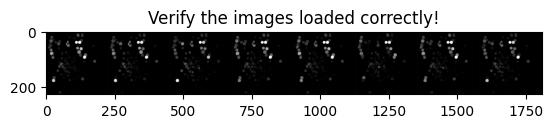

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 42.9275
new best train!
val Loss: 9.0976
new best val!

Epoch 1/34
----------
train Loss: 35.3061
new best train!
val Loss: 9.0986

Epoch 2/34
----------
train Loss: 29.3185
new best train!
val Loss: 9.1585

Epoch 3/34
----------
train Loss: 24.4734
new best train!
val Loss: 9.2071

Epoch 4/34
----------
train Loss: 21.9276
new best train!
val Loss: 9.2249

Epoch 5/34
----------
train Loss: 20.3066
new best train!
val Loss: 9.2390

Epoch 6/34
----------
train Loss: 19.3347
new best train!
val Loss: 9.2062

Epoch 7/34
----------
train Loss: 19.1188
new best train!
val Loss: 9.2036

Epoch 8/34
----------
train Loss: 18.8309
new best train!
val Loss: 9.2314

Epoch 9/34
----------
train Loss: 18.8093
new best train!
val Loss: 9.2575

Epoch 10/34
----------
train Loss: 18.7539
new best train!
val Loss: 9.2855

Epoch 11/34
----------
train Loss: 18.6930
new best train!
val Loss: 9.3050

Epoch 12/34
----------
train Loss: 18.6858
new best train!
val Loss: 9.3089

Epoch 13/34
-----

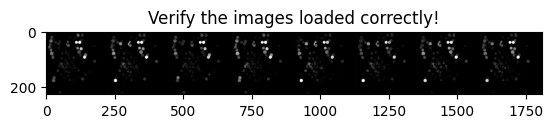

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 41.9112
new best train!
val Loss: 9.1190
new best val!

Epoch 1/34
----------
train Loss: 35.8731
new best train!
val Loss: 9.1900

Epoch 2/34
----------
train Loss: 30.4194
new best train!
val Loss: 9.1700

Epoch 3/34
----------
train Loss: 26.9141
new best train!
val Loss: 9.1098
new best val!

Epoch 4/34
----------
train Loss: 24.2919
new best train!
val Loss: 9.0326
new best val!

Epoch 5/34
----------
train Loss: 20.9461
new best train!
val Loss: 8.9875
new best val!

Epoch 6/34
----------
train Loss: 20.1140
new best train!
val Loss: 8.9613
new best val!

Epoch 7/34
----------
train Loss: 19.4554
new best train!
val Loss: 9.0249

Epoch 8/34
----------
train Loss: 19.1690
new best train!
val Loss: 9.0836

Epoch 9/34
----------
train Loss: 18.9360
new best train!
val Loss: 9.1370

Epoch 10/34
----------
train Loss: 18.7867
new best train!
val Loss: 9.1764

Epoch 11/34
----------
train Loss: 18.7880
val Loss: 9.1899

Epoch 12/34
----------
train Loss: 18.7276
new best tr

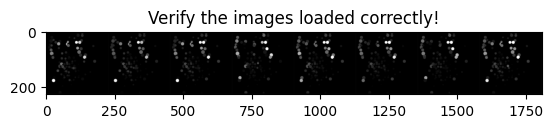

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 44.2625
new best train!
val Loss: 9.8960
new best val!

Epoch 1/34
----------
train Loss: 38.9282
new best train!
val Loss: 9.7745
new best val!

Epoch 2/34
----------
train Loss: 33.7752
new best train!
val Loss: 9.4382
new best val!

Epoch 3/34
----------
train Loss: 29.4951
new best train!
val Loss: 9.1818
new best val!

Epoch 4/34
----------
train Loss: 26.5383
new best train!
val Loss: 8.7955
new best val!

Epoch 5/34
----------
train Loss: 23.4819
new best train!
val Loss: 8.4589
new best val!

Epoch 6/34
----------
train Loss: 21.4590
new best train!
val Loss: 8.3382
new best val!

Epoch 7/34
----------
train Loss: 20.1627
new best train!
val Loss: 8.2884
new best val!

Epoch 8/34
----------
train Loss: 19.3900
new best train!
val Loss: 8.3180

Epoch 9/34
----------
train Loss: 19.0798
new best train!
val Loss: 8.3859

Epoch 10/34
----------
train Loss: 18.9019
new best train!
val Loss: 8.4918

Epoch 11/34
----------
train Loss: 18.8533
new best train!
val Loss: 8.60

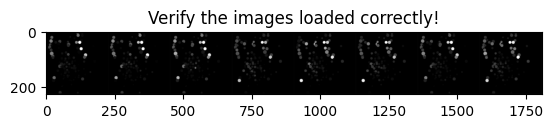

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 42.5907
new best train!
val Loss: 9.5321
new best val!

Epoch 1/34
----------
train Loss: 36.2330
new best train!
val Loss: 9.6731

Epoch 2/34
----------
train Loss: 29.1323
new best train!
val Loss: 9.5343

Epoch 3/34
----------
train Loss: 25.6290
new best train!
val Loss: 9.4055
new best val!

Epoch 4/34
----------
train Loss: 23.2057
new best train!
val Loss: 9.0806
new best val!

Epoch 5/34
----------
train Loss: 21.8615
new best train!
val Loss: 8.9207
new best val!

Epoch 6/34
----------
train Loss: 19.6083
new best train!
val Loss: 8.9379

Epoch 7/34
----------
train Loss: 19.4218
new best train!
val Loss: 9.0406

Epoch 8/34
----------
train Loss: 18.9848
new best train!
val Loss: 9.1258

Epoch 9/34
----------
train Loss: 18.8335
new best train!
val Loss: 9.1854

Epoch 10/34
----------
train Loss: 18.8779
val Loss: 9.2345

Epoch 11/34
----------
train Loss: 18.7210
new best train!
val Loss: 9.2723

Epoch 12/34
----------
train Loss: 18.7238
val Loss: 9.2970

Epoch 1

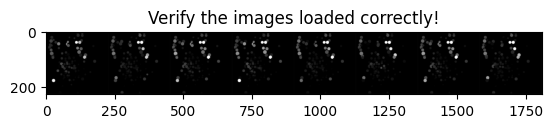

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 42.5127
new best train!
val Loss: 9.1217
new best val!

Epoch 1/34
----------
train Loss: 35.8510
new best train!
val Loss: 9.0061
new best val!

Epoch 2/34
----------
train Loss: 30.6408
new best train!
val Loss: 8.8805
new best val!

Epoch 3/34
----------
train Loss: 25.5555
new best train!
val Loss: 8.8834

Epoch 4/34
----------
train Loss: 22.3002
new best train!
val Loss: 8.9558

Epoch 5/34
----------
train Loss: 20.4814
new best train!
val Loss: 9.0384

Epoch 6/34
----------
train Loss: 19.4852
new best train!
val Loss: 9.1177

Epoch 7/34
----------
train Loss: 19.0214
new best train!
val Loss: 9.1720

Epoch 8/34
----------
train Loss: 18.9035
new best train!
val Loss: 9.2132

Epoch 9/34
----------
train Loss: 18.7710
new best train!
val Loss: 9.2471

Epoch 10/34
----------
train Loss: 18.7238
new best train!
val Loss: 9.2783

Epoch 11/34
----------
train Loss: 18.7282
val Loss: 9.3132

Epoch 12/34
----------
train Loss: 18.7199
new best train!
val Loss: 9.3348

Epoch

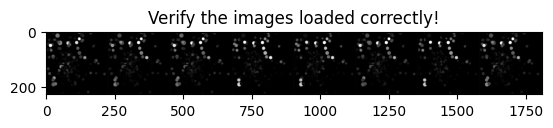

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.4848
new best train!
val Loss: 11.5177
new best val!

Epoch 1/34
----------
train Loss: 31.3716
new best train!
val Loss: 11.4765
new best val!

Epoch 2/34
----------
train Loss: 29.6204
new best train!
val Loss: 11.4590
new best val!

Epoch 3/34
----------
train Loss: 25.9963
new best train!
val Loss: 11.5180

Epoch 4/34
----------
train Loss: 23.0034
new best train!
val Loss: 11.1716
new best val!

Epoch 5/34
----------
train Loss: 21.0592
new best train!
val Loss: 11.1562
new best val!

Epoch 6/34
----------
train Loss: 21.4582
val Loss: 10.8681
new best val!

Epoch 7/34
----------
train Loss: 17.9388
new best train!
val Loss: 10.5413
new best val!

Epoch 8/34
----------
train Loss: 17.7206
new best train!
val Loss: 10.3728
new best val!

Epoch 9/34
----------
train Loss: 17.1646
new best train!
val Loss: 10.0666
new best val!

Epoch 10/34
----------
train Loss: 18.5252
val Loss: 9.8855
new best val!

Epoch 11/34
----------
train Loss: 17.1268
new best train!
val Loss

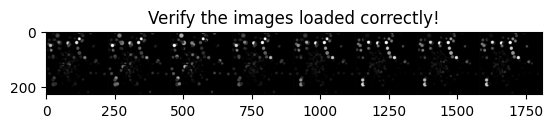

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 37.1324
new best train!
val Loss: 11.5976
new best val!

Epoch 1/34
----------
train Loss: 32.0792
new best train!
val Loss: 11.5358
new best val!

Epoch 2/34
----------
train Loss: 27.5896
new best train!
val Loss: 11.5442

Epoch 3/34
----------
train Loss: 24.9496
new best train!
val Loss: 11.4843
new best val!

Epoch 4/34
----------
train Loss: 21.1152
new best train!
val Loss: 11.6446

Epoch 5/34
----------
train Loss: 20.1977
new best train!
val Loss: 11.4859

Epoch 6/34
----------
train Loss: 17.8958
new best train!
val Loss: 12.0545

Epoch 7/34
----------
train Loss: 18.6412
val Loss: 11.3172
new best val!

Epoch 8/34
----------
train Loss: 17.4695
new best train!
val Loss: 11.4011

Epoch 9/34
----------
train Loss: 16.2298
new best train!
val Loss: 12.6885

Epoch 10/34
----------
train Loss: 16.9528
val Loss: 11.9085

Epoch 11/34
----------
train Loss: 17.0475
val Loss: 11.5014

Epoch 12/34
----------
train Loss: 16.0472
new best train!
val Loss: 11.9555

Epoch 13/3

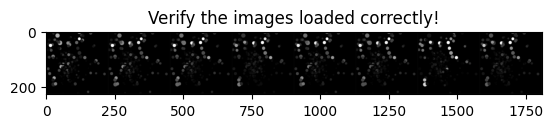

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 37.7086
new best train!
val Loss: 12.5516
new best val!

Epoch 1/34
----------
train Loss: 32.4320
new best train!
val Loss: 12.0526
new best val!

Epoch 2/34
----------
train Loss: 27.5506
new best train!
val Loss: 11.5242
new best val!

Epoch 3/34
----------
train Loss: 23.4501
new best train!
val Loss: 11.4921
new best val!

Epoch 4/34
----------
train Loss: 20.8275
new best train!
val Loss: 11.4167
new best val!

Epoch 5/34
----------
train Loss: 18.0559
new best train!
val Loss: 11.0174
new best val!

Epoch 6/34
----------
train Loss: 17.9514
new best train!
val Loss: 10.7509
new best val!

Epoch 7/34
----------
train Loss: 17.7181
new best train!
val Loss: 10.3461
new best val!

Epoch 8/34
----------
train Loss: 17.6124
new best train!
val Loss: 10.8382

Epoch 9/34
----------
train Loss: 16.4514
new best train!
val Loss: 11.4074

Epoch 10/34
----------
train Loss: 16.7070
val Loss: 11.3368

Epoch 11/34
----------
train Loss: 16.5473
val Loss: 11.7236

Epoch 12/34
----

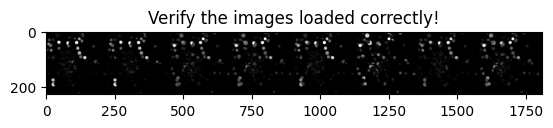

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 37.0361
new best train!
val Loss: 11.4542
new best val!

Epoch 1/34
----------
train Loss: 30.3554
new best train!
val Loss: 11.3063
new best val!

Epoch 2/34
----------
train Loss: 26.3846
new best train!
val Loss: 11.3445

Epoch 3/34
----------
train Loss: 25.8979
new best train!
val Loss: 11.5212

Epoch 4/34
----------
train Loss: 23.9101
new best train!
val Loss: 11.3382

Epoch 5/34
----------
train Loss: 20.6835
new best train!
val Loss: 11.2074
new best val!

Epoch 6/34
----------
train Loss: 18.3920
new best train!
val Loss: 11.9404

Epoch 7/34
----------
train Loss: 17.3447
new best train!
val Loss: 11.7799

Epoch 8/34
----------
train Loss: 17.0168
new best train!
val Loss: 11.5725

Epoch 9/34
----------
train Loss: 16.6237
new best train!
val Loss: 11.2380

Epoch 10/34
----------
train Loss: 16.3259
new best train!
val Loss: 12.1531

Epoch 11/34
----------
train Loss: 15.9732
new best train!
val Loss: 12.6503

Epoch 12/34
----------
train Loss: 16.2509
val Loss: 1

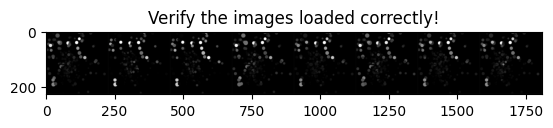

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.6319
new best train!
val Loss: 12.1601
new best val!

Epoch 1/34
----------
train Loss: 29.8687
new best train!
val Loss: 12.0572
new best val!

Epoch 2/34
----------
train Loss: 25.8917
new best train!
val Loss: 11.7595
new best val!

Epoch 3/34
----------
train Loss: 22.1402
new best train!
val Loss: 11.5590
new best val!

Epoch 4/34
----------
train Loss: 19.7401
new best train!
val Loss: 11.5551
new best val!

Epoch 5/34
----------
train Loss: 18.2452
new best train!
val Loss: 11.3496
new best val!

Epoch 6/34
----------
train Loss: 17.0483
new best train!
val Loss: 11.6079

Epoch 7/34
----------
train Loss: 16.7168
new best train!
val Loss: 11.6873

Epoch 8/34
----------
train Loss: 16.2360
new best train!
val Loss: 12.3424

Epoch 9/34
----------
train Loss: 15.9670
new best train!
val Loss: 12.9394

Epoch 10/34
----------
train Loss: 15.9910
val Loss: 12.4326

Epoch 11/34
----------
train Loss: 15.9081
new best train!
val Loss: 11.3071
new best val!

Epoch 12/34
--

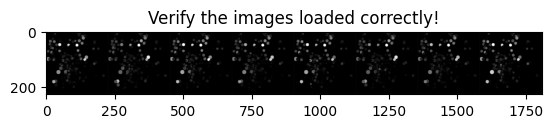

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 42.9095
new best train!
val Loss: 9.3987
new best val!

Epoch 1/34
----------
train Loss: 35.9314
new best train!
val Loss: 8.9925
new best val!

Epoch 2/34
----------
train Loss: 31.0655
new best train!
val Loss: 8.9288
new best val!

Epoch 3/34
----------
train Loss: 28.6376
new best train!
val Loss: 8.9969

Epoch 4/34
----------
train Loss: 26.7757
new best train!
val Loss: 9.0058

Epoch 5/34
----------
train Loss: 24.5569
new best train!
val Loss: 9.0854

Epoch 6/34
----------
train Loss: 23.3971
new best train!
val Loss: 9.1936

Epoch 7/34
----------
train Loss: 23.1190
new best train!
val Loss: 9.2583

Epoch 8/34
----------
train Loss: 22.1681
new best train!
val Loss: 9.3604

Epoch 9/34
----------
train Loss: 21.9048
new best train!
val Loss: 9.4533

Epoch 10/34
----------
train Loss: 21.2867
new best train!
val Loss: 9.6165

Epoch 11/34
----------
train Loss: 20.2536
new best train!
val Loss: 9.6092

Epoch 12/34
----------
train Loss: 20.9930
val Loss: 9.4814

Epoch

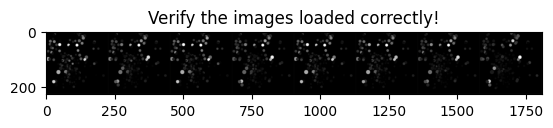

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 40.4796
new best train!
val Loss: 9.2252
new best val!

Epoch 1/34
----------
train Loss: 34.3657
new best train!
val Loss: 9.4604

Epoch 2/34
----------
train Loss: 30.6739
new best train!
val Loss: 9.6969

Epoch 3/34
----------
train Loss: 27.1915
new best train!
val Loss: 9.9769

Epoch 4/34
----------
train Loss: 23.9272
new best train!
val Loss: 10.2191

Epoch 5/34
----------
train Loss: 20.9807
new best train!
val Loss: 10.4727

Epoch 6/34
----------
train Loss: 19.8362
new best train!
val Loss: 10.6408

Epoch 7/34
----------
train Loss: 18.8819
new best train!
val Loss: 10.7681

Epoch 8/34
----------
train Loss: 18.5992
new best train!
val Loss: 10.8890

Epoch 9/34
----------
train Loss: 18.4039
new best train!
val Loss: 10.9574

Epoch 10/34
----------
train Loss: 18.3385
new best train!
val Loss: 10.9930

Epoch 11/34
----------
train Loss: 18.2934
new best train!
val Loss: 11.0020

Epoch 12/34
----------
train Loss: 18.2723
new best train!
val Loss: 10.9891

Epoch 13

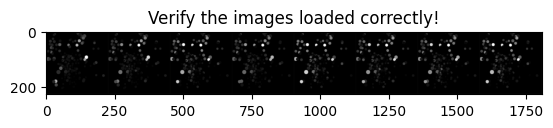

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 41.7011
new best train!
val Loss: 9.2321
new best val!

Epoch 1/34
----------
train Loss: 33.6655
new best train!
val Loss: 8.9426
new best val!

Epoch 2/34
----------
train Loss: 31.1392
new best train!
val Loss: 9.0619

Epoch 3/34
----------
train Loss: 27.3495
new best train!
val Loss: 9.1834

Epoch 4/34
----------
train Loss: 24.9769
new best train!
val Loss: 9.1994

Epoch 5/34
----------
train Loss: 22.7330
new best train!
val Loss: 9.2969

Epoch 6/34
----------
train Loss: 21.4950
new best train!
val Loss: 9.4405

Epoch 7/34
----------
train Loss: 19.9778
new best train!
val Loss: 9.2749

Epoch 8/34
----------
train Loss: 19.1157
new best train!
val Loss: 9.2993

Epoch 9/34
----------
train Loss: 18.6099
new best train!
val Loss: 9.1788

Epoch 10/34
----------
train Loss: 18.3901
new best train!
val Loss: 9.0890

Epoch 11/34
----------
train Loss: 18.3637
new best train!
val Loss: 9.2219

Epoch 12/34
----------
train Loss: 18.3047
new best train!
val Loss: 9.3757

Epo

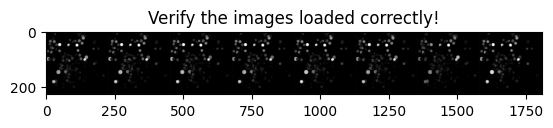

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 40.6849
new best train!
val Loss: 9.7019
new best val!

Epoch 1/34
----------
train Loss: 33.5096
new best train!
val Loss: 10.2585

Epoch 2/34
----------
train Loss: 32.2717
new best train!
val Loss: 10.3523

Epoch 3/34
----------
train Loss: 28.6649
new best train!
val Loss: 10.3490

Epoch 4/34
----------
train Loss: 25.6654
new best train!
val Loss: 10.3464

Epoch 5/34
----------
train Loss: 24.1324
new best train!
val Loss: 10.4560

Epoch 6/34
----------
train Loss: 20.6785
new best train!
val Loss: 10.5092

Epoch 7/34
----------
train Loss: 19.4008
new best train!
val Loss: 10.5924

Epoch 8/34
----------
train Loss: 18.8671
new best train!
val Loss: 10.6908

Epoch 9/34
----------
train Loss: 18.5912
new best train!
val Loss: 10.7652

Epoch 10/34
----------
train Loss: 18.4326
new best train!
val Loss: 10.8465

Epoch 11/34
----------
train Loss: 18.3659
new best train!
val Loss: 10.8940

Epoch 12/34
----------
train Loss: 18.2733
new best train!
val Loss: 10.9036

Epoch

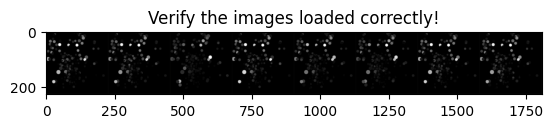

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 40.9731
new best train!
val Loss: 8.9832
new best val!

Epoch 1/34
----------
train Loss: 34.7971
new best train!
val Loss: 8.9165
new best val!

Epoch 2/34
----------
train Loss: 30.4659
new best train!
val Loss: 8.9121
new best val!

Epoch 3/34
----------
train Loss: 26.8561
new best train!
val Loss: 9.1280

Epoch 4/34
----------
train Loss: 23.1461
new best train!
val Loss: 9.2439

Epoch 5/34
----------
train Loss: 20.8355
new best train!
val Loss: 9.3405

Epoch 6/34
----------
train Loss: 20.2275
new best train!
val Loss: 9.1182

Epoch 7/34
----------
train Loss: 18.8322
new best train!
val Loss: 8.8837
new best val!

Epoch 8/34
----------
train Loss: 18.5452
new best train!
val Loss: 8.7751
new best val!

Epoch 9/34
----------
train Loss: 18.4213
new best train!
val Loss: 8.7496
new best val!

Epoch 10/34
----------
train Loss: 18.2911
new best train!
val Loss: 8.8881

Epoch 11/34
----------
train Loss: 18.2572
new best train!
val Loss: 8.9313

Epoch 12/34
----------
t

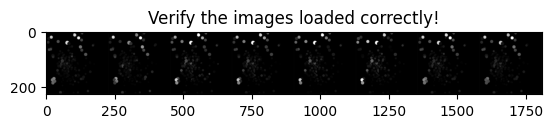

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.2270
new best train!
val Loss: 12.3391
new best val!

Epoch 1/34
----------
train Loss: 30.2082
new best train!
val Loss: 12.1757
new best val!

Epoch 2/34
----------
train Loss: 25.7551
new best train!
val Loss: 12.1333
new best val!

Epoch 3/34
----------
train Loss: 23.2298
new best train!
val Loss: 11.7793
new best val!

Epoch 4/34
----------
train Loss: 24.3276
val Loss: 11.4046
new best val!

Epoch 5/34
----------
train Loss: 21.2468
new best train!
val Loss: 11.4274

Epoch 6/34
----------
train Loss: 20.5612
new best train!
val Loss: 10.7545
new best val!

Epoch 7/34
----------
train Loss: 19.1333
new best train!
val Loss: 10.2432
new best val!

Epoch 8/34
----------
train Loss: 19.0522
new best train!
val Loss: 9.4293
new best val!

Epoch 9/34
----------
train Loss: 17.3278
new best train!
val Loss: 9.3911
new best val!

Epoch 10/34
----------
train Loss: 16.7256
new best train!
val Loss: 10.1333

Epoch 11/34
----------
train Loss: 15.7655
new best train!
val Los

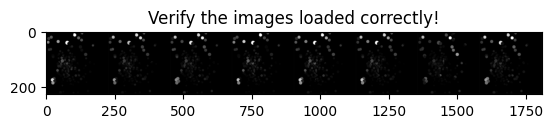

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 30.7976
new best train!
val Loss: 10.6002
new best val!

Epoch 1/34
----------
train Loss: 26.0289
new best train!
val Loss: 10.6556

Epoch 2/34
----------
train Loss: 24.3215
new best train!
val Loss: 10.7284

Epoch 3/34
----------
train Loss: 22.8990
new best train!
val Loss: 10.8441

Epoch 4/34
----------
train Loss: 20.7654
new best train!
val Loss: 11.1013

Epoch 5/34
----------
train Loss: 18.3349
new best train!
val Loss: 10.7033

Epoch 6/34
----------
train Loss: 17.9876
new best train!
val Loss: 10.4614
new best val!

Epoch 7/34
----------
train Loss: 18.6503
val Loss: 9.8249
new best val!

Epoch 8/34
----------
train Loss: 17.1881
new best train!
val Loss: 9.6868
new best val!

Epoch 9/34
----------
train Loss: 17.1820
new best train!
val Loss: 10.1628

Epoch 10/34
----------
train Loss: 16.2836
new best train!
val Loss: 10.4520

Epoch 11/34
----------
train Loss: 16.0670
new best train!
val Loss: 10.8805

Epoch 12/34
----------
train Loss: 17.4214
val Loss: 10.33

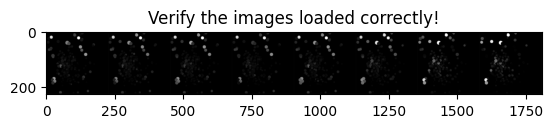

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 30.6465
new best train!
val Loss: 9.9687
new best val!

Epoch 1/34
----------
train Loss: 25.1896
new best train!
val Loss: 9.9689

Epoch 2/34
----------
train Loss: 25.1168
new best train!
val Loss: 9.6701
new best val!

Epoch 3/34
----------
train Loss: 22.1548
new best train!
val Loss: 9.6073
new best val!

Epoch 4/34
----------
train Loss: 20.7927
new best train!
val Loss: 9.7214

Epoch 5/34
----------
train Loss: 19.4452
new best train!
val Loss: 9.8433

Epoch 6/34
----------
train Loss: 17.5433
new best train!
val Loss: 9.7771

Epoch 7/34
----------
train Loss: 16.9541
new best train!
val Loss: 9.3996
new best val!

Epoch 8/34
----------
train Loss: 17.5160
val Loss: 9.4250

Epoch 9/34
----------
train Loss: 16.8347
new best train!
val Loss: 9.7772

Epoch 10/34
----------
train Loss: 16.3734
new best train!
val Loss: 10.1725

Epoch 11/34
----------
train Loss: 15.7804
new best train!
val Loss: 10.4347

Epoch 12/34
----------
train Loss: 16.6762
val Loss: 10.1847

Epoc

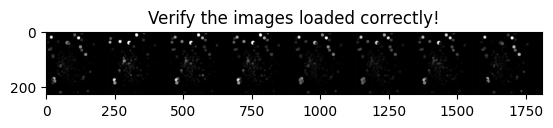

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 30.1738
new best train!
val Loss: 10.9153
new best val!

Epoch 1/34
----------
train Loss: 25.6031
new best train!
val Loss: 11.0320

Epoch 2/34
----------
train Loss: 22.9617
new best train!
val Loss: 11.4679

Epoch 3/34
----------
train Loss: 21.9383
new best train!
val Loss: 11.7043

Epoch 4/34
----------
train Loss: 19.7155
new best train!
val Loss: 11.7162

Epoch 5/34
----------
train Loss: 18.3426
new best train!
val Loss: 11.9761

Epoch 6/34
----------
train Loss: 18.5044
val Loss: 10.8712
new best val!

Epoch 7/34
----------
train Loss: 16.3423
new best train!
val Loss: 9.9916
new best val!

Epoch 8/34
----------
train Loss: 18.0301
val Loss: 9.6187
new best val!

Epoch 9/34
----------
train Loss: 15.7991
new best train!
val Loss: 10.5882

Epoch 10/34
----------
train Loss: 16.9362
val Loss: 12.4215

Epoch 11/34
----------
train Loss: 16.1273
val Loss: 12.1780

Epoch 12/34
----------
train Loss: 16.0803
val Loss: 10.8257

Epoch 13/34
----------
train Loss: 16.2243
v

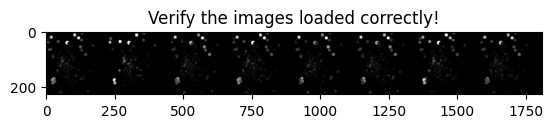

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 33.0367
new best train!
val Loss: 10.3907
new best val!

Epoch 1/34
----------
train Loss: 27.2832
new best train!
val Loss: 10.3548
new best val!

Epoch 2/34
----------
train Loss: 25.0968
new best train!
val Loss: 9.9058
new best val!

Epoch 3/34
----------
train Loss: 23.1512
new best train!
val Loss: 9.6175
new best val!

Epoch 4/34
----------
train Loss: 21.2883
new best train!
val Loss: 9.5003
new best val!

Epoch 5/34
----------
train Loss: 20.0643
new best train!
val Loss: 9.3692
new best val!

Epoch 6/34
----------
train Loss: 19.8308
new best train!
val Loss: 9.2256
new best val!

Epoch 7/34
----------
train Loss: 18.4115
new best train!
val Loss: 9.3609

Epoch 8/34
----------
train Loss: 17.9088
new best train!
val Loss: 9.4558

Epoch 9/34
----------
train Loss: 15.9595
new best train!
val Loss: 9.6832

Epoch 10/34
----------
train Loss: 15.7873
new best train!
val Loss: 10.0388

Epoch 11/34
----------
train Loss: 15.1059
new best train!
val Loss: 9.6673

Epoch 1

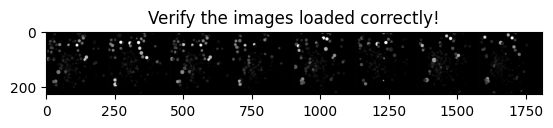

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 45.3457
new best train!
val Loss: 38.8881
new best val!

Epoch 1/34
----------
train Loss: 41.7376
new best train!
val Loss: 38.5005
new best val!

Epoch 2/34
----------
train Loss: 38.9281
new best train!
val Loss: 40.2381

Epoch 3/34
----------
train Loss: 36.7393
new best train!
val Loss: 38.4340
new best val!

Epoch 4/34
----------
train Loss: 34.2194
new best train!
val Loss: 40.9488

Epoch 5/34
----------
train Loss: 30.3354
new best train!
val Loss: 40.2790

Epoch 6/34
----------
train Loss: 29.3493
new best train!
val Loss: 42.1157

Epoch 7/34
----------
train Loss: 26.6223
new best train!
val Loss: 42.4735

Epoch 8/34
----------
train Loss: 25.6144
new best train!
val Loss: 39.9751

Epoch 9/34
----------
train Loss: 26.5681
val Loss: 42.4491

Epoch 10/34
----------
train Loss: 25.5409
new best train!
val Loss: 39.1954

Epoch 11/34
----------
train Loss: 25.2032
new best train!
val Loss: 38.8275

Epoch 12/34
----------
train Loss: 23.9031
new best train!
val Loss: 3

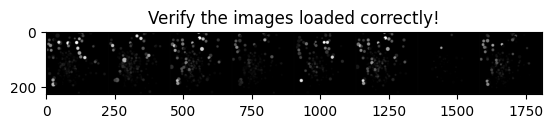

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 44.4252
new best train!
val Loss: 39.3868
new best val!

Epoch 1/34
----------
train Loss: 41.4122
new best train!
val Loss: 39.9613

Epoch 2/34
----------
train Loss: 38.7602
new best train!
val Loss: 40.4758

Epoch 3/34
----------
train Loss: 34.9941
new best train!
val Loss: 40.1841

Epoch 4/34
----------
train Loss: 31.7748
new best train!
val Loss: 40.1938

Epoch 5/34
----------
train Loss: 29.8000
new best train!
val Loss: 42.9319

Epoch 6/34
----------
train Loss: 27.2505
new best train!
val Loss: 40.0500

Epoch 7/34
----------
train Loss: 26.3280
new best train!
val Loss: 39.9933

Epoch 8/34
----------
train Loss: 26.1782
new best train!
val Loss: 41.1063

Epoch 9/34
----------
train Loss: 24.5748
new best train!
val Loss: 41.0382

Epoch 10/34
----------
train Loss: 25.9250
val Loss: 38.8436
new best val!

Epoch 11/34
----------
train Loss: 23.1513
new best train!
val Loss: 39.9999

Epoch 12/34
----------
train Loss: 22.2888
new best train!
val Loss: 41.4487

Epoch 

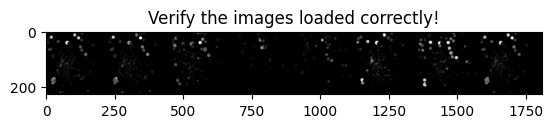

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 44.6202
new best train!
val Loss: 38.8330
new best val!

Epoch 1/34
----------
train Loss: 41.2966
new best train!
val Loss: 39.4415

Epoch 2/34
----------
train Loss: 38.0983
new best train!
val Loss: 39.1121

Epoch 3/34
----------
train Loss: 35.6833
new best train!
val Loss: 42.2233

Epoch 4/34
----------
train Loss: 33.7964
new best train!
val Loss: 38.8670

Epoch 5/34
----------
train Loss: 31.1836
new best train!
val Loss: 38.1790
new best val!

Epoch 6/34
----------
train Loss: 28.9112
new best train!
val Loss: 39.6854

Epoch 7/34
----------
train Loss: 28.2318
new best train!
val Loss: 40.6645

Epoch 8/34
----------
train Loss: 26.7947
new best train!
val Loss: 40.1898

Epoch 9/34
----------
train Loss: 24.8743
new best train!
val Loss: 40.5022

Epoch 10/34
----------
train Loss: 23.4599
new best train!
val Loss: 40.8412

Epoch 11/34
----------
train Loss: 22.5675
new best train!
val Loss: 41.5359

Epoch 12/34
----------
train Loss: 24.9108
val Loss: 40.5810

Epoch 

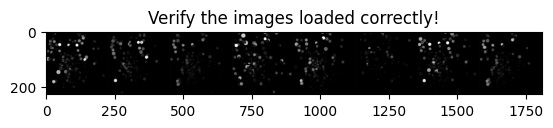

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 44.2828
new best train!
val Loss: 38.6732
new best val!

Epoch 1/34
----------
train Loss: 41.0562
new best train!
val Loss: 39.9418

Epoch 2/34
----------
train Loss: 38.5945
new best train!
val Loss: 41.7853

Epoch 3/34
----------
train Loss: 35.9454
new best train!
val Loss: 41.6593

Epoch 4/34
----------
train Loss: 32.7336
new best train!
val Loss: 42.0920

Epoch 5/34
----------
train Loss: 30.8509
new best train!
val Loss: 41.2851

Epoch 6/34
----------
train Loss: 28.9489
new best train!
val Loss: 41.2607

Epoch 7/34
----------
train Loss: 26.1687
new best train!
val Loss: 40.6854

Epoch 8/34
----------
train Loss: 25.5032
new best train!
val Loss: 39.9854

Epoch 9/34
----------
train Loss: 23.9854
new best train!
val Loss: 41.2779

Epoch 10/34
----------
train Loss: 23.0766
new best train!
val Loss: 43.5032

Epoch 11/34
----------
train Loss: 23.4088
val Loss: 40.0429

Epoch 12/34
----------
train Loss: 22.5564
new best train!
val Loss: 39.7252

Epoch 13/34
--------

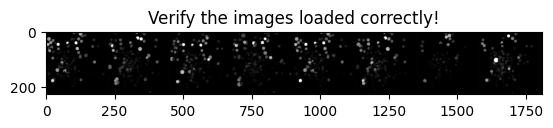

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 44.1116
new best train!
val Loss: 38.4630
new best val!

Epoch 1/34
----------
train Loss: 40.7719
new best train!
val Loss: 39.7232

Epoch 2/34
----------
train Loss: 39.0457
new best train!
val Loss: 39.2620

Epoch 3/34
----------
train Loss: 36.4048
new best train!
val Loss: 40.3393

Epoch 4/34
----------
train Loss: 35.1416
new best train!
val Loss: 40.4360

Epoch 5/34
----------
train Loss: 32.2722
new best train!
val Loss: 42.0893

Epoch 6/34
----------
train Loss: 28.6011
new best train!
val Loss: 38.6340

Epoch 7/34
----------
train Loss: 27.5410
new best train!
val Loss: 42.0515

Epoch 8/34
----------
train Loss: 26.2329
new best train!
val Loss: 40.4920

Epoch 9/34
----------
train Loss: 27.5869
val Loss: 41.6151

Epoch 10/34
----------
train Loss: 25.1698
new best train!
val Loss: 39.2553

Epoch 11/34
----------
train Loss: 24.3375
new best train!
val Loss: 40.1042

Epoch 12/34
----------
train Loss: 23.0970
new best train!
val Loss: 41.8564

Epoch 13/34
--------

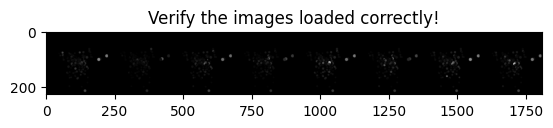

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 40.9813
new best train!
val Loss: 11.0489
new best val!

Epoch 1/34
----------
train Loss: 27.9972
new best train!
val Loss: 10.8188
new best val!

Epoch 2/34
----------
train Loss: 22.8354
new best train!
val Loss: 10.3250
new best val!

Epoch 3/34
----------
train Loss: 20.5443
new best train!
val Loss: 9.9218
new best val!

Epoch 4/34
----------
train Loss: 19.2457
new best train!
val Loss: 9.5840
new best val!

Epoch 5/34
----------
train Loss: 18.7420
new best train!
val Loss: 9.2752
new best val!

Epoch 6/34
----------
train Loss: 18.4075
new best train!
val Loss: 9.0153
new best val!

Epoch 7/34
----------
train Loss: 18.2504
new best train!
val Loss: 8.8987
new best val!

Epoch 8/34
----------
train Loss: 18.1384
new best train!
val Loss: 8.7685
new best val!

Epoch 9/34
----------
train Loss: 18.1298
new best train!
val Loss: 8.7302
new best val!

Epoch 10/34
----------
train Loss: 18.0944
new best train!
val Loss: 8.7077
new best val!

Epoch 11/34
----------
train

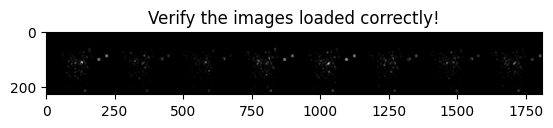

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 38.9888
new best train!
val Loss: 8.7362
new best val!

Epoch 1/34
----------
train Loss: 26.4658
new best train!
val Loss: 8.6869
new best val!

Epoch 2/34
----------
train Loss: 21.7284
new best train!
val Loss: 8.8809

Epoch 3/34
----------
train Loss: 19.7137
new best train!
val Loss: 9.0466

Epoch 4/34
----------
train Loss: 18.7403
new best train!
val Loss: 9.2589

Epoch 5/34
----------
train Loss: 18.3982
new best train!
val Loss: 9.4565

Epoch 6/34
----------
train Loss: 18.2076
new best train!
val Loss: 9.5436

Epoch 7/34
----------
train Loss: 18.1349
new best train!
val Loss: 9.3792

Epoch 8/34
----------
train Loss: 18.1043
new best train!
val Loss: 9.0335

Epoch 9/34
----------
train Loss: 18.0624
new best train!
val Loss: 8.7569

Epoch 10/34
----------
train Loss: 18.0643
val Loss: 8.3895
new best val!

Epoch 11/34
----------
train Loss: 18.0423
new best train!
val Loss: 8.0744
new best val!

Epoch 12/34
----------
train Loss: 18.0417
new best train!
val Loss:

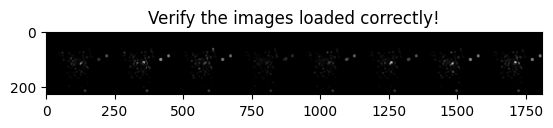

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 39.8387
new best train!
val Loss: 7.7393
new best val!

Epoch 1/34
----------
train Loss: 26.8946
new best train!
val Loss: 7.4601
new best val!

Epoch 2/34
----------
train Loss: 22.0972
new best train!
val Loss: 7.3995
new best val!

Epoch 3/34
----------
train Loss: 19.8129
new best train!
val Loss: 7.3881
new best val!

Epoch 4/34
----------
train Loss: 18.8497
new best train!
val Loss: 7.4807

Epoch 5/34
----------
train Loss: 18.4631
new best train!
val Loss: 7.7138

Epoch 6/34
----------
train Loss: 18.2189
new best train!
val Loss: 7.9578

Epoch 7/34
----------
train Loss: 18.1551
new best train!
val Loss: 8.1022

Epoch 8/34
----------
train Loss: 18.0920
new best train!
val Loss: 8.2371

Epoch 9/34
----------
train Loss: 18.0819
new best train!
val Loss: 8.3436

Epoch 10/34
----------
train Loss: 18.0812
new best train!
val Loss: 8.4222

Epoch 11/34
----------
train Loss: 18.0493
new best train!
val Loss: 8.5205

Epoch 12/34
----------
train Loss: 18.0376
new best 

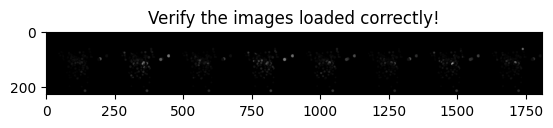

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 39.9844
new best train!
val Loss: 8.5804
new best val!

Epoch 1/34
----------
train Loss: 26.9684
new best train!
val Loss: 8.2196
new best val!

Epoch 2/34
----------
train Loss: 22.2796
new best train!
val Loss: 8.1075
new best val!

Epoch 3/34
----------
train Loss: 19.7588
new best train!
val Loss: 8.2343

Epoch 4/34
----------
train Loss: 19.0156
new best train!
val Loss: 8.3223

Epoch 5/34
----------
train Loss: 18.5153
new best train!
val Loss: 8.4861

Epoch 6/34
----------
train Loss: 18.3177
new best train!
val Loss: 8.6052

Epoch 7/34
----------
train Loss: 18.2701
new best train!
val Loss: 8.4729

Epoch 8/34
----------
train Loss: 18.1026
new best train!
val Loss: 8.2271

Epoch 9/34
----------
train Loss: 18.0823
new best train!
val Loss: 7.9411
new best val!

Epoch 10/34
----------
train Loss: 18.0840
val Loss: 7.6558
new best val!

Epoch 11/34
----------
train Loss: 18.1061
val Loss: 7.4804
new best val!

Epoch 12/34
----------
train Loss: 18.1156
val Loss: 7.3

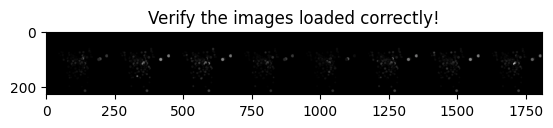

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 39.4808
new best train!
val Loss: 9.3289
new best val!

Epoch 1/34
----------
train Loss: 27.0381
new best train!
val Loss: 8.5707
new best val!

Epoch 2/34
----------
train Loss: 21.8915
new best train!
val Loss: 8.3728
new best val!

Epoch 3/34
----------
train Loss: 20.0022
new best train!
val Loss: 8.7706

Epoch 4/34
----------
train Loss: 19.1142
new best train!
val Loss: 9.8861

Epoch 5/34
----------
train Loss: 18.5234
new best train!
val Loss: 11.0725

Epoch 6/34
----------
train Loss: 18.4425
new best train!
val Loss: 11.6871

Epoch 7/34
----------
train Loss: 18.1567
new best train!
val Loss: 11.8764

Epoch 8/34
----------
train Loss: 18.0934
new best train!
val Loss: 11.7861

Epoch 9/34
----------
train Loss: 18.0699
new best train!
val Loss: 11.5525

Epoch 10/34
----------
train Loss: 18.0571
new best train!
val Loss: 11.3222

Epoch 11/34
----------
train Loss: 18.0727
val Loss: 11.0704

Epoch 12/34
----------
train Loss: 18.0654
val Loss: 10.9804

Epoch 13/34
-

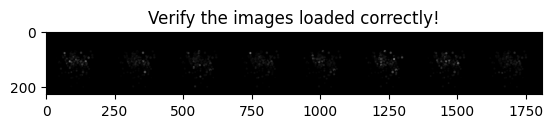

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.6091
new best train!
val Loss: 8.9327
new best val!

Epoch 1/34
----------
train Loss: 24.9150
new best train!
val Loss: 9.0236

Epoch 2/34
----------
train Loss: 19.8149
new best train!
val Loss: 8.9187
new best val!

Epoch 3/34
----------
train Loss: 17.9975
new best train!
val Loss: 8.8074
new best val!

Epoch 4/34
----------
train Loss: 17.2209
new best train!
val Loss: 8.7630
new best val!

Epoch 5/34
----------
train Loss: 16.8663
new best train!
val Loss: 8.5625
new best val!

Epoch 6/34
----------
train Loss: 16.7786
new best train!
val Loss: 8.2364
new best val!

Epoch 7/34
----------
train Loss: 16.7118
new best train!
val Loss: 7.9768
new best val!

Epoch 8/34
----------
train Loss: 16.6720
new best train!
val Loss: 7.8050
new best val!

Epoch 9/34
----------
train Loss: 16.9489
val Loss: 7.7735
new best val!

Epoch 10/34
----------
train Loss: 16.6344
new best train!
val Loss: 7.7644
new best val!

Epoch 11/34
----------
train Loss: 16.6311
new best train!
va

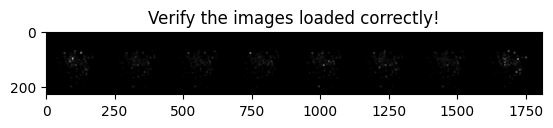

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 38.2202
new best train!
val Loss: 8.2395
new best val!

Epoch 1/34
----------
train Loss: 25.9889
new best train!
val Loss: 8.2780

Epoch 2/34
----------
train Loss: 20.3662
new best train!
val Loss: 8.3640

Epoch 3/34
----------
train Loss: 18.1064
new best train!
val Loss: 8.5104

Epoch 4/34
----------
train Loss: 17.2409
new best train!
val Loss: 8.6504

Epoch 5/34
----------
train Loss: 16.9850
new best train!
val Loss: 8.5459

Epoch 6/34
----------
train Loss: 16.8753
new best train!
val Loss: 8.2383
new best val!

Epoch 7/34
----------
train Loss: 16.7552
new best train!
val Loss: 7.8315
new best val!

Epoch 8/34
----------
train Loss: 16.6684
new best train!
val Loss: 7.4663
new best val!

Epoch 9/34
----------
train Loss: 16.6506
new best train!
val Loss: 7.1644
new best val!

Epoch 10/34
----------
train Loss: 16.6455
new best train!
val Loss: 6.9677
new best val!

Epoch 11/34
----------
train Loss: 16.6343
new best train!
val Loss: 6.9441
new best val!

Epoch 12/3

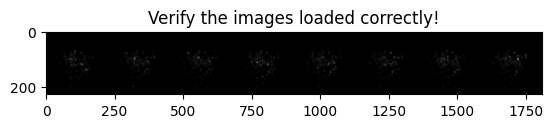

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.5510
new best train!
val Loss: 8.6582
new best val!

Epoch 1/34
----------
train Loss: 25.1662
new best train!
val Loss: 8.7719

Epoch 2/34
----------
train Loss: 19.9081
new best train!
val Loss: 8.8928

Epoch 3/34
----------
train Loss: 17.8741
new best train!
val Loss: 8.9830

Epoch 4/34
----------
train Loss: 17.1588
new best train!
val Loss: 8.9797

Epoch 5/34
----------
train Loss: 17.1886
val Loss: 8.9864

Epoch 6/34
----------
train Loss: 16.7487
new best train!
val Loss: 8.9574

Epoch 7/34
----------
train Loss: 16.7038
new best train!
val Loss: 8.8728

Epoch 8/34
----------
train Loss: 16.6932
new best train!
val Loss: 8.7624

Epoch 9/34
----------
train Loss: 16.6701
new best train!
val Loss: 8.7092

Epoch 10/34
----------
train Loss: 16.6673
new best train!
val Loss: 8.7748

Epoch 11/34
----------
train Loss: 16.6294
new best train!
val Loss: 8.7549

Epoch 12/34
----------
train Loss: 16.6220
new best train!
val Loss: 8.7575

Epoch 13/34
----------
train Loss

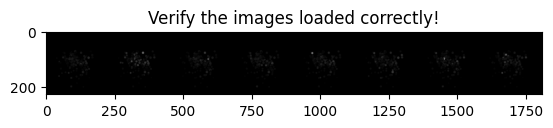

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.3586
new best train!
val Loss: 8.9685
new best val!

Epoch 1/34
----------
train Loss: 24.8928
new best train!
val Loss: 9.1998

Epoch 2/34
----------
train Loss: 20.7898
new best train!
val Loss: 9.4586

Epoch 3/34
----------
train Loss: 17.7950
new best train!
val Loss: 9.6743

Epoch 4/34
----------
train Loss: 17.1889
new best train!
val Loss: 9.8173

Epoch 5/34
----------
train Loss: 16.8907
new best train!
val Loss: 9.9087

Epoch 6/34
----------
train Loss: 16.8098
new best train!
val Loss: 9.8993

Epoch 7/34
----------
train Loss: 16.7036
new best train!
val Loss: 9.7553

Epoch 8/34
----------
train Loss: 16.7129
val Loss: 9.4918

Epoch 9/34
----------
train Loss: 16.6512
new best train!
val Loss: 9.2003

Epoch 10/34
----------
train Loss: 16.6365
new best train!
val Loss: 8.8779
new best val!

Epoch 11/34
----------
train Loss: 16.6346
new best train!
val Loss: 8.5212
new best val!

Epoch 12/34
----------
train Loss: 16.6551
val Loss: 8.2586
new best val!

Epoch 1

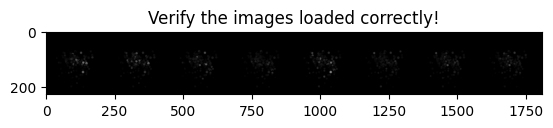

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.2655
new best train!
val Loss: 9.2592
new best val!

Epoch 1/34
----------
train Loss: 24.7083
new best train!
val Loss: 9.1971
new best val!

Epoch 2/34
----------
train Loss: 20.5217
new best train!
val Loss: 9.1685
new best val!

Epoch 3/34
----------
train Loss: 18.0196
new best train!
val Loss: 9.2446

Epoch 4/34
----------
train Loss: 17.3946
new best train!
val Loss: 9.3285

Epoch 5/34
----------
train Loss: 16.9460
new best train!
val Loss: 9.3497

Epoch 6/34
----------
train Loss: 16.8195
new best train!
val Loss: 9.3658

Epoch 7/34
----------
train Loss: 16.7207
new best train!
val Loss: 9.2779

Epoch 8/34
----------
train Loss: 16.7375
val Loss: 9.0987
new best val!

Epoch 9/34
----------
train Loss: 16.6579
new best train!
val Loss: 8.8753
new best val!

Epoch 10/34
----------
train Loss: 16.6569
new best train!
val Loss: 8.6933
new best val!

Epoch 11/34
----------
train Loss: 16.6340
new best train!
val Loss: 8.5122
new best val!

Epoch 12/34
----------
tra

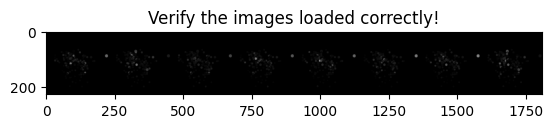

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 27.2276
new best train!
val Loss: 7.6121
new best val!

Epoch 1/34
----------
train Loss: 19.9920
new best train!
val Loss: 7.8234

Epoch 2/34
----------
train Loss: 16.0028
new best train!
val Loss: 8.0118

Epoch 3/34
----------
train Loss: 14.1242
new best train!
val Loss: 8.4724

Epoch 4/34
----------
train Loss: 13.3360
new best train!
val Loss: 9.0145

Epoch 5/34
----------
train Loss: 13.0966
new best train!
val Loss: 9.3715

Epoch 6/34
----------
train Loss: 12.9134
new best train!
val Loss: 9.6077

Epoch 7/34
----------
train Loss: 13.1080
val Loss: 9.7925

Epoch 8/34
----------
train Loss: 12.8230
new best train!
val Loss: 9.8743

Epoch 9/34
----------
train Loss: 12.8465
val Loss: 9.9068

Epoch 10/34
----------
train Loss: 12.7757
new best train!
val Loss: 9.7425

Epoch 11/34
----------
train Loss: 12.7842
val Loss: 9.4122

Epoch 12/34
----------
train Loss: 12.7412
new best train!
val Loss: 9.3645

Epoch 13/34
----------
train Loss: 12.7247
new best train!
val Lo

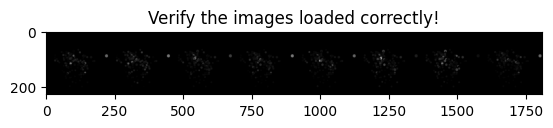

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 28.7410
new best train!
val Loss: 7.1296
new best val!

Epoch 1/34
----------
train Loss: 18.8897
new best train!
val Loss: 7.2241

Epoch 2/34
----------
train Loss: 15.8649
new best train!
val Loss: 7.5884

Epoch 3/34
----------
train Loss: 14.1487
new best train!
val Loss: 7.7060

Epoch 4/34
----------
train Loss: 13.4824
new best train!
val Loss: 7.6694

Epoch 5/34
----------
train Loss: 13.1055
new best train!
val Loss: 7.4368

Epoch 6/34
----------
train Loss: 12.9941
new best train!
val Loss: 7.3791

Epoch 7/34
----------
train Loss: 12.8401
new best train!
val Loss: 7.2968

Epoch 8/34
----------
train Loss: 12.7803
new best train!
val Loss: 7.0145
new best val!

Epoch 9/34
----------
train Loss: 12.7647
new best train!
val Loss: 6.8832
new best val!

Epoch 10/34
----------
train Loss: 12.7478
new best train!
val Loss: 6.8426
new best val!

Epoch 11/34
----------
train Loss: 12.7341
new best train!
val Loss: 6.6428
new best val!

Epoch 12/34
----------
train Loss: 12.

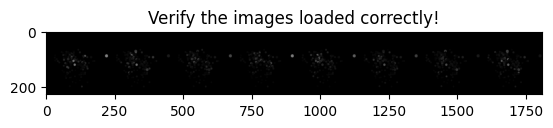

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 30.0263
new best train!
val Loss: 7.2780
new best val!

Epoch 1/34
----------
train Loss: 20.0040
new best train!
val Loss: 7.7581

Epoch 2/34
----------
train Loss: 16.4288
new best train!
val Loss: 8.1297

Epoch 3/34
----------
train Loss: 14.6902
new best train!
val Loss: 8.2295

Epoch 4/34
----------
train Loss: 13.5842
new best train!
val Loss: 8.1448

Epoch 5/34
----------
train Loss: 13.1626
new best train!
val Loss: 7.9337

Epoch 6/34
----------
train Loss: 12.9998
new best train!
val Loss: 7.8534

Epoch 7/34
----------
train Loss: 12.8832
new best train!
val Loss: 7.7773

Epoch 8/34
----------
train Loss: 12.8330
new best train!
val Loss: 7.7122

Epoch 9/34
----------
train Loss: 12.7905
new best train!
val Loss: 7.4975

Epoch 10/34
----------
train Loss: 12.8001
val Loss: 7.6303

Epoch 11/34
----------
train Loss: 12.7415
new best train!
val Loss: 7.4119

Epoch 12/34
----------
train Loss: 12.7215
new best train!
val Loss: 7.2683
new best val!

Epoch 13/34
-------

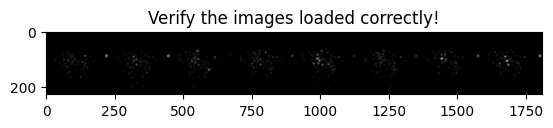

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 27.5786
new best train!
val Loss: 8.1994
new best val!

Epoch 1/34
----------
train Loss: 18.2501
new best train!
val Loss: 8.8985

Epoch 2/34
----------
train Loss: 15.2088
new best train!
val Loss: 9.2695

Epoch 3/34
----------
train Loss: 14.1030
new best train!
val Loss: 9.5749

Epoch 4/34
----------
train Loss: 13.5001
new best train!
val Loss: 9.7998

Epoch 5/34
----------
train Loss: 12.9971
new best train!
val Loss: 9.9699

Epoch 6/34
----------
train Loss: 12.9132
new best train!
val Loss: 10.0351

Epoch 7/34
----------
train Loss: 13.1174
val Loss: 10.0161

Epoch 8/34
----------
train Loss: 12.7872
new best train!
val Loss: 10.0298

Epoch 9/34
----------
train Loss: 12.7676
new best train!
val Loss: 10.0508

Epoch 10/34
----------
train Loss: 12.7680
val Loss: 10.0303

Epoch 11/34
----------
train Loss: 12.8993
val Loss: 9.8970

Epoch 12/34
----------
train Loss: 12.7377
new best train!
val Loss: 9.6771

Epoch 13/34
----------
train Loss: 12.7244
new best train!
v

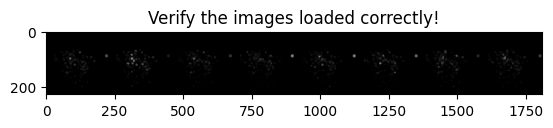

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 28.3786
new best train!
val Loss: 6.5866
new best val!

Epoch 1/34
----------
train Loss: 19.2121
new best train!
val Loss: 6.7828

Epoch 2/34
----------
train Loss: 15.3201
new best train!
val Loss: 7.1618

Epoch 3/34
----------
train Loss: 14.0093
new best train!
val Loss: 7.5665

Epoch 4/34
----------
train Loss: 13.4849
new best train!
val Loss: 7.9378

Epoch 5/34
----------
train Loss: 13.1647
new best train!
val Loss: 8.4341

Epoch 6/34
----------
train Loss: 12.9562
new best train!
val Loss: 8.6629

Epoch 7/34
----------
train Loss: 12.8362
new best train!
val Loss: 8.8765

Epoch 8/34
----------
train Loss: 12.7905
new best train!
val Loss: 8.9960

Epoch 9/34
----------
train Loss: 12.8386
val Loss: 8.9536

Epoch 10/34
----------
train Loss: 12.7525
new best train!
val Loss: 9.2428

Epoch 11/34
----------
train Loss: 12.7516
new best train!
val Loss: 9.2319

Epoch 12/34
----------
train Loss: 12.7352
new best train!
val Loss: 9.3822

Epoch 13/34
----------
train Loss

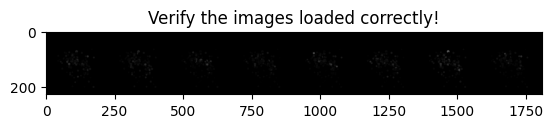

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 30.8392
new best train!
val Loss: 7.6070
new best val!

Epoch 1/34
----------
train Loss: 21.4645
new best train!
val Loss: 7.7881

Epoch 2/34
----------
train Loss: 17.3065
new best train!
val Loss: 7.9361

Epoch 3/34
----------
train Loss: 16.1918
new best train!
val Loss: 7.9050

Epoch 4/34
----------
train Loss: 15.0301
new best train!
val Loss: 7.9269

Epoch 5/34
----------
train Loss: 14.6529
new best train!
val Loss: 7.9571

Epoch 6/34
----------
train Loss: 14.5057
new best train!
val Loss: 8.0174

Epoch 7/34
----------
train Loss: 14.4264
new best train!
val Loss: 8.1078

Epoch 8/34
----------
train Loss: 14.3770
new best train!
val Loss: 8.2439

Epoch 9/34
----------
train Loss: 14.3487
new best train!
val Loss: 8.3697

Epoch 10/34
----------
train Loss: 14.3126
new best train!
val Loss: 8.4367

Epoch 11/34
----------
train Loss: 14.2934
new best train!
val Loss: 8.5286

Epoch 12/34
----------
train Loss: 14.2874
new best train!
val Loss: 8.6466

Epoch 13/34
-----

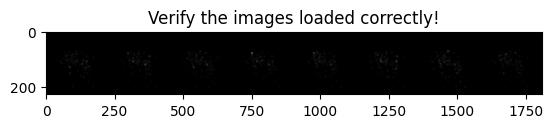

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 30.6143
new best train!
val Loss: 7.8147
new best val!

Epoch 1/34
----------
train Loss: 21.8087
new best train!
val Loss: 7.7784
new best val!

Epoch 2/34
----------
train Loss: 17.4596
new best train!
val Loss: 7.8495

Epoch 3/34
----------
train Loss: 15.6541
new best train!
val Loss: 7.9913

Epoch 4/34
----------
train Loss: 14.9840
new best train!
val Loss: 8.0776

Epoch 5/34
----------
train Loss: 14.6073
new best train!
val Loss: 8.1119

Epoch 6/34
----------
train Loss: 14.4581
new best train!
val Loss: 8.0113

Epoch 7/34
----------
train Loss: 14.4080
new best train!
val Loss: 7.9071

Epoch 8/34
----------
train Loss: 14.3419
new best train!
val Loss: 7.8082

Epoch 9/34
----------
train Loss: 14.6621
val Loss: 7.7850

Epoch 10/34
----------
train Loss: 14.3151
new best train!
val Loss: 7.9475

Epoch 11/34
----------
train Loss: 14.2897
new best train!
val Loss: 8.0680

Epoch 12/34
----------
train Loss: 14.2808
new best train!
val Loss: 8.1344

Epoch 13/34
-------

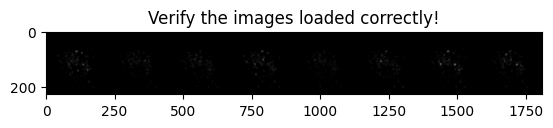

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 30.3799
new best train!
val Loss: 7.6938
new best val!

Epoch 1/34
----------
train Loss: 20.3572
new best train!
val Loss: 7.7655

Epoch 2/34
----------
train Loss: 16.9745
new best train!
val Loss: 7.8037

Epoch 3/34
----------
train Loss: 15.3101
new best train!
val Loss: 7.8896

Epoch 4/34
----------
train Loss: 14.8456
new best train!
val Loss: 7.9041

Epoch 5/34
----------
train Loss: 14.6352
new best train!
val Loss: 7.9348

Epoch 6/34
----------
train Loss: 14.4522
new best train!
val Loss: 7.9033

Epoch 7/34
----------
train Loss: 14.3751
new best train!
val Loss: 7.8524

Epoch 8/34
----------
train Loss: 14.3332
new best train!
val Loss: 7.8350

Epoch 9/34
----------
train Loss: 14.3195
new best train!
val Loss: 7.7894

Epoch 10/34
----------
train Loss: 14.3131
new best train!
val Loss: 7.7815

Epoch 11/34
----------
train Loss: 14.3002
new best train!
val Loss: 7.9088

Epoch 12/34
----------
train Loss: 14.2831
new best train!
val Loss: 8.1044

Epoch 13/34
-----

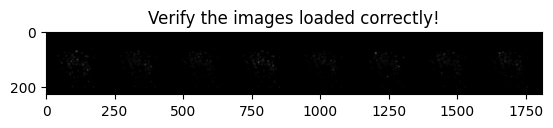

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 32.8221
new best train!
val Loss: 8.4756
new best val!

Epoch 1/34
----------
train Loss: 21.1477
new best train!
val Loss: 8.4514
new best val!

Epoch 2/34
----------
train Loss: 17.4196
new best train!
val Loss: 8.5067

Epoch 3/34
----------
train Loss: 15.8398
new best train!
val Loss: 8.7264

Epoch 4/34
----------
train Loss: 14.8861
new best train!
val Loss: 8.8826

Epoch 5/34
----------
train Loss: 14.6359
new best train!
val Loss: 9.0141

Epoch 6/34
----------
train Loss: 14.6155
new best train!
val Loss: 9.0891

Epoch 7/34
----------
train Loss: 14.3822
new best train!
val Loss: 9.0733

Epoch 8/34
----------
train Loss: 14.3848
val Loss: 9.0497

Epoch 9/34
----------
train Loss: 14.3145
new best train!
val Loss: 9.0628

Epoch 10/34
----------
train Loss: 14.3039
new best train!
val Loss: 9.0050

Epoch 11/34
----------
train Loss: 14.2917
new best train!
val Loss: 8.9966

Epoch 12/34
----------
train Loss: 14.2937
val Loss: 8.9809

Epoch 13/34
----------
train Loss: 

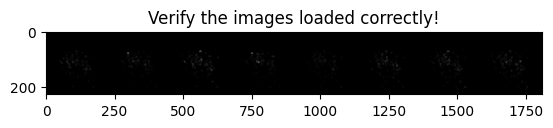

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 35.4940
new best train!
val Loss: 7.5079
new best val!

Epoch 1/34
----------
train Loss: 23.3379
new best train!
val Loss: 7.2386
new best val!

Epoch 2/34
----------
train Loss: 17.7966
new best train!
val Loss: 7.3028

Epoch 3/34
----------
train Loss: 15.6109
new best train!
val Loss: 7.7217

Epoch 4/34
----------
train Loss: 14.8422
new best train!
val Loss: 8.2312

Epoch 5/34
----------
train Loss: 14.5713
new best train!
val Loss: 8.5647

Epoch 6/34
----------
train Loss: 14.4638
new best train!
val Loss: 8.5641

Epoch 7/34
----------
train Loss: 14.3949
new best train!
val Loss: 8.4779

Epoch 8/34
----------
train Loss: 14.4706
val Loss: 8.3626

Epoch 9/34
----------
train Loss: 14.3207
new best train!
val Loss: 8.2889

Epoch 10/34
----------
train Loss: 14.3295
val Loss: 8.2861

Epoch 11/34
----------
train Loss: 14.2978
new best train!
val Loss: 8.4289

Epoch 12/34
----------
train Loss: 14.2882
new best train!
val Loss: 8.6343

Epoch 13/34
----------
train Loss: 

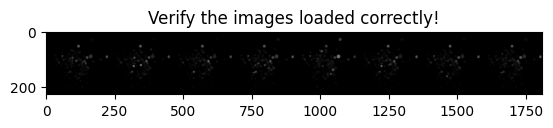

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.5676
new best train!
val Loss: 6.8727
new best val!

Epoch 1/34
----------
train Loss: 24.7115
new best train!
val Loss: 6.9363

Epoch 2/34
----------
train Loss: 21.2568
new best train!
val Loss: 7.0513

Epoch 3/34
----------
train Loss: 17.3940
new best train!
val Loss: 7.3769

Epoch 4/34
----------
train Loss: 16.7763
new best train!
val Loss: 7.6093

Epoch 5/34
----------
train Loss: 15.1563
new best train!
val Loss: 7.5699

Epoch 6/34
----------
train Loss: 14.7411
new best train!
val Loss: 7.6394

Epoch 7/34
----------
train Loss: 14.4119
new best train!
val Loss: 8.0438

Epoch 8/34
----------
train Loss: 14.1514
new best train!
val Loss: 8.4391

Epoch 9/34
----------
train Loss: 14.0835
new best train!
val Loss: 8.6554

Epoch 10/34
----------
train Loss: 14.0678
new best train!
val Loss: 8.6838

Epoch 11/34
----------
train Loss: 14.0475
new best train!
val Loss: 8.5899

Epoch 12/34
----------
train Loss: 14.0150
new best train!
val Loss: 8.5210

Epoch 13/34
-----

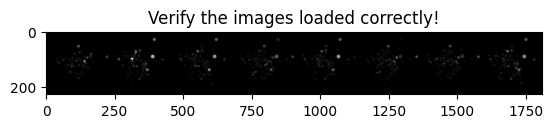

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.6232
new best train!
val Loss: 7.0014
new best val!

Epoch 1/34
----------
train Loss: 24.1854
new best train!
val Loss: 7.1876

Epoch 2/34
----------
train Loss: 18.9910
new best train!
val Loss: 7.2039

Epoch 3/34
----------
train Loss: 16.1180
new best train!
val Loss: 7.1729

Epoch 4/34
----------
train Loss: 15.1000
new best train!
val Loss: 7.0344

Epoch 5/34
----------
train Loss: 14.4708
new best train!
val Loss: 6.9050
new best val!

Epoch 6/34
----------
train Loss: 14.2849
new best train!
val Loss: 6.8180
new best val!

Epoch 7/34
----------
train Loss: 14.1482
new best train!
val Loss: 6.7674
new best val!

Epoch 8/34
----------
train Loss: 14.0463
new best train!
val Loss: 6.6859
new best val!

Epoch 9/34
----------
train Loss: 14.0036
new best train!
val Loss: 6.6151
new best val!

Epoch 10/34
----------
train Loss: 14.0027
new best train!
val Loss: 6.6378

Epoch 11/34
----------
train Loss: 14.0479
val Loss: 6.6506

Epoch 12/34
----------
train Loss: 13.97

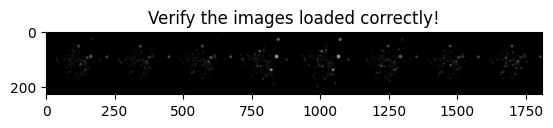

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.8206
new best train!
val Loss: 6.9049
new best val!

Epoch 1/34
----------
train Loss: 26.7988
new best train!
val Loss: 6.9217

Epoch 2/34
----------
train Loss: 21.1895
new best train!
val Loss: 6.8941
new best val!

Epoch 3/34
----------
train Loss: 18.4255
new best train!
val Loss: 6.9797

Epoch 4/34
----------
train Loss: 16.1737
new best train!
val Loss: 7.1401

Epoch 5/34
----------
train Loss: 15.1216
new best train!
val Loss: 7.2402

Epoch 6/34
----------
train Loss: 14.4718
new best train!
val Loss: 7.3737

Epoch 7/34
----------
train Loss: 14.2679
new best train!
val Loss: 7.4584

Epoch 8/34
----------
train Loss: 14.1709
new best train!
val Loss: 7.4476

Epoch 9/34
----------
train Loss: 14.0802
new best train!
val Loss: 7.1768

Epoch 10/34
----------
train Loss: 14.0298
new best train!
val Loss: 6.9149

Epoch 11/34
----------
train Loss: 14.0044
new best train!
val Loss: 6.6948
new best val!

Epoch 12/34
----------
train Loss: 13.9930
new best train!
val Los

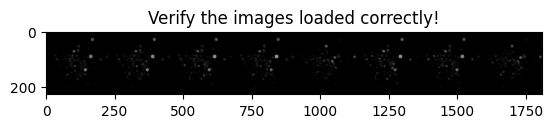

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 30.8316
new best train!
val Loss: 6.9977
new best val!

Epoch 1/34
----------
train Loss: 25.0499
new best train!
val Loss: 7.0566

Epoch 2/34
----------
train Loss: 19.8287
new best train!
val Loss: 7.1076

Epoch 3/34
----------
train Loss: 16.7406
new best train!
val Loss: 7.2998

Epoch 4/34
----------
train Loss: 16.1275
new best train!
val Loss: 7.4427

Epoch 5/34
----------
train Loss: 14.9359
new best train!
val Loss: 7.4913

Epoch 6/34
----------
train Loss: 14.6205
new best train!
val Loss: 7.7033

Epoch 7/34
----------
train Loss: 14.1932
new best train!
val Loss: 7.8546

Epoch 8/34
----------
train Loss: 14.0950
new best train!
val Loss: 8.0356

Epoch 9/34
----------
train Loss: 14.0822
new best train!
val Loss: 8.1423

Epoch 10/34
----------
train Loss: 14.0111
new best train!
val Loss: 8.0718

Epoch 11/34
----------
train Loss: 14.0138
val Loss: 7.8981

Epoch 12/34
----------
train Loss: 13.9808
new best train!
val Loss: 7.7009

Epoch 13/34
----------
train Loss

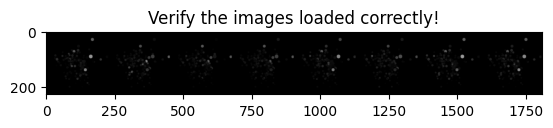

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 31.4763
new best train!
val Loss: 6.8526
new best val!

Epoch 1/34
----------
train Loss: 26.3159
new best train!
val Loss: 6.8676

Epoch 2/34
----------
train Loss: 20.6185
new best train!
val Loss: 6.9782

Epoch 3/34
----------
train Loss: 18.1339
new best train!
val Loss: 7.2289

Epoch 4/34
----------
train Loss: 15.9434
new best train!
val Loss: 7.5180

Epoch 5/34
----------
train Loss: 15.0509
new best train!
val Loss: 7.7393

Epoch 6/34
----------
train Loss: 14.8188
new best train!
val Loss: 7.9728

Epoch 7/34
----------
train Loss: 14.2726
new best train!
val Loss: 8.1314

Epoch 8/34
----------
train Loss: 14.1659
new best train!
val Loss: 8.2120

Epoch 9/34
----------
train Loss: 14.3061
val Loss: 8.1814

Epoch 10/34
----------
train Loss: 14.0540
new best train!
val Loss: 8.2090

Epoch 11/34
----------
train Loss: 14.0286
new best train!
val Loss: 8.2088

Epoch 12/34
----------
train Loss: 14.0090
new best train!
val Loss: 8.1192

Epoch 13/34
----------
train Loss

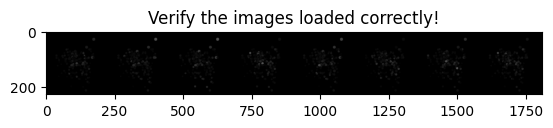

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 34.3175
new best train!
val Loss: 9.0030
new best val!

Epoch 1/34
----------
train Loss: 23.1153
new best train!
val Loss: 9.1723

Epoch 2/34
----------
train Loss: 18.5101
new best train!
val Loss: 9.4669

Epoch 3/34
----------
train Loss: 16.9245
new best train!
val Loss: 9.6723

Epoch 4/34
----------
train Loss: 16.2380
new best train!
val Loss: 9.8107

Epoch 5/34
----------
train Loss: 15.9664
new best train!
val Loss: 9.8045

Epoch 6/34
----------
train Loss: 15.8181
new best train!
val Loss: 9.6452

Epoch 7/34
----------
train Loss: 15.7577
new best train!
val Loss: 9.4680

Epoch 8/34
----------
train Loss: 15.7525
new best train!
val Loss: 9.1588

Epoch 9/34
----------
train Loss: 15.7591
val Loss: 8.9285
new best val!

Epoch 10/34
----------
train Loss: 15.6991
new best train!
val Loss: 8.8626
new best val!

Epoch 11/34
----------
train Loss: 15.6899
new best train!
val Loss: 8.8807

Epoch 12/34
----------
train Loss: 15.6818
new best train!
val Loss: 8.8250
new be

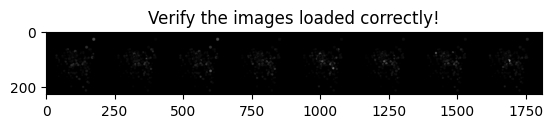

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.0340
new best train!
val Loss: 8.2831
new best val!

Epoch 1/34
----------
train Loss: 24.2014
new best train!
val Loss: 8.5041

Epoch 2/34
----------
train Loss: 18.5318
new best train!
val Loss: 9.5240

Epoch 3/34
----------
train Loss: 16.8921
new best train!
val Loss: 10.0252

Epoch 4/34
----------
train Loss: 16.0537
new best train!
val Loss: 10.1586

Epoch 5/34
----------
train Loss: 15.8669
new best train!
val Loss: 10.0655

Epoch 6/34
----------
train Loss: 15.8159
new best train!
val Loss: 9.8435

Epoch 7/34
----------
train Loss: 15.7818
new best train!
val Loss: 9.6406

Epoch 8/34
----------
train Loss: 15.7294
new best train!
val Loss: 9.4924

Epoch 9/34
----------
train Loss: 15.7129
new best train!
val Loss: 9.2978

Epoch 10/34
----------
train Loss: 15.6904
new best train!
val Loss: 9.1146

Epoch 11/34
----------
train Loss: 15.6853
new best train!
val Loss: 9.0288

Epoch 12/34
----------
train Loss: 15.6807
new best train!
val Loss: 9.0598

Epoch 13/34
--

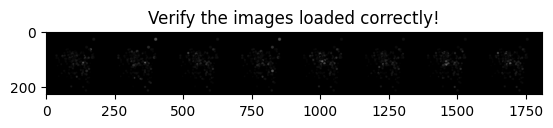

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 35.6812
new best train!
val Loss: 8.1577
new best val!

Epoch 1/34
----------
train Loss: 23.4034
new best train!
val Loss: 8.1676

Epoch 2/34
----------
train Loss: 19.1316
new best train!
val Loss: 8.2157

Epoch 3/34
----------
train Loss: 16.9243
new best train!
val Loss: 8.4819

Epoch 4/34
----------
train Loss: 16.2172
new best train!
val Loss: 8.7981

Epoch 5/34
----------
train Loss: 16.1593
new best train!
val Loss: 9.2516

Epoch 6/34
----------
train Loss: 15.8193
new best train!
val Loss: 9.5036

Epoch 7/34
----------
train Loss: 15.7445
new best train!
val Loss: 9.5098

Epoch 8/34
----------
train Loss: 15.7262
new best train!
val Loss: 9.5326

Epoch 9/34
----------
train Loss: 15.7036
new best train!
val Loss: 9.5345

Epoch 10/34
----------
train Loss: 15.7027
new best train!
val Loss: 9.5043

Epoch 11/34
----------
train Loss: 15.6907
new best train!
val Loss: 9.4577

Epoch 12/34
----------
train Loss: 15.6822
new best train!
val Loss: 9.4907

Epoch 13/34
-----

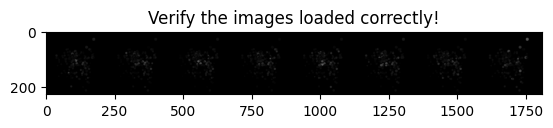

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.9825
new best train!
val Loss: 9.8255
new best val!

Epoch 1/34
----------
train Loss: 25.8056
new best train!
val Loss: 10.1802

Epoch 2/34
----------
train Loss: 19.2009
new best train!
val Loss: 10.4148

Epoch 3/34
----------
train Loss: 17.0865
new best train!
val Loss: 10.5261

Epoch 4/34
----------
train Loss: 16.2078
new best train!
val Loss: 10.5653

Epoch 5/34
----------
train Loss: 15.9049
new best train!
val Loss: 10.5343

Epoch 6/34
----------
train Loss: 15.8958
new best train!
val Loss: 10.4257

Epoch 7/34
----------
train Loss: 15.7475
new best train!
val Loss: 10.2529

Epoch 8/34
----------
train Loss: 15.7259
new best train!
val Loss: 10.0365

Epoch 9/34
----------
train Loss: 15.7081
new best train!
val Loss: 9.7899
new best val!

Epoch 10/34
----------
train Loss: 15.6929
new best train!
val Loss: 9.5889
new best val!

Epoch 11/34
----------
train Loss: 15.6935
val Loss: 9.4783
new best val!

Epoch 12/34
----------
train Loss: 15.6862
new best train!
v

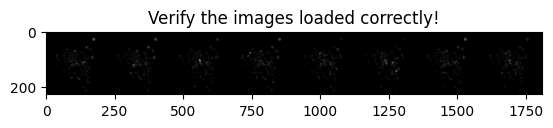

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.9534
new best train!
val Loss: 8.7994
new best val!

Epoch 1/34
----------
train Loss: 25.0191
new best train!
val Loss: 8.5242
new best val!

Epoch 2/34
----------
train Loss: 19.7160
new best train!
val Loss: 8.6007

Epoch 3/34
----------
train Loss: 17.6601
new best train!
val Loss: 8.8211

Epoch 4/34
----------
train Loss: 16.4262
new best train!
val Loss: 9.1320

Epoch 5/34
----------
train Loss: 16.0169
new best train!
val Loss: 9.4155

Epoch 6/34
----------
train Loss: 15.8797
new best train!
val Loss: 9.5276

Epoch 7/34
----------
train Loss: 15.8190
new best train!
val Loss: 9.4860

Epoch 8/34
----------
train Loss: 15.7458
new best train!
val Loss: 9.3880

Epoch 9/34
----------
train Loss: 15.7229
new best train!
val Loss: 9.2443

Epoch 10/34
----------
train Loss: 15.7054
new best train!
val Loss: 9.0168

Epoch 11/34
----------
train Loss: 15.6980
new best train!
val Loss: 8.9042

Epoch 12/34
----------
train Loss: 15.7020
val Loss: 8.8473

Epoch 13/34
-------

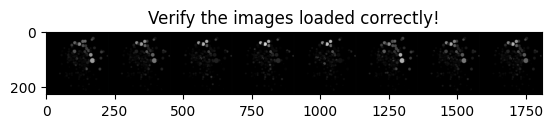

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 28.4162
new best train!
val Loss: 8.0183
new best val!

Epoch 1/34
----------
train Loss: 21.3761
new best train!
val Loss: 7.2609
new best val!

Epoch 2/34
----------
train Loss: 18.8774
new best train!
val Loss: 7.0238
new best val!

Epoch 3/34
----------
train Loss: 16.4585
new best train!
val Loss: 6.2535
new best val!

Epoch 4/34
----------
train Loss: 15.7328
new best train!
val Loss: 5.2111
new best val!

Epoch 5/34
----------
train Loss: 15.2026
new best train!
val Loss: 4.4081
new best val!

Epoch 6/34
----------
train Loss: 14.5086
new best train!
val Loss: 3.8341
new best val!

Epoch 7/34
----------
train Loss: 14.2450
new best train!
val Loss: 3.5330
new best val!

Epoch 8/34
----------
train Loss: 13.9942
new best train!
val Loss: 3.3716
new best val!

Epoch 9/34
----------
train Loss: 13.7551
new best train!
val Loss: 3.2951
new best val!

Epoch 10/34
----------
train Loss: 13.6711
new best train!
val Loss: 3.2504
new best val!

Epoch 11/34
----------
train Lo

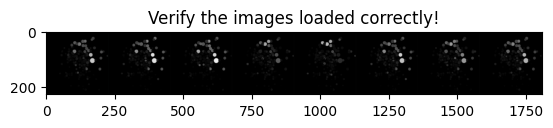

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 33.1027
new best train!
val Loss: 8.2167
new best val!

Epoch 1/34
----------
train Loss: 27.2247
new best train!
val Loss: 7.3831
new best val!

Epoch 2/34
----------
train Loss: 24.5360
new best train!
val Loss: 6.2883
new best val!

Epoch 3/34
----------
train Loss: 20.8470
new best train!
val Loss: 5.5165
new best val!

Epoch 4/34
----------
train Loss: 18.2936
new best train!
val Loss: 5.0901
new best val!

Epoch 5/34
----------
train Loss: 16.6921
new best train!
val Loss: 4.6724
new best val!

Epoch 6/34
----------
train Loss: 15.7034
new best train!
val Loss: 4.1375
new best val!

Epoch 7/34
----------
train Loss: 15.9932
val Loss: 4.0149
new best val!

Epoch 8/34
----------
train Loss: 14.7720
new best train!
val Loss: 3.9647
new best val!

Epoch 9/34
----------
train Loss: 14.4422
new best train!
val Loss: 3.8668
new best val!

Epoch 10/34
----------
train Loss: 14.4769
val Loss: 3.5951
new best val!

Epoch 11/34
----------
train Loss: 14.1992
new best train!
val 

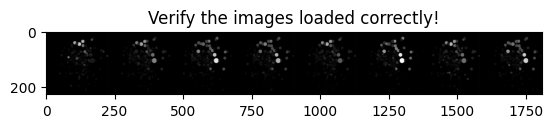

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 28.4886
new best train!
val Loss: 6.0291
new best val!

Epoch 1/34
----------
train Loss: 22.7732
new best train!
val Loss: 5.6421
new best val!

Epoch 2/34
----------
train Loss: 19.3152
new best train!
val Loss: 5.7824

Epoch 3/34
----------
train Loss: 16.8649
new best train!
val Loss: 5.4328
new best val!

Epoch 4/34
----------
train Loss: 15.8838
new best train!
val Loss: 4.8804
new best val!

Epoch 5/34
----------
train Loss: 14.7124
new best train!
val Loss: 4.5219
new best val!

Epoch 6/34
----------
train Loss: 14.2620
new best train!
val Loss: 4.2707
new best val!

Epoch 7/34
----------
train Loss: 13.8552
new best train!
val Loss: 3.9880
new best val!

Epoch 8/34
----------
train Loss: 13.6872
new best train!
val Loss: 3.7457
new best val!

Epoch 9/34
----------
train Loss: 13.4661
new best train!
val Loss: 3.5998
new best val!

Epoch 10/34
----------
train Loss: 13.5036
val Loss: 3.4519
new best val!

Epoch 11/34
----------
train Loss: 13.3927
new best train!
va

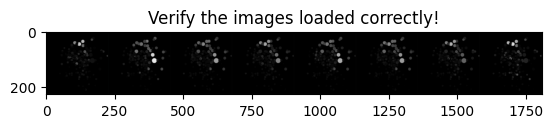

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 28.3015
new best train!
val Loss: 5.2928
new best val!

Epoch 1/34
----------
train Loss: 22.2227
new best train!
val Loss: 5.1059
new best val!

Epoch 2/34
----------
train Loss: 19.2780
new best train!
val Loss: 4.7367
new best val!

Epoch 3/34
----------
train Loss: 17.1461
new best train!
val Loss: 4.2729
new best val!

Epoch 4/34
----------
train Loss: 15.9402
new best train!
val Loss: 3.8399
new best val!

Epoch 5/34
----------
train Loss: 15.2913
new best train!
val Loss: 3.5309
new best val!

Epoch 6/34
----------
train Loss: 14.9894
new best train!
val Loss: 3.3465
new best val!

Epoch 7/34
----------
train Loss: 14.4339
new best train!
val Loss: 3.2565
new best val!

Epoch 8/34
----------
train Loss: 14.0711
new best train!
val Loss: 3.2105
new best val!

Epoch 9/34
----------
train Loss: 13.8278
new best train!
val Loss: 3.1920
new best val!

Epoch 10/34
----------
train Loss: 13.6129
new best train!
val Loss: 3.1934

Epoch 11/34
----------
train Loss: 13.4560
ne

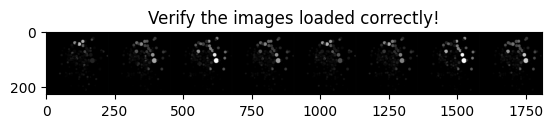

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 29.4491
new best train!
val Loss: 7.2567
new best val!

Epoch 1/34
----------
train Loss: 23.2004
new best train!
val Loss: 6.3507
new best val!

Epoch 2/34
----------
train Loss: 19.3130
new best train!
val Loss: 5.9132
new best val!

Epoch 3/34
----------
train Loss: 16.8716
new best train!
val Loss: 5.4006
new best val!

Epoch 4/34
----------
train Loss: 15.7208
new best train!
val Loss: 4.8807
new best val!

Epoch 5/34
----------
train Loss: 15.0744
new best train!
val Loss: 4.3684
new best val!

Epoch 6/34
----------
train Loss: 14.1307
new best train!
val Loss: 3.9225
new best val!

Epoch 7/34
----------
train Loss: 13.7807
new best train!
val Loss: 3.5768
new best val!

Epoch 8/34
----------
train Loss: 13.6557
new best train!
val Loss: 3.3988
new best val!

Epoch 9/34
----------
train Loss: 13.5112
new best train!
val Loss: 3.2970
new best val!

Epoch 10/34
----------
train Loss: 13.4514
new best train!
val Loss: 3.2437
new best val!

Epoch 11/34
----------
train Lo

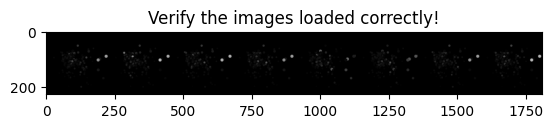

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 32.8066
new best train!
val Loss: 11.5076
new best val!

Epoch 1/34
----------
train Loss: 24.0037
new best train!
val Loss: 10.8863
new best val!

Epoch 2/34
----------
train Loss: 19.5539
new best train!
val Loss: 10.4677
new best val!

Epoch 3/34
----------
train Loss: 17.2674
new best train!
val Loss: 10.4008
new best val!

Epoch 4/34
----------
train Loss: 16.2709
new best train!
val Loss: 10.5291

Epoch 5/34
----------
train Loss: 15.5255
new best train!
val Loss: 10.9789

Epoch 6/34
----------
train Loss: 15.3312
new best train!
val Loss: 11.2014

Epoch 7/34
----------
train Loss: 15.1512
new best train!
val Loss: 11.5338

Epoch 8/34
----------
train Loss: 15.0773
new best train!
val Loss: 11.8996

Epoch 9/34
----------
train Loss: 15.0403
new best train!
val Loss: 12.2760

Epoch 10/34
----------
train Loss: 15.0474
val Loss: 12.5597

Epoch 11/34
----------
train Loss: 15.0082
new best train!
val Loss: 12.6259

Epoch 12/34
----------
train Loss: 14.9841
new best trai

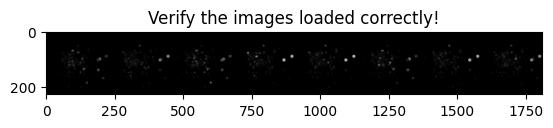

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 33.8036
new best train!
val Loss: 11.5109
new best val!

Epoch 1/34
----------
train Loss: 24.1096
new best train!
val Loss: 11.6991

Epoch 2/34
----------
train Loss: 19.7649
new best train!
val Loss: 11.9567

Epoch 3/34
----------
train Loss: 17.6045
new best train!
val Loss: 11.7993

Epoch 4/34
----------
train Loss: 15.9162
new best train!
val Loss: 12.2494

Epoch 5/34
----------
train Loss: 15.3365
new best train!
val Loss: 13.3429

Epoch 6/34
----------
train Loss: 15.2540
new best train!
val Loss: 13.9779

Epoch 7/34
----------
train Loss: 15.0628
new best train!
val Loss: 14.2197

Epoch 8/34
----------
train Loss: 15.0247
new best train!
val Loss: 14.1306

Epoch 9/34
----------
train Loss: 14.9986
new best train!
val Loss: 13.9551

Epoch 10/34
----------
train Loss: 14.9819
new best train!
val Loss: 13.8943

Epoch 11/34
----------
train Loss: 14.9701
new best train!
val Loss: 13.7377

Epoch 12/34
----------
train Loss: 14.9729
val Loss: 13.4297

Epoch 13/34
--------

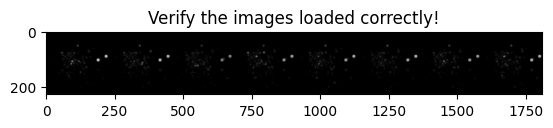

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 34.3363
new best train!
val Loss: 11.9796
new best val!

Epoch 1/34
----------
train Loss: 25.1808
new best train!
val Loss: 12.1393

Epoch 2/34
----------
train Loss: 20.4429
new best train!
val Loss: 12.2458

Epoch 3/34
----------
train Loss: 17.7088
new best train!
val Loss: 12.5863

Epoch 4/34
----------
train Loss: 16.5150
new best train!
val Loss: 12.9884

Epoch 5/34
----------
train Loss: 15.6685
new best train!
val Loss: 13.5894

Epoch 6/34
----------
train Loss: 15.3384
new best train!
val Loss: 14.1009

Epoch 7/34
----------
train Loss: 15.1919
new best train!
val Loss: 14.2035

Epoch 8/34
----------
train Loss: 15.0780
new best train!
val Loss: 14.0700

Epoch 9/34
----------
train Loss: 15.1569
val Loss: 13.7146

Epoch 10/34
----------
train Loss: 15.0062
new best train!
val Loss: 13.6745

Epoch 11/34
----------
train Loss: 15.0510
val Loss: 13.4695

Epoch 12/34
----------
train Loss: 15.0109
val Loss: 13.2921

Epoch 13/34
----------
train Loss: 15.0231
val Loss:

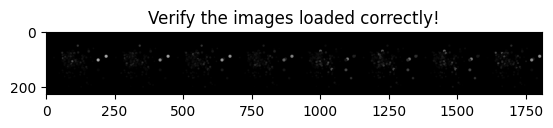

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 33.0127
new best train!
val Loss: 10.6407
new best val!

Epoch 1/34
----------
train Loss: 26.1432
new best train!
val Loss: 11.1382

Epoch 2/34
----------
train Loss: 21.4428
new best train!
val Loss: 11.2703

Epoch 3/34
----------
train Loss: 19.0605
new best train!
val Loss: 12.1288

Epoch 4/34
----------
train Loss: 16.8890
new best train!
val Loss: 12.2722

Epoch 5/34
----------
train Loss: 16.1653
new best train!
val Loss: 11.9556

Epoch 6/34
----------
train Loss: 15.3395
new best train!
val Loss: 11.7953

Epoch 7/34
----------
train Loss: 15.1459
new best train!
val Loss: 11.6091

Epoch 8/34
----------
train Loss: 15.0860
new best train!
val Loss: 11.5377

Epoch 9/34
----------
train Loss: 15.0353
new best train!
val Loss: 11.4696

Epoch 10/34
----------
train Loss: 15.0029
new best train!
val Loss: 11.4967

Epoch 11/34
----------
train Loss: 14.9933
new best train!
val Loss: 11.7033

Epoch 12/34
----------
train Loss: 14.9779
new best train!
val Loss: 11.5340

Epoc

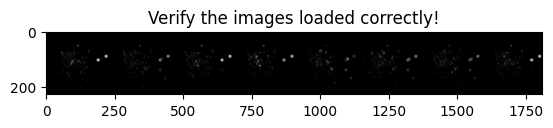

Epoch 0/34
----------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


train Loss: 36.4223
new best train!
val Loss: 11.5523
new best val!

Epoch 1/34
----------
train Loss: 26.9820
new best train!
val Loss: 11.5686

Epoch 2/34
----------
train Loss: 21.8304
new best train!
val Loss: 11.5465
new best val!

Epoch 3/34
----------
train Loss: 18.5593
new best train!
val Loss: 11.5583

Epoch 4/34
----------
train Loss: 16.8529
new best train!
val Loss: 11.3884
new best val!

Epoch 5/34
----------
train Loss: 15.9666
new best train!
val Loss: 10.9550
new best val!

Epoch 6/34
----------
train Loss: 15.4459
new best train!
val Loss: 11.1085

Epoch 7/34
----------
train Loss: 15.3245
new best train!
val Loss: 11.2137

Epoch 8/34
----------
train Loss: 15.1353
new best train!
val Loss: 11.1942

Epoch 9/34
----------
train Loss: 15.0905
new best train!
val Loss: 11.2260

Epoch 10/34
----------
train Loss: 15.0450
new best train!
val Loss: 11.2166

Epoch 11/34
----------
train Loss: 15.0169
new best train!
val Loss: 11.2124

Epoch 12/34
----------
train Loss: 15.01

FileNotFoundError: ignored

In [ ]:
  # mice_ids = ['m9r'], 'm11n', 'm12lr']
replicates = 5
results = []
for m_id in mice_ids:
    # get all the dates for this mouse
    csv_f = os.path.join(save_dir, "dataset.csv")
    trials = pd.read_csv(csv_f, index_col=0)
    m_trials = trials[trials['mouse id'] == m_id]
    m_dates = m_trials['session time']
    m_dates = list(set(m_dates))
    m_dates.append(False)
    for dates in m_dates:
        dates = [dates]
        has_skipped = False
        for _ith_run in range(replicates):
            if has_skipped:
                continue
            print()
            ch_means, ch_stds = get_norm_pms([m_id], dates)
            train_trans = T.Compose([
                T.Resize(224, antialias=True),
                T.Normalize(ch_means, ch_stds),
            ])
            val_trans = T.Compose([
                T.Resize(224, antialias=True),
                T.Normalize(ch_means, ch_stds)
            ])

            split = 0.9
            train_d = LocalizeDataset(save_dir,
                                      train=True,
                                      transform=train_trans,
                                      shuffle=True,
                                      split=split,
                                      _m_ids=[m_id],
                                      dates=dates)
            test_d = LocalizeDataset(save_dir,
                                    train=False,
                                    transform=val_trans,
                                    shuffle=True,
                                    split=split,
                                    _m_ids=[m_id],
                                    dates=dates)
            train_dl = torch.utils.data.DataLoader(train_d,
                                                  batch_size=64,
                                                  shuffle=True,
                                                  num_workers=2,
                                                  pin_memory=True)
            test_dl = torch.utils.data.DataLoader(test_d,
                                                  batch_size=64,
                                                  shuffle=True,
                                                  num_workers=2,
                                                  pin_memory=True)

            # remove small datasets
            if len(test_dl.dataset) < 10:
                print(f'skipping {m_id} on {dates}')
                has_skipped = True
                continue

            # Get a batch of training data
            inputs, _1 = next(iter(train_dl))
            inputs = inputs[:8,...]
            out = torchvision.utils.make_grid(inputs)
            imshow(out, title="Verify the images loaded correctly!")
            plt.show()

            model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
            num_ftrs = model_conv.fc.in_features
            model_conv.fc = nn.Sequential(
                nn.Linear(num_ftrs, 2),
                nn.Softmax(),
            )
            model_conv = model_conv.to(device)

            criterion = nn.CrossEntropyLoss()
            optimizer_conv = optim.Adam(model_conv.parameters(), lr=1e-4)
            lr_schedule = None # lr_scheduler.StepLR(optimizer_conv, step_size=50, gamma=0.1)
            best_train, best_val = train_model(model_conv, train_dl, test_dl, criterion,
                                              optimizer_conv, lr_schedule, num_epochs=35)

            train_acc = get_acc(best_train, train_dl, split="train")
            val_acc = get_acc(best_val, test_dl, split="val")
            results.append([m_id, dates[0], train_acc, val_acc])

results_fn = os.path.join(save_dir, "results.npy")
np.save(results_fn, np.array(results))

In [ ]:
import copy

#results_fn = os.path.join(save_dir, "results.npy")
#results = np.load(results_fn, allow_pickle=True)

print(f"results: {results}")

# aggregate results from identical parameter sets
cpy_results = list(copy.deepcopy(results))
top_1_train, top_1_val = [], []

# find the top-1 of replicate trials
while len(cpy_results) != 0:
    rep_trains = []
    rep_vals = []
    for r in cpy_results[:replicates]:
        rep_trains.append(r[2])
        rep_vals.append(r[3])
    top_1_train.append(max(rep_trains))
    top_1_val.append(max(rep_vals))
    del cpy_results[:replicates]

print(f"top-1 train: {top_1_train}")
print(f"top-1 val: {top_1_val}")

# take the average among replicate trials
cpy_results = list(copy.deepcopy(results))
avg_train = []
avg_train_len = round(len(cpy_results) / replicates)
for _ in range(int(avg_train_len)):
    avg_train.append(0)

m_and_sess = []
k = 0
while len(cpy_results) != 0:
    _m_id = cpy_results[0][0]
    _date = cpy_results[0][1]
    m_and_sess.append(f'{_m_id} {_date}')
    for r in range(replicates):
        avg_train[k] += cpy_results[0][2]
        del cpy_results[0]
    avg_train[k] = avg_train[k] / replicates
    print("avg train --- " + str(m_and_sess[-1]) + " : " + str(avg_train[k]))
    k += 1

cpy_results = list(copy.deepcopy(results))
avg_val = []
avg_val_len = round(len(cpy_results) / replicates)
for _ in range(int(avg_val_len)):
    avg_val.append(0)

k = 0
while len(cpy_results) != 0:
    _m_id = cpy_results[0][0]
    _date = cpy_results[0][1]
    for r in range(replicates):
        avg_val[k] += cpy_results[0][3]
        del cpy_results[0]
    avg_val[k] = avg_val[k] / replicates
    print("avg val --- " + f'{_m_id} {_date}' + " : " + str(avg_val[k]))
    k += 1

print(f"m_and_sess: {m_and_sess}")

In [ ]:
print("INFERENCE ON TRAINING IMAGES:")
visualize_model(best_train, train_dl, split="train")
plt.show()
print("\n\n\n\n\n")
print("INFERENCE ON TESTING IMAGES:")
visualize_model(best_val, test_dl)
plt.show()